## Loading the dataset into a pandas dataframe

In [97]:
import pandas as pd
import json
df = pd.read_json("../../Dataset/Reviews.json", lines = True)

In [98]:
import nltk as nltk
import matplotlib.pyplot as plt
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## Stripping catagories that we will not need and looking at the data

In [99]:
selected_cols = df[['overall', 'reviewText']]

selected_cols.head()

overall                                         reviewText
0        5  I don't spend a lot on my flags because they r...
1        5  Super fast processing and shipping, if you are...
2        5  Great product.  I would recommend this product...
3        5            GREAT PRICE I LOVE MY STATE AND COUNTRY
4        5                    Great display flag for the den.

## We can see that the vast majority of reviews are 5 stars with less reviews for less stars with a small uptick in 1 star reviews

In [100]:
reviewRatings = selected_cols["overall"].value_counts()

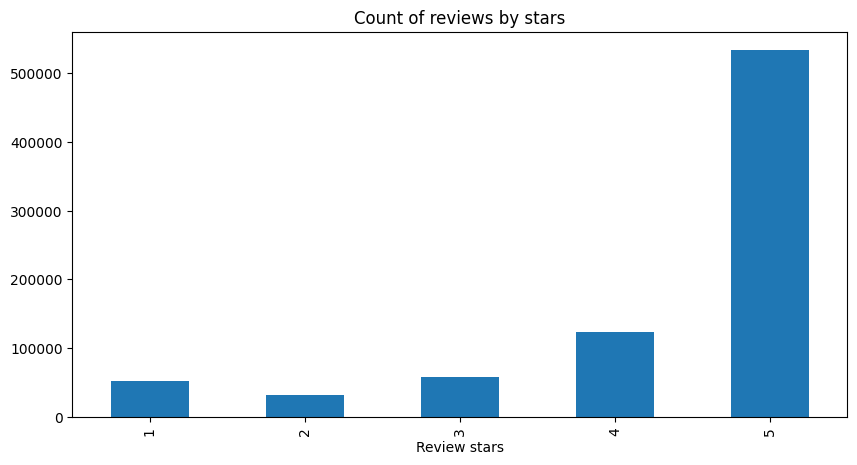

In [101]:
ax = df["overall"].value_counts().sort_index()\
    .plot(kind = 'bar',
         title = 'Count of reviews by stars',
         figsize=(10,5))

ax.set_xlabel('Review stars')
plt.show()

In [111]:
selected_cols.dropna(inplace=True)
print(selected_cols.iloc[2262]['reviewText'])

HELL OF LOTA WORK TO PUT IT TO GETHER NILLION PARTS FOR PRICE SHOULD BE ASSEMBLED ALLREDY


In [55]:
sid = SentimentIntensityAnalyzer()
ss = sid.polarity_scores(selected_cols.iloc[0]['reviewText'])
print(ss)

{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.9514}


In [59]:
sid = SentimentIntensityAnalyzer()
ss = sid.polarity_scores('Pizza')
print(ss)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [60]:
sid = SentimentIntensityAnalyzer()
ss = sid.polarity_scores('Pizza is good')
print(ss)

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}


In [61]:
sid = SentimentIntensityAnalyzer()
ss = sid.polarity_scores('I really like pizza, it is awesome. The cheese is REALLY tasty and the sauce is amazing too')
print(ss)

{'neg': 0.0, 'neu': 0.567, 'pos': 0.433, 'compound': 0.8932}


In [ ]:
for i in range(0,len(selected_cols)-1):
    sid = SentimentIntensityAnalyzer()
    sentence = selected_cols.iloc[i]['reviewText']
    ss = sid.polarity_scores(sentence)
    print(sentence,'\n','Sentiment score: ', ss['compound'],'\n',"Rating given: ", selected_cols.iloc[i]['overall'],'\n')

I don't spend a lot on my flags because they really get beat up.  So I but the lesser quality figuring that they'll have to be replaced a couple of times a year anyways.  The fact that this very inexpensive flag is still flying 8 months later pleases me well.  It's up about 20 feet, 7/24, and sees winds averaging 5 to 10 mph on a 'normal' day with the occasional storm friont gusts reaching as high as 60+ mph.  So far (8 months later) it's just now starting to show a little fraying on the ends.  I'll be buying another shortly to have ready when this one finally gives in. 
 Sentiment score:  0.9514 
 Rating given:  5 

Super fast processing and shipping, if you are looking for flags look no more good quality product and a great company to do business with. 
 Sentiment score:  0.8748 
 Rating given:  5 

Great product.  I would recommend this product.  I would recommend this product. 
 Sentiment score:  0.8442 
 Rating given:  5 

GREAT PRICE I LOVE MY STATE AND COUNTRY 
 Sentiment score:

Good. 
 Sentiment score:  0.4404 
 Rating given:  5 

This is working fine and was just what I needed. 
 Sentiment score:  0.2023 
 Rating given:  5 

Product arrived in a timely manner and was a positive customer experience. 
 Sentiment score:  0.5574 
 Rating given:  5 

I've used these for years.  A little pricey on Amazon, but there's no way I'm going to HD for one of these by itself!
Just assume that you'll need some lubricant to slip the insert into the hose.  Don't waste your time just trying to force it on.
I've been surprised that I've never stripped one of these before.  They seem to be a quality product that lasts forever, and
is very easy to install.  They even have the combo screw heads so you can go flat or Phillips.  MUCH better than going out and
buying a new hose. 
 Sentiment score:  0.8909 
 Rating given:  4 

Awesome! Thank you! 
 Sentiment score:  0.8011 
 Rating given:  5 

I use these regularly to repair my hose. Works great! 
 Sentiment score:  0.6588 
 Rating gi

What a waste of MONEY a $60 one a Wal-Mart will do the same thing. the only thing its got going for it is the tries.the barrel won't let the fertilizer completely drain the butter fly adjustment screw is plastic witch is cheap and all ready broke the 5th time I used it and boy boy it will spill the fertilizer out in a heart beat if you are not careful I can go on and on but I won't but I did try to warn you 
 Sentiment score:  -0.5889 
 Rating given:  1 

Outstanding 
 Sentiment score:  0.6124 
 Rating given:  5 

Bought this to replace an identical one that had lasted over 15 years.  Love this model because it can easily be read at a distance. 
 Sentiment score:  0.765 
 Rating given:  5 

Heavy duty with a nice calibration.  We used it for salt applications but you must wash the unit off to keep it flowing. 
 Sentiment score:  0.2263 
 Rating given:  4 

Just got tired of replacing my cheap $40 box store Scott's spreader every year cause the cheap plastic wheels or axle would break. 

I got this for spreading salt and it functioned perfectly all through a New York State winter. The spreader is very reasonably priced and strongly constructed. It does take some effort to assemble the 2150, but it's not rocket science and just requires time. The hopper holds plenty of salt and the plastic mesh strainer top ensures that you don't dump in salt clunkers by mistake. Even if you do accidentally load a few clunkers, the design of the sliding door salt port at the bottom of the bucket is easy to access and clear out. My last spreader didn't stand up too well as most of the metal parts corroded away from salt exposure. This unit looks like it will last a long time. 
 Sentiment score:  0.9165 
 Rating given:  5 

FINALLY!  My old Scotts EdgeGaurd spreader broke this spring so now I can justify buying a new spreader!  I hated that old spreader.  It was hard to push because of the plastic wheels, the handle was too low and it didn't spread very far.  But man have things changed n

I was in need of a quality spreader and researched many. Got tired of the other kinds that you would normally buy at your local store only to get a piece of junk and find it at the curb for trash pick-up. I decided on this unit. Earthway makes a quality product. Opened it up and assembled it in about 45 minutes. Not too bad. Instructions were clear and picture illustrations a bit schetchy at times but none-the-less it worked out. Very satisfied! I would definitely recommend this spreader. Just be handy with tools and patience with the instructions and you should have it together without complications. Only wish that it came with a hopper cover. This is an option to purchase should you need it. 
 Sentiment score:  0.8889 
 Rating given:  5 

We have had spreaders in the past and they are weak and don't last.  This one is strong and very easy to use.  Even our friend who is a landscaper wanted to know where we purchased so he could order some. 
 Sentiment score:  0.7778 
 Rating given:  

Super nice hose!  Very flexible, not stiff even in cold weather.  I would say this is the best quality hose I have owned so far and that includes a bunch.  Worth every penny, cheap hoses just are not worth the trouble.  Just buy it, you'll be glad. 
 Sentiment score:  0.9576 
 Rating given:  5 

Heavy Duty Hose with a good abount of flexibility 
 Sentiment score:  0.6486 
 Rating given:  5 

As a replacement for the same hose purchased several years ago. Not the same quality or resistance to kinking. I'll keep looking. 
 Sentiment score:  0.0 
 Rating given:  3 

I love this hose. barely kinks and feels super durable. I actually bought a second recently for the back of the house. 
 Sentiment score:  0.8442 
 Rating given:  5 

Decent hoses, will kink if they don't have water pressure. 
 Sentiment score:  0.2235 
 Rating given:  5 

Flexogen is good. 
 Sentiment score:  0.4404 
 Rating given:  5 

Huge time saver. Not as precise as a Jang but for 15% of the cost of a Jang it serves my n

Just what I needed.  It is difficult to find a high quality 25 foot hose, but not on Amazon.  Perfect 
 Sentiment score:  -0.7596 
 Rating given:  5 

I followed the advice of one of the reviewers and bought two shorter hoses instead of one very long one.  This hose really is very good quality and it is nice to wash my car without the leaky hose spraying almost as much water on me as the car. It does not kink! aleviating another problem with the old hose. I disliked wrestling with the old hose every time I wanted to wash the car.  It was shipped promptly and arrived on time. 
 Sentiment score:  0.2843 
 Rating given:  5 

Sturdy hose, and a great value. Nice textured black color. 
 Sentiment score:  0.8519 
 Rating given:  4 

The write-up says it will not kink.  I find that not to be true.  I really like the hose, but every time I use it, it kinks until I un-wind the kink.  Otherwise, I would have given it a "5" star rating. 
 Sentiment score:  0.0594 
 Rating given:  4 

This is an o

Great hose and obviously does what it is meant to.  I use it around the hose regularly but this hose kinks a lot which is super annoying because you have to constantly go find the kink. 
 Sentiment score:  0.6542 
 Rating given:  2 

.if you want to make your own seed plates for a seed that is not included in their sets,e.g, quoina, you'll have to order their BLANK SEED PLATE, part # 18106, from Earthway DIRECT.

You get the blank seed plates from Earthway. BUT THEY DON'T COME WITH ANY INSTRUCTIONS. You'll have to contact Customer Service to have them e-mail you the instructions.

I've counseled them to start including the instructions with the plates. 
 Sentiment score:  0.0387 
 Rating given:  5 

Just great!  I had one many years ago and this is even better built. 
 Sentiment score:  0.807 
 Rating given:  5 

You will never have to buy another hose as long as your wife doesn't run over it with a lawnmower. I bought another one just like it but I also bought a splice kit so I'm stil

Does the job 
 Sentiment score:  0.0 
 Rating given:  5 

I bought this for an animal rescue shelter and they absolutely love it! 
 Sentiment score:  0.8436 
 Rating given:  5 

Great product! 
 Sentiment score:  0.6588 
 Rating given:  5 

I'm farming about an acre and a 1/2 and this worked out perfect for the different types of rows I put in.. The only downside is the spacer bar doesn't stay attached to the mounting hook when upright and had to fab up a velcro wrap for it.. but other then that no issues, an awesome tool. 
 Sentiment score:  0.7717 
 Rating given:  4 

Solid construction and comfortable to hold. 
 Sentiment score:  0.5994 
 Rating given:  5 

A good, strudy house that is not easy to kink or crush. 
 Sentiment score:  -0.0274 
 Rating given:  5 

It was OK at first, relatively lightweight and OK for handling, but nothing special.  After a few years though the nice shiny green hose turned black with mold.  The outer casing seems to have little tolerance for being outdoo

These are very good cutters 
 Sentiment score:  0.4927 
 Rating given:  5 

We are clipping away with our Gilmour Hedge Clipper. 
 Sentiment score:  0.0 
 Rating given:  4 

it's ok 
 Sentiment score:  0.296 
 Rating given:  3 

This is the second Earthway seeder that I have owned and it IS my experience that it is one of the best on the market.

I will concede that the seeder is very light and made of aluminum and plastic, but do you really want a portable seeder that is heavy and cumbersome to balance?  If that is what you want, then buy a pull behind planter and use a tractor to pull it.

This seeder is very well balanced and believe it or not--well made.  I use it mostly for sweet corn and bush beans.  I've tried it for spinach, cucumber, and squash and really didn't like the results, but since they are hilled beds and easy to plant by hand it really wasn't a deal breaker.  Really, I bought this primarily for planting green beans and sweet corn, because I'd rather take a bullet to 

Excellent hose overall.  The 100 ft. length kept me from having to buy short ones and couple them together.
Pros: Good price, great quality.  Brass fittings are substantially machined and not just cheap formed brass sheet.
Cons:  Very few.  It tends to flatten out when wound on a garden hose reel. No stripe to tell when it is twisting.
Recommendation: Flexibility and resistance to crushing on a hose reel tend to be contrary qualities.  I down-rated it one star for the flattening issue when used on a hose reel.  I recommend that during the summer season, leaving the pressure on the hose while winding on the reel, and then turning water off and releasing the pressure.  it will keep it loose and prevent crushing. 
 Sentiment score:  0.5859 
 Rating given:  4 

cuts stuff good 
 Sentiment score:  0.1779 
 Rating given:  5 

Excellent for the price! 
 Sentiment score:  0.6114 
 Rating given:  5 

Just the right size and shape for me and my two small hedges. 
 Sentiment score:  0.0 
 Rating 

Blades bit into each other on the first snip. Has done it numerous times and had to file out tge gouges. Blades also separate easily leaving tge branch stuck between the two. Managed to get 4 fruit trees and 5 berry vines pruned and they are junk. 
 Sentiment score:  0.1027 
 Rating given:  1 

Christmas gift 
 Sentiment score:  0.4404 
 Rating given:  5 

Initially, these clippers look and feel sturdy.  But within an hour of clipping long grass around my yard the bolt came loose and blades became dull and could only bend the grass. 
 Sentiment score:  -0.7579 
 Rating given:  1 

Good Basic hedge shears for everyday use.  Sharp blades.  Eight inch blade is just the right size for about all your pruning projects.  I use it to shape my hedges and shrubs.  More precise that electric hedge clippers.  These shears are not intended to be used on branches.  Make sure you wipe the blades clean after each use and they will last a very long time. 
 Sentiment score:  0.7845 
 Rating given:  4 



well made. strong. I love it 
 Sentiment score:  0.8625 
 Rating given:  5 

well designed shear. 
 Sentiment score:  0.2732 
 Rating given:  5 

Love it, works great for my gardening . 
 Sentiment score:  0.8519 
 Rating given:  5 

Well made and easy to use. Fiskars makes good tools and these are no different. 
 Sentiment score:  0.6908 
 Rating given:  5 

works 
 Sentiment score:  0.0 
 Rating given:  5 

Best hose ever!  We buy these when we can find them.. the coiled wire near the hose end really protects and gives it strength plus the hose is really heavy duty and long lasting.  These seem to last a long time and never kink. 
 Sentiment score:  0.883 
 Rating given:  5 

Not the best purchase. 
 Sentiment score:  -0.5216 
 Rating given:  2 

Trust fiskArs for the price it is a good productzzzzz there are better ones out there at a much higher price. I have many fiskArs product. As long as you know you get what you pay for. Will last you a long time if you look after it. 
 Sentim

Good deal for the price.  It's sharp and handy 
 Sentiment score:  0.4404 
 Rating given:  5 

We really like our seeder and are impressed with the USA made quality like what we used to find in products back in the 50s & 60s before the made in China junk flooded the market. It has a heavy gauge aluminum frame and many of the parts are durable nylon rather than cheap plastic. The wheels roll on steel bushing shafts and all the bolts are respectable grade 5 quality requiring a 1/2" & 7/16" wrench for assembly. The 1/4" drive belt is more than adequate and the 12" dia cleated drive wheel is big enough not get lost in our soil and prevents skipped seeds in the row. The seed plates are amazingly easy to change, no tools required. The seed depth and row marker are easily adjusted by loosening large wing nuts with your fingers, once again, no tools needed. The handy kick stand keeps the seeder upright so we don't have to be concerned about seeds spilling out like we would if we had to lay it 

Replaced the old handle with no problems.  Fit snug.  The wood looks good and solid. 
 Sentiment score:  0.2732 
 Rating given:  5 

I purchased this hose because the $10 value hose I bought at HomeDepot burst within one day of use. The fist day I used it, I accidentally left the water turned on over night, and the hose ripped open from the pressure and flooded my yard for a few hours. This hose is tough and does a good job. It doesn't kink and reels up well on my hose crank. It was worth the extra money. I have left the hose on over night by accident a few times, and nothing has happened. No, leaks, bumps or protrusions. I would highly recommend this hose. 
 Sentiment score:  0.5833 
 Rating given:  5 

This hose has been in for years.  I am ahead of my PRV so this sees street pressure, rather than house pressure.  I just purchased shorter lengths of this hose. 
 Sentiment score:  -0.5267 
 Rating given:  5 

I researched  every hose before I purchased this one.  I have been very happ

I got this hose to hose to replace a "professional grade" 1 inch diameter hose that was very cumbersome to move around when I water the garden. I have another Gilmour Flexogen 50 foot hose that didn't quite reach and that is the 1 inch diameter version. I still like it but it wasn't long enough. So I tried this 75 foot 3/4 inch diameter version and it is perfect! I can move it around the garden with no issues at all because it's light-weight, doesn't snag or kink, and is very flexible. My 1 inch one is still flexible in winter so I expect this one will be too. The water flow isn't quite as fast as with the 1 inch, but is still excellent. I hang the 75 footer over a hose bracket in large loops so I don't get any problems with tangling. Just pick up the number of loops you need and walk away, dropping them on the ground one by one. The hose hardly gets twisted at all. So when I'm done, I just go to the bracket and pull the hose in a loop-length at a time and I'm done. The hose is very to

Have used Fiskars pruners for many years. 
 Sentiment score:  0.0 
 Rating given:  5 

These are good quality pruning sheers (if I just wouldn't keep misplacing them!). A good product I will buy again. 
 Sentiment score:  0.7263 
 Rating given:  4 

This was a great price on these Fiskars shears. I've had great luck with these in the past and have no reason to think that will be any different with this pair.
Edited to say that I got these for $10 on sale at Amazon. I am seeing bad reviews for them and have not used mine more than a half hour or so at this point. They worked well for me and I have had none of the problems that other users mentioned so far, but I was only doing light pruning of small diameter wood. 
 Sentiment score:  0.6984 
 Rating given:  5 

Love this heavyweight monster. 
 Sentiment score:  0.6369 
 Rating given:  5 

Got this to work with a travelling sprinkler. It does feel more substantial than the less expense hoses I have and unlike them, I have not even come c

I aqm impressed with the cost and quality of this product, Also impressed on the fast shipment by Amazon as I received it in 4 days, Has not kinked and a great hose as I had one before which I left in the yard during all seasons and even ran across driveway, But it lasted 5 good years through all the abuse,  I would recommend this to anyone, Thanks 
 Sentiment score:  0.7545 
 Rating given:  5 

Have used this hose for about a month now.  Performs as expected with tight-sealing brass fittings.  No kinks.  This is the best garden hose I could find and it should last several seasons at this price. 
 Sentiment score:  0.4588 
 Rating given:  5 

After a few weeks of household use, the outer layer looks like a python that's eaten several chickens. Now it's leaking! Past return to Amazon so back to Gilmour it goes. I need the hose to water my plants so I need to buy another and when this one is replaced I guess I'll put it on Craiglist for whatever I can get. Don't waste you time and money.

Good pruning shears. 
 Sentiment score:  0.4404 
 Rating given:  5 

Oh do I Love these!!!!!!- I'm out there trimming my roses and those thorny thick weeds- with such ease-
I love them- 
 Sentiment score:  0.8994 
 Rating given:  5 

Another excellent Fiskars product. 
 Sentiment score:  0.5719 
 Rating given:  5 

Well made shears.  Handle is comfortable to grip. 
 Sentiment score:  0.6597 
 Rating given:  5 

This Flexogen hose is really nicely built. This heavy-duty hose has solid brass fixtures on both ends,and it is flexible. There's nothing that I can say bad about this product. I've had several of these Flexogen hoses in the past, and they seem to hold up well. JC 
 Sentiment score:  0.5095 
 Rating given:  5 

This is the worst hose I have ever had.  It continually kinks. I will get a kink and I walk back and get the kink out.  I'll move to another area a few feet away to water  and it kinks again in another spot on the hose.  I have noticed that where it kinks, the hose is now

Great shears. 
 Sentiment score:  0.6249 
 Rating given:  5 

Great product. 
 Sentiment score:  0.6249 
 Rating given:  5 

easy to use and does a good job 
 Sentiment score:  0.7003 
 Rating given:  5 

These are the best residential grade sprayers, period. I gave it 4 stars because they are no longer made in the USA. As long as you rinse them out after every use they stay perfect. 
 Sentiment score:  0.7717 
 Rating given:  4 

This is the best mixing sprayer I've found.  As others have said, you should rinse it after use.  But, they are awesome.  I don't know why they discontinued these.  Why??? 
 Sentiment score:  0.8686 
 Rating given:  5 

This will spray about 30 feet under and around the house.  I also used it to spray a swarm of bees that would not move on after a few days.  I use it with Talstar Pro Multi use insecticide for DIY spraying.  Kills BLACK WIDOWS dead. 
 Sentiment score:  -0.8316 
 Rating given:  5 

Replacing an earlier model  50 year old!  Need I say more, work

nice handy little sprayer that's easy to use and clean. the deflector for the nozzle is nice and the dial-a-mix makes applying chemicals to your lawn a no-brainer.

wow. went to order another one and it's gone from $12 to $60. i'll pass. 
 Sentiment score:  0.9292 
 Rating given:  4 

Purchased in July 2013. Worked OK for a while when used five times a year. It reaches 15-20 ft.
It started leaking between the gun/handle and bottle. The black plastic part that connects the handle to the bottle gets lose if the handle is not perpendicular because the weight of the liquid in the bottle makes it unscrew from the handle.
No matter how many times I tightened it, It kept getting lose.
Today while spraying dormant oil and copper fungicide the handle stopped working and the tank fell off and the spray never stopped. The threads no longer work as weak plastic always losses to metal threads. I assume the handle needs to connection to work (on and off) so the only issue may be using the wrong mate

These things are great time savers for applying pesticide to yards 
 Sentiment score:  0.6249 
 Rating given:  5 

good product 
 Sentiment score:  0.4404 
 Rating given:  5 

works fine, but nothing great for the price. doesn't spray perfectly even. It worked for what I needed. Don't know how long it will last. 
 Sentiment score:  -0.8622 
 Rating given:  4 

easy to use 
 Sentiment score:  0.4404 
 Rating given:  5 

Works great.  Is much easier to use than the one it replaced since no pre-mixing of chemicals is required.  Results using it so far have been great. 
 Sentiment score:  0.8689 
 Rating given:  5 

Works really good.  You don't have to go out to move your hose. 
 Sentiment score:  0.4927 
 Rating given:  5 

It's hard writing a review for this Flexogen garden hose because it has a couple big problems, but something else about it makes up for that one problem. Read on:

One thing you have to know- pretty much ANY garden hose you buy will tangle if you don't wrap it the rig

These are in my hand all weekend. I am a garden putterer and these are awesome pruners. Comfortable, sharp, all purpose. Love 'em. 
 Sentiment score:  0.9413 
 Rating given:  5 

Does the the job.  Looks to be durable. 
 Sentiment score:  0.0 
 Rating given:  5 

Excellent product for my garden, no leaks, easy to manage as compared to other sprayers 
 Sentiment score:  0.6597 
 Rating given:  5 

Heavy weight sprinkler moves itself, good product, auto shutoff 
 Sentiment score:  0.4404 
 Rating given:  5 

Excellent lawn sprinkler 
 Sentiment score:  0.5719 
 Rating given:  5 

It's REALLY SLOW, moving, perhaps, 10-ft in an hour if I recall correctly. Having said this, it is effective in tracking my 3/4-inch hose. I tried to use it in conjunction with the new Miracle Grow in-lin feeding system. The latter feeds much too fast to be used in conjunction with this sprinkler. Next spring, I will try to figure out a somewhat different approach to automatically feeding my gardens. This sprink

I buy pesticides and herbicides in concentration.  ive been using the pump action for a while and it was annoying.  This thing works perfectly! 
 Sentiment score:  0.4199 
 Rating given:  5 

DOes not evenly distribute nematodes. I bought it so mix things but everything I have tried to distribute on my lawn so far, anti-grub spores and nematodes, and other things all didn't work. It almost feels like it got more of all the stuff I am spraying on my hands and on me than on my lawn. I followed the directions carefully and tried it out many times, perhaps I"m not that good at this but it didn't work out for me. 
 Sentiment score:  0.1213 
 Rating given:  1 

works fine so far 
 Sentiment score:  0.2023 
 Rating given:  4 

works great! 
 Sentiment score:  0.6588 
 Rating given:  5 

My mother used one of these to water or yard when I was a child. Now that I water my own yard I realize that this truly is the best way to water. I can loop it to go around the pool and water areas that are ha

Don't clip as well as some others I have. 
 Sentiment score:  -0.2057 
 Rating given:  3 

I admittedly don't do a ton of gardening, but I was very impressed by these Fiskars shears ability to dominate practically any size branch/stem that I could fit into its jaws. I cut down several large branches off a tree in my front yard and when processing it to smaller pieces, these shears could even tackle half-inch thick branches.

I'd say that if you plan on using these for general gardening, cutting flower stems or thick weeds, these bad boys will tear through those tasks. If you need to cut thicker items, these will also do the trick but likely wear them out much faster. When my pair dies, I definitely plan on re-ordering the same pair. 
 Sentiment score:  0.359 
 Rating given:  5 

The most frustrating to use its  blade refuses to stay tight having a inlay nod to keep tightening by a bolt  having no concept in its technology  what so ever.  You never will need to change the blade it never

I was skeptical at first, but after reading reviews and wanting to try something different... this was a good and cheap investment. For years, I have been using and constantly buying 2gallon sprayers, in which only lasts 1 season because the wands always either cracks or leaks. Sometimes its hard to measure out correct amount of formula.. Can't believe I have been wasting all these years, now I stumbled on such a simple & convenient  gadget as the glimour nozzle sprayer. I have used this so far 2 times, for killing weeds & grass from asphalt driveway &  rocked driveway. Very easy setup, pouring the correct amount in ounces & setting dial to 10. Works out great so far, very fast & easy spray results than using pumped sprayers. In my opinion this also sprays evenly.
Where the grass area meets the graveled rock drive, I can spray evenly & line the sprayer very well. I haven't tried using this in other instances, but  in this circumstance, this works great.... now after my first spray, I d

My sprayer wouldn't work at all.  I called Gilmour thinking maybe it was me.  They were very nice and ran through checking it out, and then said they'd send me a repair kit.  While waiting I looked at sprayers in the stores and decided this Gilmour  seemed to be of higher quality than anything I saw.  The repair kit came.  I failed to fix it.  No instructions.  I gave up.  Amazon kindly took it back.  Now I don't want one at all.  The others seem to not measure up, but Gilmour let me down.  If you have a handy man around the house I'd recommend this one. 
 Sentiment score:  0.5974 
 Rating given:  3 

PRO's:

*NO LEAKS!!  Not a drop!

*Numbers easily readable on dial

*Dial indicator nub on side nice addition

*Metal hose nozzle way better than cheap plastic

*Diffuser gives perfect spray pattern, arc, and distance when pointed up

*Well-anchored fine mesh filter on end of siphon tube

*Hose nozzle swivels on rest of unit to ward off likelihood of breakage

*Brass parts lend quality

*

Cheap coated mystery "metal" (MIM with a stamped handle) construction with some brass and plastic bits. Unless you remove it from your hose and bring it inside after every use, eventually that coating is going to chip off and the nozzle will start rusting as it's exposed to the elements. From a value perspective, do note that you're spending about 1/3 the cost of a high quality machined brass nozzle. 
 Sentiment score:  0.2732 
 Rating given:  2 

This Gilmour hose nozzle is a good value and is sturdy, too.  It allows variable water pressures, from sprinkling to high-intensity cleaning. I like how easy it s to use and attach to my hose. I have tried those flimsy plastic nozzles, but they don't last more than a month or two. Indeed, you get what you pay for. This nozzle is a good value. 
 Sentiment score:  0.8765 
 Rating given:  5 

After trying the "industrial" nozzles with their cheap plastic triggers, I went back to the tried and true workhorse of hose nozzles. These things last for

I use this sprayer to apply all sorts of lawn and garden concentrates.  The spray is consistent and even.  The handle is all metal which is really nice.  No more plastic nozzles leaking all over the place.  The spray handle is a great upgrade from the built lawn fertilizer spray bottles with the plastic tab to turn on and off the sprayer.

The only draw back is that the bottle is only 16oz.  I emailed the manufacturer to see if you could use a bigger bottle but they said no.  So, if you have a really large area, look somewhere else unless you don't mind stopping to refill. 
 Sentiment score:  0.1836 
 Rating given:  4 

I wish I had found this sprayer 20 years ago so I could have avoided all the frustration and wasted money I have spent over the years.  After using this, the three I had went in the trash because they were a constant problem and a big headache.  This is wise investment if you work in your yard as much as I do!  Absolutely a great product and especially for the price. 
 

If you buy any Solo sprayer, you should also stock up on pump rebuild kits and be ready to spend an hour or so installing one every year from now through eternity. We bought one a few years ago, it lasted one season, then a different model (piston) and that lasted one season. The rebuild kits run $15-22 each. Seriously, either have one on hand or be ready to have your pump not work when you need it. They are fairly easy to take apart if you are handy with a hex driver & screwdriver... but they really need to use better quality rubber or silicone so they will last longer. But then they won't make so much profit on the rebuild kits! 
 Sentiment score:  0.9275 
 Rating given:  2 

OLD FASHION NOZZLE 
 Sentiment score:  0.0 
 Rating given:  5 

worked fine for the price.  I needed for control of burn piles.  worked fine 
 Sentiment score:  0.3818 
 Rating given:  5 

It works. Is metal so it will hopefully last longer than the plastic ones. 
 Sentiment score:  0.4522 
 Rating given:  4 

L

Repeat purchaser of this brand. Every year I seem to need a new one because of one mishap in the garden or another. Lasts me for the whole season and then some. Makes nice clean cuts and is comfortable in the hand. 
 Sentiment score:  0.8689 
 Rating given:  5 

I love these pruning shears. They are super sharp and easy to use. They made short work of branches in an overgrown hedge I was cutting down this morning. I am very pleased to have them and know they will make my life much easier when I tackle another out of control  hedge in my garden tomorrow. 
 Sentiment score:  0.9476 
 Rating given:  5 

Work great 
 Sentiment score:  0.6249 
 Rating given:  5 

This one made spraying easy.  A professional landscaper recommended this, and I don't regret it.  I don't have to stop and pump it up every few minutes 
 Sentiment score:  0.7858 
 Rating given:  5 

The straps are the cheapest and most ineffective straps I have ever had on a backpack sprayer--and I have had several good ones. The 

It seems well made and certainly has quite a heft to it. Use two hands when moving it, you don't want to smack yourself in the leg or ankle with this fellow. Definitely agree on using a 5/8" hose with it per their recommendation ( I bought a quality Gilmour hose and a nice Ames rolling cart to house it). Our lawn is neither flat nor steep; more importantly it is has some small bare spots which can pose a challenge for the unit to keep moving forward. If it cannot progress, you run the risk of stripping the gears and ending up with a very expensive stationary unit. I have been able to set it on a path which it travelled without problem. I'm working on the bare spots and definitely plan to keep it busy, but the bottom line is that, because of our lawn and the issue regarding it getting stuck in place, I don't yet feel comfortable simply setting it and forgetting it. 
 Sentiment score:  -0.1507 
 Rating given:  3 

I like this thing, just don't leave it out if there's going to be frost. M

I'd buy these again.  Very sharp and easy to trim roses and other plant material. 
 Sentiment score:  0.4877 
 Rating given:  5 

This is a  great basic pruner that cuts through outdoor plants and rose bushes and indoor bouquets. The handle is comfortable and the locking feature is nice. 
 Sentiment score:  0.8402 
 Rating given:  5 

A very strong spray.  The threaded nozzle proved very handy for attaching a gentle sprayer since I use this for gardening and not for cleaning. 
 Sentiment score:  0.7574 
 Rating given:  5 

Yes, it's all metal but it's not as sturdy as I had hoped. It's made in China and feels kind of cheap. It works but I'm looking to replace it after just a few uses. 
 Sentiment score:  0.6428 
 Rating given:  2 

light weight works great 
 Sentiment score:  0.6249 
 Rating given:  5 

Very sharp and do not get stuck like previous ones I've used. 
 Sentiment score:  -0.0951 
 Rating given:  5 

Wife likes these since the closure mechanism is very easy to use. Cuts wel

These work great!  Why did I never have a pair before!!  Love them. 
 Sentiment score:  0.88 
 Rating given:  5 

Works great! 
 Sentiment score:  0.6588 
 Rating given:  5 

Use them all the time now, good clean cuts 
 Sentiment score:  0.5267 
 Rating given:  5 

Perfect !!! 
 Sentiment score:  0.6784 
 Rating given:  5 

I purchased my 1865 traveling sprinkler in April of 2012.  I have used it twice in the front yard and twice in the back.  I am not completely satisfied with it, but consider it generally good at what it does and it still has novelty for me to watch it chugging around.  There was no issue with it arriving in good new condition and having a very easy set up.  The directions are minimal but it is quite obvious how it works.  I have a lot of 5/8 inch hose and it will dutifully follow the hose around my yard. When I have several lengths of hose and to help it out after a while, I pull it up more behind the unit to reduce the effort it has to snake the length of hose alon

Very nice nozzle with the most important thing being that it doesn't leak.  If I want to, I can leave the hose on and for days and it still won't leak at all.  I purchased one of these for the hose in my backyard and have since purchased another one for the hose in my front yard because I liked it so much.  The nozzle adjustment is pretty standard and with the right adjustment you can get a pretty tight stream which is generally what I want/use/ 
 Sentiment score:  0.9436 
 Rating given:  5 

It broke after 5 uses. Waste of money 
 Sentiment score:  -0.6808 
 Rating given:  1 

We have a large lawn with no sprinklers and a well fed water system. After a quote for $8000 for in-ground sprinklers with the associated hassles, I stumbled upon this jewel of a way to water the lawn without installing a sprinkler system that would require maintenance and preparation each fall for the freeze of the New England.

Dragging 100 feet of heavy rubber hose behind it, this little beauty had NO ISSUE a

solid construction.good range of spray.low cost . 
 Sentiment score:  0.1531 
 Rating given:  4 

Always my favorite pruning shear, for Years!  Holds up and stays sharp, season after season. 
 Sentiment score:  0.5093 
 Rating given:  5 

Great for dead heading roses and flowers.  This set of pruning shears seem to be straining at 1/2 inch branches of the rhododendrons and knockout rose bushes.  I like that the bypass blades can be removed for cleaning, when needed.  Works great for smaller, snipping duties.  Must say that the steel handles have scrapes that look as if done in manufacturing.  These were also packaged on a blister pack, like you'd see at the Dollar Store.  I didn't feel as if I was getting a high quality set of pruning shears, but they work just fine!

Purchased at a discount in exchange for giving feedback in reviews.  These are a solid 4/5.  They work well, but are an economy pruning shear set and not as strong as others I own. 
 Sentiment score:  0.8355 
 Rating give

I've had a couple of "hose jumping" incidents but otherwise works as advertised. I think it would be best for flat lawns with easy curves for the machine to negotiate. I wouldn't suggest leaving the device totally unattended until you know your set up works. Even then, I'd keep an occasional eye on it. This sprinkler really does save  time by moving itself and does motor along like a little tractor! 
 Sentiment score:  0.9634 
 Rating given:  4 

Fiskars makes a reliable pruning shears for gardeners. It's pretty basic, but I bought it for a black Friday special and paid little to nothing for it. It is well worth it at full price. It will snip a branch up to 1/2" thick, but thicker than that, you will need longer handles. 
 Sentiment score:  0.8641 
 Rating given:  5 

I AM VERY PLEASED WITH THIS PURCHASE THE PRUNERS WORK GREAT 
 Sentiment score:  0.807 
 Rating given:  5 

These shears allow me to prune my Plum trees with ease.  It really makes clean cuts that are essential in pruning.

Works great 
 Sentiment score:  0.6249 
 Rating given:  5 

Can't imagine why you would buy anything else. Forget the plastic things and go with this one. 
 Sentiment score:  -0.2263 
 Rating given:  5 

I like this nozzle because it doesn't splatter or spay you unsuspectingly like the cheap plastic ones do. 
 Sentiment score:  0.6124 
 Rating given:  5 

inexpensive, solid nozzle. 
 Sentiment score:  0.1531 
 Rating given:  5 

Not sure why they make any other hose nozzle.
This just works, it lasts longer than most of the other options. It also provides more water flow and a harder stream than any other style I have ever tried.
If you need a plastic coated ergonomic insulated nozzle so you don't get your hand cold/hot or whatever.... this is not for you. But if you want a nozzle that will last for years and do a better job than the plastic coated crap out there... this IS for you! 
 Sentiment score:  -0.1747 
 Rating given:  5 

I just don't see how pieces of junk made with poor quali

My husband works at a place where he needed a pistol grip nozzle that would hold up better than the common plastic nozzles available in garden shops or hardware stores.  I showed him these on Amazon and he said  "That would be perfect for me when I need to clean up.  Can you order me one please?"  I got 2 just in case I liked it too, and I do.  I like that its made of metal and will hold up.  It has an adjustable spray from soft to wicked hard spray.  You just cant find these in stores anymore.  Thank goodness for Amazon! 
 Sentiment score:  0.9516 
 Rating given:  5 

Can't get one of these things to last more than a single season no matter what model or manufacturer. First thing to go is the spring action in the trigger. It gets to the point that you have to assist the handle as you release the trigger to get it to shut off. This is not unique to this model so I give it 4 stars anyway. 
 Sentiment score:  -0.2732 
 Rating given:  4 

Just not like they used to be.  They used to last 

Really well made standard Bypass Garden Shears.  Our old pair finally died after many years of service.  We were happy to find we could still buy the old standby.  Highly recommended.  Well made.  Easy to use.  Cuts tuff branches.  I keep them clean with WD-40 for years of service. 
 Sentiment score:  0.8543 
 Rating given:  5 

I have been stuck having to buy plastic nozzles for so long that I forgot how wonderful these metal ones are! No leaks, sprays great, and I would definitely recommend this to anyone in the market for a sprayer/nozzle. I have been through 4 plastic on in the last few years, and I can tell you this one...is going to last! 
 Sentiment score:  0.8856 
 Rating given:  5 

I use this often.  Sturdy.  Great product. 
 Sentiment score:  0.6249 
 Rating given:  5 

Work grear 
 Sentiment score:  0.0 
 Rating given:  5 

Blades made of soft metal, got notch and now get stuck all the time. In my book these are junk 
 Sentiment score:  -0.25 
 Rating given:  1 

I have alw

Works perfectly.  Variable spray (not sure why others had issues)  Never had a plastic one last more than a year, so being metal, I'm optimistic this could last a few years.

Water volume seemed more than adequate also. 
 Sentiment score:  0.8744 
 Rating given:  5 

There are much better choices at a lower cost. The padded handle covers slide off easily making the product much more difficult to use, and the although the cutting blades are sharp, they won't cut cut through larger branches without bending them out of shape. Nice try Fiskars, but it should be back to the drawing boards! 
 Sentiment score:  0.4422 
 Rating given:  1 

In my case, "light" duty meant they bent within the first 20 minutes.  I used them on a green tree branch of approximately max width (4-5/8") and the blades separated sideways causing the pruner to twist in my hand.  This force caused the back bar (ie: not the sharp blade but the piece it cuts against) to bend outward.  I used a rock to press against and ben

Yes Fiskars Brand anything are indeed a little over priced. The question that I felt needed answering was "Is it truly worth the extra $5.00 over the no-name brand" I believe so. I am a tight wad for sure, however we are hard on our gardening tools (We have 16 30x60 gardens) and are always willing to spend that little extra on any Fiskars brand as they truly are worth the extra cash every time. These pruners are always within arms reach. I absolutely love them for pruning. I've even used them on small trees and they keep on truckin threw. 
 Sentiment score:  0.9501 
 Rating given:  5 

Spot on, cut excellently, would buy again. 
 Sentiment score:  0.4588 
 Rating given:  5 

I have carpal tunnel and these pruning shears make pruning easy to do. My husband also uses these for small branches. It's very easy to use and the grips are comfortable. 
 Sentiment score:  0.8442 
 Rating given:  5 

perfect pruners for garden 
 Sentiment score:  0.5719 
 Rating given:  5 

work great 
 Sentiment

Nice pruning shears. I really like how they incorporated the lock button in the middle. It cut all my bush trims and branches with ease. 
 Sentiment score:  0.7178 
 Rating given:  5 

extremely sharp and strong shears.  Heavy duty for cutting back plants in the garden.  They make any job easier and they are reliable.  My wife uses them everytime she need to cut back her plants.  They are easy to handle and require very little effort to use.  Very sharp as are all of the Fiskar products 
 Sentiment score:  0.7693 
 Rating given:  5 

Good quality and cut good. I got them so my brother-in-law can tend to my yard for me. What else is a brother-in-law good for. 
 Sentiment score:  0.765 
 Rating given:  5 

Very good tool.. cuts very easy. 
 Sentiment score:  0.6023 
 Rating given:  5 

I have big hands and these were easy to use even with gloves on. Good grip and seemingly sharp, though the lock could be a little sturdier. Didn't take much for it to come unlocked on its own. 
 Sentiment 

I often order Fiskars garden tools and find them to be durable and a good value. The pruning sheers are another good product and are getting a lot of use. 
 Sentiment score:  0.802 
 Rating given:  5 

Worth it!! 
 Sentiment score:  0.3578 
 Rating given:  5 

As usual, Fiskars products are almost always great. I use these all summer and they're still going. If I sharpen them every year or 2, I won't need to buy another pair for a long time 
 Sentiment score:  0.5888 
 Rating given:  5 

I carry these with me whenever I am working in the yard. Other pruners in the price-range don't come close to these Fiskars. Highly recommended for home gardeners. 
 Sentiment score:  0.2716 
 Rating given:  5 

I love the quality of this product, it was definitely a good choice for me. It was delivered in the shortest possible time, and I was very impressed with the overall purchase from amazon. 
 Sentiment score:  0.9312 
 Rating given:  5 

I have been using these a for a while doing my Fall and Win

Good heavy duty hose specifically and only used on a heavy 4-wheel garden hose reel for our home defense fire suppression system. 
 Sentiment score:  0.25 
 Rating given:  5 

Junk, like everybody says, BUT it had a lifetime guarantee (this hose was guaranteed for its life, not my life), I wisely saved the paperwork and the new owners of the company (Fiskars) sent me a new hose (failed hose lasted a few years). New hose is nice. Completely different technology. Heavy and solid. Tough reinforcing cord. Not carcinogenic. Nice hardware. So, purchase this garbage on the cheap and when it fails they will send you a nice new $80.00 hose for free. Just make sure you can live with this hose's horrible kinking behavior. It's as limp as a noodle. Needs Viagra AND Cialis! 
 Sentiment score:  0.8292 
 Rating given:  1 

Heavy duty and large diameter.  Just what I needed.  Lifetime warranty is valuable. 
 Sentiment score:  0.4767 
 Rating given:  5 

so far it's still holding up 
 Sentiment score: 

Gilmore makes a wonderful hose. Yes, it is expensive, but they will replace it for free, for life. It withstands all kinds of abuse, rarely kinks, and is highly durable. We have six of these durable hoses and would recommend this manufacturer to everyone. 
 Sentiment score:  0.6249 
 Rating given:  5 

I have a 25' 5/8" hose and was so impressed by the quality that I had to purchase this one. Though I haven't had it for years, exposed to the elements, I'm confident in saying that I can see this lasting years. The hose is thick in construction and as such doesn't really kink. The weight isn't terrible, but it can be difficult to drag under pressure. The couplings are top notch. Best of all, this product is made in USA. The warranty, which I haven't used, seems to be no nonsense as well. 
 Sentiment score:  0.2784 
 Rating given:  5 

This 3/4 inch hose is a quality product and the free shipping from
Amazon made it an economical purchase compared to other retailers.
I'll probably buy mor

I had a Taylor rain gauge just like this for over 15 years and it took a beating during those years. It is tough and accurate. Easy to mount or just stick it in the ground and remember to move it before you mow the lawn! 
 Sentiment score:  0.2942 
 Rating given:  4 

If you are looking for a solid, basic rain gauge this is the one to purchase. Can easily read from the house, durable. We of course brought it in when the weather got cold due to freezing. Sometimes simpler is better! 
 Sentiment score:  0.6996 
 Rating given:  5 

great pump........I've had this pump before and it lasted 8 years, so I anticipate this new one will last an additional 8 years. 
 Sentiment score:  0.6249 
 Rating given:  5 

This pump works exactly as described. The one I purchased is now in my portable shop "swamp cooler". I got tired of replacing the normal swamp cooler pumps every year and the solution is a submersible pump. I have had this for a long time. It is used daily for the hot summer in Arizona a

Completely adorable addition to my bird feeders!  Very well constructed, comes already put together. Only thing you have to do is put hanging wires (which are included) on the barn and install either thistle seed perch or regular perch on the silo. Easy to fill both barn & silo. You can change silo perches easily & quickly.  Love being able to have thistle seeds & regular seeds in the same feeder. Highly recommend.  I will be purchasing a couple more! 
 Sentiment score:  0.9569 
 Rating given:  5 

the hanging part of the was not very good (wires) I would not buy another  one 
 Sentiment score:  -0.3865 
 Rating given:  2 

I love it 
 Sentiment score:  0.6369 
 Rating given:  5 

Great looking bird feeder easy to clean and load with feed. Birds love it too!  It is a slight bit thin in the plastic construction but seems to hold up so far. It is pole mounted and has held up well in the weather. 
 Sentiment score:  0.8718 
 Rating given:  5 

hard to fill, fell apart rather quickly 
 Sen

I have used every axe style working in Florida woods for 50 years and a man had one of these. I used it ten minutes and bought this with overnite delivery. I have axes over 100 years old, my favorites, but they have been retired. If this axe can't do the job, better go get a two man chainsaw or a Franklin Tree Farmer 
 Sentiment score:  0.6059 
 Rating given:  5 

Lightweight and razor sharp, an excellent axe that is mid-way between a hatchet and a full felling axe, and useful enough to fill both roles. The fact that it comes with an effective sheath is definitely a huge plus, as it would cost ten dollars or so to buy a sheath otherwise. I'm very happy with this axe. 
 Sentiment score:  0.9476 
 Rating given:  5 

Good size 
 Sentiment score:  0.4404 
 Rating given:  5 

You know its funny if you look closely at the photo or youtube it you'll see a thin piece of sticky adhesive sticker around the arm, its to cover an indentation grove I'm thinking its what the makers machine uses to ho

Easy to install. Half the price compared to my local Hardware store. Easy to adjust. Keeps my driveway flowers properly watered. No drips. Fully shuts off when the tier turns off. I have had them for one full summer so far and so far, so good. 
 Sentiment score:  0.8258 
 Rating given:  4 

great 
 Sentiment score:  0.6249 
 Rating given:  5 

great 
 Sentiment score:  0.6249 
 Rating given:  5 

Works great...i have installed many sprinklers and i always use rainbird 
 Sentiment score:  0.0 
 Rating given:  5 

quality tool 
 Sentiment score:  0.0 
 Rating given:  5 

Best buy hatchet quality that only Estwing brings to the table 
 Sentiment score:  0.6369 
 Rating given:  5 

I equipped my entire, three-zone backyard system with Rain Bird Sure Pop 600 sprinklers. They worked quite well for about 3 years, and then the riser seals started to go bad. The seals started to calcify and became warped, causing sprinklers to leak and/or not pop up at all. I tried cleaning the seals and soakin

Nice little valve, I'm using it as a control valve for my pool solar heater, very little power needed to open and close it. responds fast and the quality is to notch. 
 Sentiment score:  0.4215 
 Rating given:  5 

Excellent product. Exactly as advertised. Superb shipping. 
 Sentiment score:  0.8316 
 Rating given:  5 

As advertised. 
 Sentiment score:  0.0 
 Rating given:  4 

Works perfect, just as expected. 
 Sentiment score:  0.5719 
 Rating given:  5 

Just as described & look great. It could use longer bolts to hold the roof on. Also the floors & rails come out to easy. 
 Sentiment score:  0.7906 
 Rating given:  5 

good dependable easy to hook up, will buy some more 
 Sentiment score:  0.7003 
 Rating given:  5 

Great replacement product 
 Sentiment score:  0.6249 
 Rating given:  5 

Excellent valve 
 Sentiment score:  0.5719 
 Rating given:  5 

I have used quite a few of these valves through out the years.  They have always performed well.. 
 Sentiment score:  0.0 
 Rating

I like this house once it was put together.  If you are not good with crafts you do not need to buy this house, has a lot of parts and was very hard to put together.  The directions are not very good.  I am not good at putting things together, if you are then this is the house for you. 
 Sentiment score:  -0.6609 
 Rating given:  5 

I am so done with orbit valves. These Rainbird valves cost a little more, but they work and they last. 
 Sentiment score:  0.0 
 Rating given:  5 

Best and cheapest replacement of a Toro 
 Sentiment score:  0.6369 
 Rating given:  4 

made in the us. awesome product. 
 Sentiment score:  0.6249 
 Rating given:  5 

Not as bad as the pole they sell for this bird house, but I would also avoid the bird house.  Its not hard to put together, but the directions are really poor which causes extra time and delay.

The plastic little sticks they provide for the birds to perch are not designed well to work with the aluminum floor - you end up bending the aluminum to

This gadget is phenomenal! So easy to use, love too that it's blue :) anyone who has a farm, or simply wants to build a fence, this has worked better then the post hole digger that opens and closes with2 curved pieces, it pulls dirt out as you spin it down into earth...and it's easy on your back 
 Sentiment score:  0.9369 
 Rating given:  5 

Works real well. I would almost advise getting the version with the fixed metal handle. After putting a screw in it generally breaks and the handle is free. I put two in and it still broke. It actually is not a big deal to have the handle loose and I'm not surprised the screw breaks. 
 Sentiment score:  -0.2883 
 Rating given:  4 

Perfect. 
 Sentiment score:  0.5719 
 Rating given:  5 

You get what you pay for.  I was trying to do a martin house as inexpensively as possible when I should have been more concerned about quality.

It took hours to put together!

This bird house is made of cheap, thin metal that has very sharp edges.  Fingers get sl

I purchased the Heath 18 room Martin House about a month ago even though there was a cautionary review on assembly.

It was not difficult to assemble, just took a lot of time.  I changed the method of assembling the roof from a two person job to a one person job.  I did this by assembling one panel at a time directly to the top hose. This works fine because all the parts fit together really well.  I left the floor off until I assembled the complete roof and then snapped in the floor.
 One other item I modified was the plastic rail that  attaches to the floor by snapping it into the holes provided.  I found that some of the rails had a tendency to snap out when bumped.  I remedied this by turning the house upside down and placing it in a small plastic garbage can for support then mixed epoxy and dabbed epoxy on the bottom of the plastic rails which formed a strong bond when dry between the rail and the aluminum. 
 Sentiment score:  0.9274 
 Rating given:  4 

I bought the 12 room versio

I love these sprayers. So much better than the plastic junk. 
 Sentiment score:  0.8115 
 Rating given:  5 

Have used this sprayer a lot this year.  The sprayer and wand are top quality.  The single point attachment for the shoulder strap is a bit awkward but the sprayer itself is very nice.  I have been able to spray up into the tops of apple trees 20 feet off the ground. 
 Sentiment score:  0.8831 
 Rating given:  4 

Arrived on time and works perfect. 
 Sentiment score:  0.5719 
 Rating given:  5 

OH so much better then the twenty dollar sprayer you get at your local DYI store.  It's great product since it's mostly metal parts don't break like plastic. 
 Sentiment score:  0.7326 
 Rating given:  5 

I have been in the lawn and garden industry for 30+ years.  The nozzle on this sprayer has not changed and I'm mot sure why if the smallest bit of debris gets into the tank it totally screws up the nozzle and effects the spray pattern and you have to spend more time cleaning the nozzle

This is a good feeder the only problem I had was it was too easy for sparrows and other small birds to cling onto and eat.  Too many birds would cling onto it and the same time. It does help feed the birds and give them all a great chance to eat and enjoy the suet! 
 Sentiment score:  0.937 
 Rating given:  4 

Keeps the pigeons away and finches don't try and turn it into permanent housing like a birdhouse lol 
 Sentiment score:  0.6486 
 Rating given:  4 

I always use these suet feeders, and although I have a problem getting them latched after a few uses, there is no other way to design the latching piece. I even make my own suet now, because the birds eat it so quickly, and it fits perfectly in this holder. BTW:  I coat the suet with hot red pepper, and no squirrel ever comes back twice!  They hate red pepper. 
 Sentiment score:  -0.7088 
 Rating given:  4 

Works well.  Refilled multiple times a month. 
 Sentiment score:  0.2732 
 Rating given:  5 

It fits every suet I've ever bou

Got to spray degreaser on engine to clean easy to move around under hood 
 Sentiment score:  0.6808 
 Rating given:  5 

The wife loves it works great! Chapin 1002 48oz 
 Sentiment score:  0.8439 
 Rating given:  5 

Great little sprayer. One of the best features is that it will spray a fine mist so that if you use it indoors it don't leave puddles on the floor. 
 Sentiment score:  0.882 
 Rating given:  5 

After reading all the positive reviews, I was excited to receive and use the sprayer.  I took it out to my apple tree, pumped it 10-20 times and went to spray only to find it sprayed for less than 2 seconds-no pressure.  I kept going around the tree with the same results keeping the pumping going more and more.  I read where it might take a drop of oil in the plunger so I tried that with no better results.  I did not over fill the base-it just is not getting any pressure with the pumps.  If any of your have suggestions, I am open. 
 Sentiment score:  0.4073 
 Rating given:  2 

Gre

Great little sprayer for small jobs. They been making this type for years. A proven winner. 
 Sentiment score:  0.836 
 Rating given:  5 

The more I use it the more I love it. I enjoy watering plants more because of it. Well designed, made with high quality plastic, it's easy to operate. I just have to remember to lubricate it with oil occasionally. It works well to spray off bugs from plants, the one of its many uses. 
 Sentiment score:  0.9299 
 Rating given:  5 

Perfect for my orchids. Going to buy another real soon 
 Sentiment score:  0.5719 
 Rating given:  5 

Sometimes low tech is the best answer. I own several electric(battery) sprayers and they all eventually quit. I believe the pump mechanism clogs and fails. I decided to buy this sprayer and it was the answer. It is very well built and really does the job. Once properly chareged(about 10 pumps) the until last along time and has a very long reach spray pattern. A great bargain for a very low cost. 
 Sentiment score:  0.7828

I must have 8 of these. Hoses and sprinklers everywhere. Makes switching simple. Hose end sprayers snap on and off easily 
 Sentiment score:  0.34 
 Rating given:  5 

Good quality. 
 Sentiment score:  0.4404 
 Rating given:  5 

Love the high pressure rating
but the connections aren't rated so high, perhaps 50psi ... if lucky
Love it's rubber, the ONLY hose worth any investment at all, the rest are pick pockets
Quality brass connectors 
 Sentiment score:  0.9306 
 Rating given:  4 

I like rubber hoses and I really like this this hose - it is flexible, it is easy to maneuver around in the garden, and it is easy to handle when rolling it up - plus, for a rubber hose the price was right.

I have lost count on the number of non-rubber hoses that that I have replaced in the past couple of years.  I have had them burst and/or leak on me after what I consider to be an unreasonably short amount of time.  I have tossed because they were so stiff that I could hardly straighten them, or that th

it is ok, black housing doesn't serve much of a purpose...it came cracked 
 Sentiment score:  0.296 
 Rating given:  3 

Not "Industrial Duty" kinks very easily and not as stiff as one would expect.  Kinkguard sleeve broke after first use.  Started leaking after one year from the hose end.  Only Pro is it works well with hot water. 
 Sentiment score:  0.2484 
 Rating given:  2 

Well, it's a hose, but I do appreciate the real brass fittings. The others corrode. This will be on the south side of our house in the brutal Texas heat ... we'll see how well it will hold up. 
 Sentiment score:  0.0258 
 Rating given:  5 

Not a great quality. Stress reliever was broken. ends do not appear to be crimped correctly. 
 Sentiment score:  -0.374 
 Rating given:  2 

Good construction, I think it will last a long time. 
 Sentiment score:  0.4404 
 Rating given:  5 

Great quality. No leaks from the valve. Doesn't get twisted like thin hoses. 
 Sentiment score:  0.1999 
 Rating given:  5 

Works grea

This is a nice heavy duty hose. I read the other reviews about kinking. I find that if I coil the hose on the ground, when I drag it to an area to water, it will kink almost every time. I am wondering if this will get better when it gets used more. It is so stiff. it is actually hard to coil. I have only had it two weeks and i am thankful for a new hose, but if you want something that absolutely does not kink the minute you unwind it, don't purchase this one. 
 Sentiment score:  0.6124 
 Rating given:  3 

Bought so that I could cut-to-size a hot water hose for a washing machine installation.  Probably could have selected a cheaper hose since the hot water is really not that hot as it circulates thru the hose.  Still, even at a premium price, a very reliable hose. 
 Sentiment score:  0.0 
 Rating given:  5 

She said the hose kinked the first time she tried to use it. Perhaps that was more likely because I coiled it the opposite direction from how it was coiled in the package. We chang

This works very well and is extendable.  Clam shell post hole diggers do not allow you to get beyond a few feet.  These are relatively unlimited in their ability to dig deep.  I could not find these locally. 
 Sentiment score:  0.4637 
 Rating given:  5 

The ground in central Texas is horrible (Austin). I basically live on some limestone deposits that when dry are as hard as rock. So when I needed to dig a new hole for some fence posts I was not looking forward to it.

This item is far superior to the clam-shell post-holer. Does it make hole digging as easy as digging in butter - no. You still need to use a good amount of force and effort. But it does do the job.

The construction is also very solid, I am pleased with its capability and design. 
 Sentiment score:  0.8264 
 Rating given:  4 

works great, where`s the engine ?? 
 Sentiment score:  0.6662 
 Rating given:  5 

It's ok.  I have compacted, very hard clay soil with rocks in it.  This tool made it easier to dig holes to plant

This is fine product--Rainbird sprinkler heads are well-made and function well.  However, the chart next to the photo on the Amazon site is deceiving.  It lists the precipitation rate in inches per hour that this head can deliver.  Unfortunately these numbers are way off--by a factor of six!  This is the result of a small part of a chart from the manufacturer's website being recreated here without the footnotes: this rate assumes overlap from other sprinkler heads nearby--a 20' spacing if your spray radius is 40'.  So instead of putting down a half inch of water per hour, you're only putting down one sixth of that!  The snippet of a chart here defies physics.

I give the product 3* because it can't meet the numbers as advertised by Amazon. 
 Sentiment score:  0.2695 
 Rating given:  3 

Well made, works well, would buy again. 
 Sentiment score:  0.4939 
 Rating given:  5 

I purchased this to replace a faulty head that came on another unit. It works perfectly. 
 Sentiment score:  0.440

Satisfied customer. 
 Sentiment score:  0.4215 
 Rating given:  4 

This is a very well built metal sprayer.  It holds the pressure well and the nozzles and O rings seal the tips perfectly for an even spray.  It is a little pricey but there is no comparison with this sprayer and those plastic ones you see in the big box store.  This sprayer can handle harsh chemicals and just about anything else the normal homeowner will need to spray around the house.  The adjustment nozzles have a great range so you can spray back in those deep corners from a good distance or set it to fan and get the up close spots without it leaking all over the place or on you.  The unit is well sealed for leakage at the wand end.  There is a bit of a learning curve on using this sprayer - the top seals in a different way so read the directions before you fill it up so you won't get a face full of chemicals.  Amazon shipping etc. was good as usual - they are the best. 
 Sentiment score:  0.9802 
 Rating given:  5 

After spending too much money on impact sprinklers at the big box stores, I ordered two of these from Amazon.  In my opinion, nothing I've tried before comes close to this quality!  These sprinklers rotate smoothly, are easy to adjust, and they have a very well-built feel to them.  I paired mine with the Orbit 1/2 inch curved tube sprinkler base, model 58030, and the results are great.  No more driving spikes into the ground!  I added a five inch nipple and coupling between the Orbit base and sprinkler head, along with a liberal amount of teflon tape.  It keeps me from having to bend over so far to fine tune the adjustments on the sprinkler.  This is a quality product! 
 Sentiment score:  0.857 
 Rating given:  5 

works well 
 Sentiment score:  0.2732 
 Rating given:  5 

Solid brass construction, will last for years. Easy to change angle of rotation. 
 Sentiment score:  0.5423 
 Rating given:  5 

I thought this would be a great sprinkler based on the reviews and the Rain Bird reputa

I really like this sprinkler. It works great, the pattern of water covers the distance that they said it would. Others I have purchased did not do so well and some did not last very long. I think Rain bird is a good company that I can rely on for good quality. Kind of rare now days. 
 Sentiment score:  0.9375 
 Rating given:  5 

Works Great.  Well built, gets the job done.  For the size of my yard all I have to do is place it in the center and let the sprinkler do the rest. 
 Sentiment score:  0.7351 
 Rating given:  5 

I love the universal sprinkler head replacement.  They install easily and have a much better spraying radius than the originals.  The adjustments are not as solid as the Melnor 3900H but they work fine. 
 Sentiment score:  0.7374 
 Rating given:  4 

I run a bunch of Orbit's 1/2 & 3/4" sprinklers on a ditch pump. The 3/4 size is great but I've had nothing but headaches with the 1/2 size. They frequently hang up and won't turn, even with a clear nozzle and strong press

Great concept.  But the crust of the Earth can be hard.  My mother's old unit, which I use, has outlasted 3 of the modern ones.  Why, WHY, is the tiny "tip of the spear" made of such soft, cheap, pot metal?  After the tip on my first Ross "Heavy Duty" Feeder failed on me, I blamed myself, thinking I just pushed it too heavy, strong, into hard ground.  So I bought a second one and watered first with an sprinkler, then pushed lighter, softer - and the tip failed again, almost just as fast.  Because I still have about six boxes of the various, excellent, fertilizer cartridges sitting on my garage shelf, I may have to buy a third one, so that my investment in the fertilizer is not wasted.  Mr. Brightside says buying this unit over and over is still cheaper than hiring a tree guy.  That's why I give this three stars, not fewer. 
 Sentiment score:  0.0624 
 Rating given:  3 

Works 
 Sentiment score:  0.0 
 Rating given:  4 

this is a good product. It works great. Amazon was $15.00 less tha

Works as intended. 
 Sentiment score:  0.0 
 Rating given:  3 

Hope it saves some water. So far, so good. 
 Sentiment score:  0.7888 
 Rating given:  5 

Had the old one for close to twenty years hope this one last that long 
 Sentiment score:  0.4404 
 Rating given:  5 

I was skeptical when I first bought this feeder. I have hundreds of fruit trees and know that the fertilizer stakes can burn roots so I needed get more up-to-date on the feeding method. I searched for an industrial line and to my surprise they aren't much different except a much higher price. Having heavy clay I was worried I would break the plastic handle while pushing it into the ground. There are four water/Feed outlets at the tip and if you start the water first it 'Water drills' down to the roots with so much ease that if you run into a root you can easily move it. I have had great success with this tool and the food that goes with it. If you are need of root feeding, You will love this tool. 
 Sentiment score: 

I first purchased a Ross Root feeder back in 2000 or so.  I still have my original purchase - and I am still using it.  Since I have a lot of trees in the yard, I purchased a second unit a few years ago and both my wife and I would take a set of trees and deep root feed them.  After the second unit broke, we purchased what we thought was an identical unit.  The name has changed with the new HD title, but the unit looked the same in the pictures.  Wrong.  This latest unit has very low water flow, so the fertilizer does not dissolve.  And I am always having to unclog the holes where the water comes out.  I just hate the changes that Ross has made to the design over the last 10 years.  I understand that materials change and costs must come down, but the usefulness of the end product should not be compromised and it has been compromised greatly.  Now, I am going to continue to use this one, but when it breaks, I will probably just buy another brand next time. 
 Sentiment score:  -0.8943 
 

Too bad I did not know about this product sooner. Works great and very easy to use. 
 Sentiment score:  0.5849 
 Rating given:  5 

these things really work! 
 Sentiment score:  0.0 
 Rating given:  5 

Aways need extra bait but can't find them. 
 Sentiment score:  0.0 
 Rating given:  5 

ok 
 Sentiment score:  0.296 
 Rating given:  5 

The Bbtles come to the attractant in swarmed.  You get your bugs & the Neighbors.  I had to empty my bags daily at first, then every other day. My attractant kinda died before the season ended. 
 Sentiment score:  -0.1298 
 Rating given:  5 

These things are fantastic. Caught three bag loads in a day. 
 Sentiment score:  0.5574 
 Rating given:  5 

This product is awesome. Does the job I needed it to do. Been using this product for 4 years now and will continue to buy them 
 Sentiment score:  0.6249 
 Rating given:  5 

ok 
 Sentiment score:  0.296 
 Rating given:  3 

I use it every year from June 1st through growing season.  While it does not attra

These function well. And the price was great compared to what the landscapers wanted to change to replace a bunch of these. They were very each to install if you are replacing older or broker heads.
My biggest complaint is the sticker that you see in the picture. That is stuck on and on some of the ones I bought the sticker would not come off. So I just installed it figuring it is outside and with the rain and such it would wear of quickly. It has been over 6 months and some of them still have the ugly half york off sticker on them in my flower beds. 
 Sentiment score:  -0.0772 
 Rating given:  4 

Order met or exceeded all expectations. 
 Sentiment score:  0.0 
 Rating given:  5 

Seems OK, haven't installed yet 
 Sentiment score:  0.4466 
 Rating given:  5 

Easy to adjust 
 Sentiment score:  0.4404 
 Rating given:  5 

Purchased a pack of these Rain Bird 1804 sprinkler heads to increased the coverage area of a system I was preparing to install. So far that have worked like a charm. 

So happy to find this.  I guess the Featherlite weedeater is becoming obsolete!  No where was carrying the line for it anymore.  So happy I found it on here. 
 Sentiment score:  0.7076 
 Rating given:  5 

We could not find this product anywhere locally and were delighted when we found it on Amazon.  It shipped quickly, the price was right and the weed whacker was back doing its job quickly. 
 Sentiment score:  0.6124 
 Rating given:  5 

Was delivered on time and is as described. 
 Sentiment score:  0.0 
 Rating given:  5 

I do a lot of weedeating for myself and my older relatives.  Lately, it seems my local hardware stores and Walmarts are always running low on this trimmer line.  I was very pleased to be able to order several spools at once, and the price was extremely competitive.  Also, the delivery time was excellent.  All in all, this was a super deal for me. 
 Sentiment score:  0.893 
 Rating given:  5 

Works great. Love how easy it is to dispense. 
 Sentiment score:  0.9042 

Product works, but not the easiest to handle 
 Sentiment score:  -0.4585 
 Rating given:  3 

I was surprised it had an excess of power.  I trenched in an ethernet cable and then edged my driveway.  I was impressed with it. 
 Sentiment score:  0.6124 
 Rating given:  5 

The yearly ritual around our house for the backyard garden is to trim and weed out the overgrowth that magically appears every springtime. We have had gardeners do the job, but this was not looking looking too good since it was costing quite a bit when we totalled the yearly maintainance fees. I wanted a weeder/trimmer that was non-gasoline powered and cordless too. I saw the B&D Grass Hog and bought one, in hopes that this would save us some money. The set-up of the unit is easy. A few screws, charge up the battery, (it will take overnight) and you are good to go. The first thing that you will notice is that it is pretty heavy for a trimmer/weed whacker. This is due to the heavy lead-acid battery that is perched at th

Have sane problem as others...got for my son who lives next door.  He was using for the third time when it started smoking and just quit.  Of course I did not get the extended warranty and it is just less then 14 months old. 
 Sentiment score:  -0.4019 
 Rating given:  1 

Works great 
 Sentiment score:  0.6249 
 Rating given:  5 

Thank goodness for this machine!  It has saved e a lot of time and my back! 
 Sentiment score:  0.8353 
 Rating given:  5 

I have never needed an edge before. The wife and I purchase a new home and I noticed another lawn down the street whose driveway and walkway was edged. I liked it. I have own this home for 11 months and in the south you cut your grass on Christmas.  I noticed the grass was really creeping on to my concrete and looked horrible. I tried cutting is back with the trimmer no luck. This lays the ground work. my concrete edges have not been touched in years. I purchased this and went to work really digging in a edging my whole property and the

I have owned several of these over the years, not because they broke down, but because I gave them to friends because they work so well. Once you have done the edging, maintenance is a breeze. 
 Sentiment score:  0.8565 
 Rating given:  5 

Still use this after a year. 
 Sentiment score:  0.0 
 Rating given:  5 

Worked good and was easy to use.  I'm happy with it and it saved me a bunch of time when putting in an underground fence. 
 Sentiment score:  0.9062 
 Rating given:  4 

not easy to use and very poor for trim edge 
 Sentiment score:  -0.7003 
 Rating given:  2 

An electric, plug-in to trim the edge of a lawn, and that it does as well as the operator allows it to.  Easy to handle, cuts right-handed (guide wheels on left), and blades which propel diggings to the front of the pathway. 
 Sentiment score:  0.4215 
 Rating given:  5 

So far so good....only used once so hopefully it will last until next season we probably only have to use it 1 or 2 more times this season. 
 Sentime

Does a nice job at a reasonable price.  Easy to assemble (just a few screws).  Used it to edge the landscaping and it made quite a difference. 
 Sentiment score:  0.6908 
 Rating given:  5 

This works great, previously used a gas trimmer with the edger attachment.  This costed the same amount as the extra edger attachment for my gas weed wacker but this works WAY better. Btw my Craftsman weed wacker died so had to get a new one but tried this out because I'm not sure if the edger attachment I originally purchased will work on a new one. 
 Sentiment score:  0.4691 
 Rating given:  5 

I was surprise that it worked so well.  I wasn't actually expecting that much but I have been using a string cutter for years and this cut my edging time down..

It feels like it is made pretty cheaply because it is mostly plastic but it doesn't seem to be a problem so far.

One thing I don't like is that if your mowing strips or sidewalks are on the outside of your yard as most are, you have to operate i

The Edge Hog will handle any tough assignment.  The first time out I edged a sidewalk that had become overgrown because I had only been using a weed whip device for years.  The edge had become uneven.  The Hog went right to work creating a perfect edge.  Then, I created and edge around a flower bed.  The Hog worked better when I pulled versus pushed it and made a perfect cut.  Also, I mover it from side-to-side to make a perfect dirt buffer with the roses.
After many years since previously using a an older B&D electric edger, donated to charity, I was not expecting the outstanding performance it delivered.  And, the price was less than that I paid nearly 20 years ago! 
 Sentiment score:  0.9197 
 Rating given:  5 

work as expected i like it 
 Sentiment score:  0.3612 
 Rating given:  5 

Great product does a excellent job 
 Sentiment score:  0.8316 
 Rating given:  5 

This is a great tool. really does the business 
 Sentiment score:  0.6249 
 Rating given:  5 

I got this as a replac

Makes a nice sharp line on the edge of beds, but really throws debris like small gravel so watch your windows! I wish it made a deeper cut would be my only criticism. All in all, this makes quick work of a task I used to use a spade for and then hands and knees to clean it up. Now I just run the edger along quick and easy. Good purchase at a great price. 
 Sentiment score:  0.964 
 Rating given:  4 

Powerful edger for lawns and gardens, but one of the pictures is deceptive. It makes straight vertical cuts. One of the pictures on Amazon shows a cut at an angle when it goes around a flower bed - it will not do that. My original blade was smaller in length, but the newer blades are longer and will give you a deeper cut. 
 Sentiment score:  0.0387 
 Rating given:  4 

Love this product.  Work very nicely. 
 Sentiment score:  0.8122 
 Rating given:  5 

This product really works great.  Replacemend blades are around 10 or15 bucks. 
 Sentiment score:  0.6573 
 Rating given:  5 

It's ok 
 S

So much quieter than gasoline powered models. If you don't mind dealing with extension cords this unit is powerful and easy to use.
I have been using every other week for two years or more without a hitch. 
 Sentiment score:  0.6908 
 Rating given:  4 

this edger is kind of balky but it had a really strong motor. i've only used it a few times but so far so good. 
 Sentiment score:  0.9099 
 Rating given:  4 

Works great. No Gas to hassle with. No offensive odors.
Light weight, easy to maneuver and handle. Easy to store. 
 Sentiment score:  0.5423 
 Rating given:  5 

The protective shield constantly catches on my grass, ripping the grass out.  Because of that, the edge is ragged and does not look good.  My grass is raised up a bit on one side of the sidewalk, so this edger needs to have an adjustment to raise the blade shield an inch so it would work the way it should.  No other complaints.  Motor is strong enough to do the job.  Everything else works good.  Wish it would have the ab

This is my second year using the B&D Edge Hog. The first time cutting the edging required patience, because the amount of material being removed can clog the Hog. Gradual forward and backward action cuts and clears the way and creates a beautiful edge. The second time is a charm, the hog rips through without a snag. The amount of water in the soil affects the cutting capability, so I would not recommed using the hog if the moisture content in the soil is high. A moist soil is the best condition as dust is reduced and the cutting ability is maximized.
The edger is light-weight, balanced and the guide plate allows the cutting blade to slice and remove the grass growth in the right spot. I think this is idea for a residential use. 
 Sentiment score:  0.9169 
 Rating given:  4 

THE EDGE HOG WORKS EVEN BETTER THAN THE ONE I USED FOR YEARS AND WAS STOLEN. I HAVE MISSED IT BUT NOW, MY OLD FRIEND IS BACK AND SEEMS TO BE IMPROVED OVER THE FIRST ONE I OWNED. 
 Sentiment score:  0.8271 
 Rating 

This edger does the job and more.  I give it my highest recommendation.

I hadn't edged my lawn since last Fall when my gas-powered edger bit the dust.  We have St. Augustine grass here in Florida.  It propagates by spreading tough, vine-like runners.  I had these in spades creeping over my driveway and over onto the concrete rain channel gutter in front of our house.  This edger cut right through them, which I didn't expect, given the toughness of the grass.  But it never hesitated, except on some very stuborn growth.  I just backed up and hit it again and away the edger went, without even breathing hard.  Even the gas-powered edger wasn't this good.

The secondary handle and the adjustable edge guide are quite helpful.  I never felt like this edger had taken control and gone where I didn't want it to go.  Its light weight, easy rolling wheels and great cutting power more than compensate for the 100-ft extension cord it's tethered to.  I think it took me as long to rewind the cord as 

I gave this four stars because it works extremely well for edging on a regular basis. It does not, however, work well on heavy overgrowth.

Our house had not been edged for several years when we moved in. I bought this product for several reasons. I like electric as it is cleaner and quieter than gas. It is also lighter and does not need the engine work that all gas powered products need on occasion.

When I tried to use it to do the heavily overgrown front sidewalk, I found I had a lot of trouble. It was powerful, and did cut, but was akward and hard to push through the heavy growth. I finally switched back to using a spade, and it went much faster than using the edger.

Now I use the edger to maintain what I originally did with the shovel and it works like a charm. It is quick, quiet and reliable. I would recommend this for anyone who wants to do continued edging, but if you are heavily overgrown, use a spade first. 
 Sentiment score:  0.9417 
 Rating given:  4 

This is a great edge

worked 
 Sentiment score:  0.0 
 Rating given:  5 

THIS NEW BLADE HAS MADE MY LAWN  MOWER'S ENGINE WORK MUCH EASIER. THIS PURCHASE ALLOWS ME TO NOT HAVE TO SHARPEN THE BLADE UNTIL NEXT YEAR UNLESS I HIT ANOTHER TREE STUMP. 
 Sentiment score:  0.4215 
 Rating given:  5 

It was not sharp right out of the package. The blade was coated in plastic so I had to sharpen the blades. Other than that it was a great replacement for my MTD mower's Oregon blade. 
 Sentiment score:  0.6249 
 Rating given:  4 

After a lot of searching I finally found a blade whose picture matched the mounting hole configuration of my MTD Yard Machine mower blade. It's tough to describe, but has a roughly rectangular shape with six outward arcs (1 in each corner and 1 longer arc on each long side).

The blade I received had a mounting hole that was a simple rectangle with straight sides. I contacted the seller, Mowtown USA, to return the blade. They asked if I'd tried the blade, telling me that it would still fit, b

What's not to like about it.  If you have an Edge Hog, you have to replace the blades as they wear out.  I have a lot of sidewalk, which is what largely wears out the blade, so I usually have to buy one of these every other year. 
 Sentiment score:  -0.2755 
 Rating given:  5 

Good quality blades to take my abuse and come back for more. 
 Sentiment score:  -0.3182 
 Rating given:  5 

Works like a charm season after season! 
 Sentiment score:  0.6696 
 Rating given:  5 

works great 
 Sentiment score:  0.6249 
 Rating given:  5 

Not much to say other then it suits my needs. Price is good. 
 Sentiment score:  0.4404 
 Rating given:  5 

Good price. Should have ordered 2. 
 Sentiment score:  0.4404 
 Rating given:  5 

just right 
 Sentiment score:  0.0 
 Rating given:  4 

I haven't used this Hedge-hog H.D.Edger replacement part yet. But I'm sure it'll work ok. 
 Sentiment score:  0.6956 
 Rating given:  5 

Fits,  works 1st one lasted a long time hope I get the same from this. 
 Sent

Great product and service 
 Sentiment score:  0.6249 
 Rating given:  5 

Balanced and sharp upon delivery. 
 Sentiment score:  0.0 
 Rating given:  5 

Came in as described, shipped quickly and solved the problem. Easy to install. Happy with purchase. 
 Sentiment score:  0.7184 
 Rating given:  5 

it is very hard to bush and it dose not cut all the grass 
 Sentiment score:  0.0312 
 Rating given:  1 

What I received is NOT what is pictured or described in the listing. Do not purchase this if you're expecting a genuine Ryobi blade like what is pictured.  I received a scratched up grey OEM blade that was not in any kind of retail packaging. It is stamped/embossed with "375 301" which per search on the internet is a STENS edger blade.

**Update 8/2015 - After this blade wore out, I ordered a 4 pack of edger blades instead at http://www.amazon.com/gp/product/B004UBG88S?psc=1&redirect=true&ref_=oh_aui_detailpage_o02_s00

It turns out the 4 pack blades were the EXACT same blade that I pai

Worked great. My yard is just too uneven and large for this plus I have vines that grow on the ground and fence on the side of my property for privacy. A twig will bind the blades so vines are a nightmare. My yard isn't the proper yard for this. Must be clean, even, and just grass. 
 Sentiment score:  0.7783 
 Rating given:  5 

Easy to assemble and use. Handy for those patchy places where it isl not worth the time and effort to grab out the riding mower. 
 Sentiment score:  0.3036 
 Rating given:  3 

Does the job in my back yard.. 
 Sentiment score:  0.0 
 Rating given:  5 

As advertised 
 Sentiment score:  0.0 
 Rating given:  5 

Excellent. 
 Sentiment score:  0.5719 
 Rating given:  4 

Best price and these are exactly what you would get in the big box stores for less. 
 Sentiment score:  0.6369 
 Rating given:  5 

Wow, this works beautifully! I bought the 14" 4-blade one (smallest one) and it was not too small. Just right to mow the non-landscaped area of my 8,900 sq ft yard. M

This is a very durable blade. I've had an Edge Hog for 12 years, and have only "needed" to replace the blade every five years.  My home is on a large corner lot, so I have a lot of sidewalk to cover. Plus, I also use the Edge Hog to trench along where my flower garden meets the grass of the yard. My practice is to edge about twice a month, from March through October, so the blade sees a fair amount of use.

Could I change the blade more often? Sure ... and frankly probably ought to just to save on edging time when the blade is wearing down.  It's easy enough to do.  And then you've got to figure it'd be only about $2.25 a year or so in blade costs --- less than the cost of cup of drip coffee at the local coffee shop. Okay --- I think I just talked myself into changing the blade every FOUR years. Cheap and easy time saving effort.  :-)

Durable product. Great price. 
 Sentiment score:  0.9647 
 Rating given:  5 

Haven't needed it yet but the Edger works fantastic.  Light weight and sim

Boy this thing really Zapped the bugs 
 Sentiment score:  0.0 
 Rating given:  5 

Today Philthy Reviews.......the pretty blue light that done zap all them bugs

Long story short it works well but I have to ask if all of those bugs were really mosquitos.  I saw lots of others in there in addition. We used the bait but who knows what flew in there.  I suppose it worked since when we were outside we didn't get bites like before.  So if you don't mind killing everything with wings then you found your killer. 
 Sentiment score:  -0.2939 
 Rating given:  4 

Didnt fit our gh but hubby improvis3d, so all good 
 Sentiment score:  0.5737 
 Rating given:  4 

excellent replacement spool, Fits and works perfect. 
 Sentiment score:  0.8126 
 Rating given:  5 

Best there is.....works as good as ones priced 4x more 
 Sentiment score:  0.7964 
 Rating given:  5 

This baby will replace a small chainsaw, really does a job on small branches. Under 3 inches. 
 Sentiment score:  0.0 
 Rating given:  5 

Goes through wood like butter....  Be sure to buy the leather Corona Scabbard RS 7395/RS 7220 AC 7300  for it. 
 Sentiment score:  0.5859 
 Rating given:  5 

Product of good quality. 
 Sentiment score:  0.4404 
 Rating given:  5 

Hubby likes...I don't do yard work 
 Sentiment score:  0.0 
 Rating given:  5 

This made replacing the old spool with the new very easy. 
 Sentiment score:  0.4927 
 Rating given:  5 

Product works great. Adjustable length for any need. Sprays water evenly over the targeted areas. 
 Sentiment score:  0.6249 
 Rating given:  5 

We have a large field behind our property and were constantly worried about the mosquitos, this has taken care of all the bugs we had outside. I love this.  I put a hook up on the outside of the deck and it is perfect, I only wish there was some type of a plate that went under it to catch all the dead bugs--we put a trash can under it to catch the dead bugs. 
 Sentiment score:  0.4588 
 Rating given:  5 

This was so easy to attach 

Really cuts down on the line hassles.  Perfect for homeowner use, maybe not so much if you will be running it all day.  Easy to re-string and lasts long enough for my purposes. 
 Sentiment score:  0.6258 
 Rating given:  5 

Couldn't find replacement edger blades for my Edgehog locally so I'm glad Amazon had them. 
 Sentiment score:  0.6419 
 Rating given:  5 

My son and l love this thing. We spent this last summer outside, in the evenings/nights, watching the skeeters getting it. It is amazing, all the bugs attracted to this bad boy.
I bought some extra scent packets, that stick to the bottom and they do seem to work.
I love the fact that is made in USA. 
 Sentiment score:  0.91 
 Rating given:  5 

It seems to be very good quality and I like the fact that the blade is replaceable.  Good Christmas gift! 
 Sentiment score:  0.8953 
 Rating given:  5 

Bought this to trim a few high branches I didn't want to use the chainsaw on....It worked so well and cut so easily I ended up going nu

Good product 
 Sentiment score:  0.4404 
 Rating given:  4 

works great, didn't last very long though 
 Sentiment score:  0.6249 
 Rating given:  5 

good price and quality 
 Sentiment score:  0.4404 
 Rating given:  5 

Works great 
 Sentiment score:  0.6249 
 Rating given:  5 

Works/fits perfect! 
 Sentiment score:  0.6114 
 Rating given:  5 

ok 
 Sentiment score:  0.296 
 Rating given:  4 

great. But it not for small people 
 Sentiment score:  0.3716 
 Rating given:  5 

great, line lasts a long time , very easy to reload.  fit right on my little homelight  too.  may slow a small unit down a bit but if it is a problem just use one line instead of 2.. well worth $10  saves a lot of hassle with tap  n go 
 Sentiment score:  0.7047 
 Rating given:  5 

Using this thing is weird, you have to try and hover the weed whipper at an unnatural angle.  The string does not last long at all and is time consuming to change frequently.  The last time I went to change the line, I noticed the Gr

I have a 60 foot by 30 foot garden and three of these more then cover it. They stretch significantly. Very fair price and good quality. 
 Sentiment score:  0.6697 
 Rating given:  5 

The female connector on the first one detached from the hose even before it was filled with water!  Apparently it was not glued.  Second hose just burst open and not excessive water pressure.  The third one is still working amazingly enough 
 Sentiment score:  0.1729 
 Rating given:  1 

Works Great 
 Sentiment score:  0.6249 
 Rating given:  5 

its working ok.......so I ordered another one.they never sent it 4 months later.......kept my money 
 Sentiment score:  0.0 
 Rating given:  1 

Good quality sturdy garden shovel. 
 Sentiment score:  0.4404 
 Rating given:  5 

This tool makes it very easy to dig up the very deep tap roots of weeds, especially wild garlic.  This is making my spring weeding a much easier task. It seems to be very robust, and I expect it will last a long time. I love it!

Update:  

Sturdy with a sharp edge. Just great for me garden work. 
 Sentiment score:  0.6249 
 Rating given:  5 

Great hose.  Design allows you to trim it to the size you need for your application. 
 Sentiment score:  0.6249 
 Rating given:  5 

Works great. Much better than my old black soaker hose that had bursts of large sprays after just 2 weeks from enlarged holes. Minus one star for this because I have to keep the water pressure manually ridiculously low and it's a pain to get it just right, then I have to adjust it if I run the washer or dishwasher etc... I would wish for a throttle type thing at the beginning of the hose. Overall a good buy and I'd probably buy the same again if/when the need arises. 
 Sentiment score:  0.5574 
 Rating given:  4 

Very solid and pretty durable.  This is the replacement for a heavily used one with a broken tip after several years of use in rocky ground.  I liked it enough to seek out the same model.  I've owned several lesser garden trowels. 
 Sentiment

Just what i expected. 
 Sentiment score:  0.0 
 Rating given:  5 

this is like the classic sprinkler hose I used for years but could no longer find, this one is light weight so it's easy to move when mowing the lawn and it laid flat from the very beginning. it is nice quality and made in the USA! 
 Sentiment score:  0.8025 
 Rating given:  5 

Does great and works for me better than a soaker hose in the area I wanted to put this in.  I also bought the U shape stakes from Amazon to kieep the sprinkler hose in place. 
 Sentiment score:  0.8271 
 Rating given:  5 

This hose appears to be very good quality, and quite wide, which keeps it in its place. I really like that you can use it as a soaker hose or sprinkler hose, just depending on whether you place it with the holes up or down.

I grossly underestimated how much hose I'd need, but that's my own fault. I ended up ordering a couple more, one for the area I'd underestimated and another for a separate area.

Note that you CANNOT conne

hep to us 
 Sentiment score:  0.0 
 Rating given:  5 

great price 
 Sentiment score:  0.6249 
 Rating given:  5 

Easy to assemble, have the right lawn for it to cut, same amount of walking without gas fumes and spark plugs, gas. 
 Sentiment score:  0.4164 
 Rating given:  5 

Used it for months as suggested (with bait).  I'm not sure I noticed a big difference, but perhaps a bit of difference.  I live in Alaska, so the sunlight during most of the day and night probably didn't help it's chances. 
 Sentiment score:  -0.6435 
 Rating given:  3 

I live in a dry AZ area, and mosquitos are there, but not too much of a problem. My primary issue was having hundreds of moths outside my patio door on any given night. Sure, flies and mosquitos are there too, but the moths are too many. I was delightfully surprised that this product attracts and kills any flying insect, from mosquitos to even large moths. The first night I had it on (I have a dusk-dawn power adapter outside for this zapper), it

great clippers 
 Sentiment score:  0.6249 
 Rating given:  5 

These shears cut a very clean cut on my bushes. The rubber handle covers help to keep a firm grip even if wet. Well worth the money as they are built with very solid handles and strong steel blades. I would buy again. 
 Sentiment score:  0.8653 
 Rating given:  5 

Haven't used yet but appears well built and sturdy. 
 Sentiment score:  0.3919 
 Rating given:  5 

These work pretty well, but I found that after a relatively short time--two uses or about one hour of trimming a hedge-- it will need sharpening. I'm an old guy, not really able to do that, so I'll have to take it to a professional grinder. I have no idea of the cost, but if it's more that $15, I may simply purchase a better quality pair of shears, because I'll probably only get one hour of use per sharpening. 
 Sentiment score:  0.5719 
 Rating given:  3 

This Galvanized "Poultry Netting" is good quality and easy to work with for making temporary enclosures. We n

seems to be working, dead bugs visible and we haven't had a problem sitting on the deck. 
 Sentiment score:  -0.4664 
 Rating given:  4 

this seems like a quality hose...last year, I bought one, and thought it was great...this year, the new ones simply don't work--it's as if they don't bother to test them: it's basically a regular hose. It doesn't work as a weeper.  Buy  Flexogen instead. 
 Sentiment score:  0.7133 
 Rating given:  1 

I don't have to water my fruit trees individually anymore. I just snaked the soaker hose thru the trees and turn it on and come back later.
just don't forget to check it cuz it will be flooded, 
 Sentiment score:  0.1695 
 Rating given:  5 

great
Made in the USA 
 Sentiment score:  0.6249 
 Rating given:  5 

The stakes are really thin so your application or use is limited 
 Sentiment score:  -0.2263 
 Rating given:  2 

Most of these stakes were very thin. Many broke as we worked with them. We're going back to the brand we used before. 
 Sentiment sco

These little stakes work well and don't cost much. 
 Sentiment score:  0.2111 
 Rating given:  5 

These are exactly what I've been looking for, and at a more fair price than I've paid previously on Amazon. (Interestingly, I notice that now with  some competition, the pack of 6 18" stakes I paid $12 previously for is now $3. Harrumph.)

These are are great for training/holding orchid spikes upright. The long length can be trimmed to accommodate projected height of your plants very easily with kitchen shears and a slight bend. For my mostly medium sized plants, this pack of 25 3' stakes yields a bit less than triple the number of usable stake segments. Better continue on my crazy orchid lady trajectory of new plant purchases so I don't waste any of them, haha!

As an aside, the "VELCRO Brand - 45' x 1/2" Adjustable Plant Ties For Gardens and Gardening - Green" is a pretty good alternate for foam-covered wire, as the diameters I've been able to find so far on Amazon have been thicker tha

These are not nearly as strong as I would have assumed for bamboo, I tried to use them to hold up an indoor potted plant and the first one snapped immediately. 
 Sentiment score:  -0.4023 
 Rating given:  2 

Worked well 
 Sentiment score:  0.2732 
 Rating given:  5 

I only received one roll of wire 48"x50'...not the 150' as advertised. I hope this is a shipping error. I would like my other 100'. 
 Sentiment score:  0.4019 
 Rating given:  1 

Exactly what I needed. It did the job. 
 Sentiment score:  0.0 
 Rating given:  5 

Got this to carry on my riding mower along with a pair of pruners.  These are great for clipping those areas that catch my eye as I mow and for trimming grass off of utility covers and sprinkler boxes as I see them when mowing. 
 Sentiment score:  0.6249 
 Rating given:  5 

A quality item 
 Sentiment score:  0.0 
 Rating given:  5 

Works great 
 Sentiment score:  0.6249 
 Rating given:  5 

Noticeably less mosquitos in the yard 
 Sentiment score:  0.0 
 Rating 

So i cut them in half i needed 2 foot bamboo rods 
 Sentiment score:  -0.3384 
 Rating given:  5 

I went ahead and ordered the 4-feet and break them in half because it was cheaper than buying the 2-feet ones. Work great for holding up my flowers. 
 Sentiment score:  0.6249 
 Rating given:  5 

Great price for shorter stakes. Pretty thin, so if you are looking for something heavier duty, this would not be it. I am using them for starter trees and they're perfect. 
 Sentiment score:  0.9001 
 Rating given:  5 

arrived as advertised. Thank you for a pleasant transaction 
 Sentiment score:  0.7003 
 Rating given:  5 

I have used a number of reel movers.  As of mid-2017, this one is the best at the price point that you can actually order and and get in a timely basis.  Sent this one to a family member. 
 Sentiment score:  0.6705 
 Rating given:  5 

Exactly what my father was looking for.  He was unable to find it anywhere and I was glad I found it on Amazon.  Perfect for using around hi

There is a few things they don't tell you about these stakes.  Firstly - the die they use comes off in your hands.  By the time you are finished staking your plants your hands will be green and it does not come off easily.  Secondly the stakes are all different sizes and thickness.  They are not straight and brake easily.

If you are thinking of buying stakes - get ones without die, that are thick and true. These break easily even when putting into a potted plant with loose soil. 
 Sentiment score:  -0.9197 
 Rating given:  1 

Good price , very sturdy but the green coating comes off all over your hands. 
 Sentiment score:  0.2382 
 Rating given:  3 

good and strong 
 Sentiment score:  0.7351 
 Rating given:  5 

we love using these sticks for plant support 
 Sentiment score:  0.7845 
 Rating given:  5 

Good chicken wire.  I think it will keep the woodchuck out of the zucchini. 
 Sentiment score:  0.4404 
 Rating given:  5 

works good, high quality 
 Sentiment score:  0.4404 
 Ratin

Wire is fine just hard to work with--my problem 
 Sentiment score:  -0.3182 
 Rating given:  5 

hubby is using it to section off a garden, hes happy 
 Sentiment score:  0.5719 
 Rating given:  5 

Thin so works better with not-so-heavy plants or use 2-3 stakes at a time for more support. 
 Sentiment score:  0.7328 
 Rating given:  4 

already need more 
 Sentiment score:  0.0 
 Rating given:  5 

The bamboo stakes bent easily when staking cosmos, four O'clock and gladiolus plants. 
 Sentiment score:  0.34 
 Rating given:  2 

Perfect for holding up tomato plants that are too small for a cage. 
 Sentiment score:  0.5719 
 Rating given:  5 

expensive 
 Sentiment score:  0.0 
 Rating given:  5 

works great 
 Sentiment score:  0.6249 
 Rating given:  5 

Mosquitoes have been awful here in the Pacific Northwest this summer. We had a larger bug zapper and it just wasn't doing the trick so we decided to add a smaller 1/2 acre insect killer to our property (2.5 acres). This went to work the

I like these stakes because I match them with certain purposes.  They are great for making triangle cages for perennials, just add green plastic tape at various heights and your perennials will stand up all season.  I even use them to prop up lavender plants.  They are great for staking transplants in their shipping pots.  In hard ground, you'll have to pound long screwdriver in first and then insert the stake. I continue to buy these season after season for additional plants.  They are just for simple staking jobs, where you don't want to use a plant ring or a metal cage.  Just keeps the plants upright. Do wear gloves when handling them from the package, as the dye will stain the moisture in your hands. 
 Sentiment score:  0.9096 
 Rating given:  4 

So far so good! The outer "bamboo" leavess flake off but I don't care, it doesn't affect the functionality of the stakes. 
 Sentiment score:  -0.2956 
 Rating given:  4 

good 
 Sentiment score:  0.4404 
 Rating given:  4 

I have been us

Great replacement part.  Easy install and much inproved control when spraying.  From a fine mist to a steady stream easily. 
 Sentiment score:  0.8807 
 Rating given:  5 

I have been using this Insect killer for over 3 weeks now.  I am not sure if I expected more from it or I just have way too may mosquitoes in my backyard.  I hear the zapping noise which makes me very happy because I know it is working but I still fee some pesky mosquitoes come my way.  I keep it about 25 feet away from my sitting area and I use it along side with a Thermacell Mosquito repeller lamp which I though should give me double protection.
All in all, I am still happy it is zapping some of those unwanted visitors in my yard! 
 Sentiment score:  0.2493 
 Rating given:  4 

Great add on for push mower 
 Sentiment score:  0.6249 
 Rating given:  5 

Item was received as expected.  Thanks 
 Sentiment score:  0.4404 
 Rating given:  5 

great 
 Sentiment score:  0.6249 
 Rating given:  5 

These stakes are good an

I found them very useful for staking new plants and trees. The 4 foot size is just right so that I can protect my plants from accidental  destruction. I can see exactly where they are. 
 Sentiment score:  0.2632 
 Rating given:  4 

These are of high quality material that easily help in the garden. If you are looking for lightweight pruners I highly recommend them 
 Sentiment score:  0.7841 
 Rating given:  4 

I had one like it for years before the blade finally got dull and I replaced it.  This pair worked as well as the old one did when it was new.  I can cut through hard wood with very little effort.  Good quality item. 
 Sentiment score:  0.315 
 Rating given:  5 

had a little trouble at first but once use to it am finding i like them.  they cut really well and i have a lot of bushes and other things that they are doing just fine on. 
 Sentiment score:  0.6353 
 Rating given:  4 

I used this once and returned it.  It did not cut my uneven surface and "mixed greens" lawn well.  M

It works like a charm. It sharpen the blade enough to slice through paper. Very good product. 
 Sentiment score:  0.8122 
 Rating given:  5 

Works great for sharpening. 
 Sentiment score:  0.6249 
 Rating given:  5 

great product 
 Sentiment score:  0.6249 
 Rating given:  5 

13 year old mower for a couple of small plots of grass works like new.  The grass was not looking that great after mowing and now looks completely uniform in height after sharpening.  Not only are the blades now sharp (took about 30 minutes to disassemble, sharpen, reassemble) but there were instructions on how to adjust the mower.  BTW- turning the reel with the included lever was easy.  The mower still has duct tape to hold the padded grip together, but there is a certain masculinity to having a well used piece of equipment.
The question is can I use the same sharpening cream on my electric hedge clippers? 
 Sentiment score:  0.8295 
 Rating given:  5 

I haven't needed this. But it is nearly impossible to fi

Granted, it stayed right in the description that it fits Glimour sprayers however, when I clicked the purchase now button it popped up as a "customers also bought..." so I figured it would fit. I figured wrong. 
 Sentiment score:  0.1027 
 Rating given:  3 

works fine. 
 Sentiment score:  0.2023 
 Rating given:  5 

Seems like it's doing the job it's supposed to.  Our lot is 50 x 150 approx and this is killing a good share of mosquitos and other nasty bugs.. 
 Sentiment score:  -0.34 
 Rating given:  5 

Very happy with this kit. Tried my reel mower out shortly after using this kit, and was so surprised at how well it cut my grass. Don't regret purchasing this kit, well worth the money! 
 Sentiment score:  0.9023 
 Rating given:  5 

I will know better when I really need it! 
 Sentiment score:  0.4926 
 Rating given:  5 

best way to sharpen reel type lawn mower 
 Sentiment score:  0.6369 
 Rating given:  5 

Thanks for the prompt shipment!  This is a very nice extension wand.  This w

I tried using this on a lowes brand reel mower and I was able to get the blades to sharpen but it took some ingenuity. I thought it would work with the mower but the tool handle just didn't match up with the internal workings of the mower after removing the wheel. The tool itself is designed well and would work well with a compatable mower. I was able to use it with the sharpening compound but it was justa pain. It may have been more of an issue with the mower not being compatable because they want you to buy their brand. 
 Sentiment score:  0.0772 
 Rating given:  3 

This stuff actually did just as described.  Completely restored my old, rusty reel mower.  Never thought I would use it again! 
 Sentiment score:  0.4561 
 Rating given:  5 

Works. 
 Sentiment score:  0.0 
 Rating given:  5 

Last time I heard bugs fry like this I think Disco was all the rage and we were just getting over the shock of the Beatles breaking up! It's nice the old technology hasn't been nixed by BLOA (Bug L

Nice burlap.  Used to wrap spruce trees in front of house to protect from severe winters. 
 Sentiment score:  0.4215 
 Rating given:  5 

Great deal.  Wide enough for garden bed.  Made in USA. 
 Sentiment score:  0.6249 
 Rating given:  5 

Disintegrates quickly - a good thing.  I used this to transplant many small pine trees in the fall of 2014. In the spring of 2015, it's already disintegrated significantly so it doesn't choke the root ball.  Nearly all of the trees survived a harsh Colorado winter. 
 Sentiment score:  0.7516 
 Rating given:  5 

I used this on the top of a baranka behind our house.  It works like claimed and the grass I planted beneath it has done very well. 
 Sentiment score:  0.6901 
 Rating given:  4 

I don't have a huge problem with flying insects, but the mosquito do detour us from using our backyard patio in the evenings. I installed this about 25ft away from our patio and placed the mosquito attractant in it, but we still get bit and I don't hear many insect

Repair Clinic and E-Replacement Parts have parts. E Replacement Parts has exploded views of equipment. Stens has a FULL-LINE catalog for ALL kinds of 2 and 4 cycle equipment. It is a VERY good catalog! Amazon has parts in bulk. Get Amazon's 12" hemostat pliers or the 45 degree hemostat pliers to replace fuel lines and filters. Cut lines at a slant to ease installation. Use needle nose pliers to loosen stuck fuel lines. Work them back and forth to loosen. Set the lo mixture for highest RPM's at idle and hi mixture for highest RPM's at full-throttle. Set the idle just until the chain just stops. Amazon has mixture tools individually and in sets. 
 Sentiment score:  0.8055 
 Rating given:  5 

WIll not fit a cs310 or a cs400 
 Sentiment score:  -0.2755 
 Rating given:  1 

Best bug zapper you can buy. This is my 3rd one in over 20 years-I buy one with every new house when I move. They do not wear out easily and are well made of substantial galvanized  steel. Quality made in the USA and wi

A great flas deal works well! 
 Sentiment score:  0.7574 
 Rating given:  5 

Solid product. Good leverage for heavier cuts, especially for the female operator. Clean cutting with adjustable anvil to maintain clean cuts as the cutters wear down. 
 Sentiment score:  0.6124 
 Rating given:  5 

Great machine. 
 Sentiment score:  0.6249 
 Rating given:  5 

90% of the good reviews here are paid reviews foisted by the CORONA CLIPPERS company. Long story short - the blades (even if left alone in a shed) will rust horridly in around six months - yes that bad. Mine looked like it was from one of those shows where they teach you how to remove rust from antiques, and I live in Southern California where it's not humid at all. . Better off buying FELCO or FISKARS than this expensive junk - I have a pair of Fiskars bought earlier which looks brand new. I'll be posting pictures soon.

Most customers don't care - but I contacted the company about this unusual rust problem and they basically told me 

good 
 Sentiment score:  0.4404 
 Rating given:  5 

Almost perfect if the Base was flat! Do the Job great 
 Sentiment score:  0.8316 
 Rating given:  4 

I like this design more than the past units we have had and there is no doubt it works well as there is always a pile of insect corpses under it. 
 Sentiment score:  -0.0258 
 Rating given:  5 

These loppers can really cut through large branches and thick saplings.

 I'm super impressed with them - they get an hour or two workout each weekend.

Two problems:
 - both foam rubber handles have ripped so I've had to wrap them up with rubberized tape
- the plastic pieces where the fiberglass handles attach to the blade area have really sharp edges and they will cut up your hands while you are carrying the loppers.  I grounded the edges down and also wrapped that area with the rubber tape so my hands no longer get all scuffed up.

Other than those minor items I think that this is a really great product.  Keep the blade sharp, the mechanis

The Seller's price point was phenomenal!
Corona really makes quality products. The Corona FL 3420 Compound Action Anvil Lopper with Fiberglass Handles is a must for gardeners! It is easy to handle and cuts through pretty big branches, etc. The handle is soo comfortable, so even little hands can use this product successfully! The length of the handles makes it so easy to reach branches that seem out of reach.
Would highly recommend this product for all gardeners, professional or amateur such as myself! 
 Sentiment score:  0.9583 
 Rating given:  5 

I needed a mower for the small lawn in back of our home.  This push reel mower which has seven blades proved to be a good choice.

This is an easy unit to assemble.  Out of box you have a complete mower assembly.  All you need to do is add the handle.  The mower handle consists of four pieces of metal tubing.  These are held together by three " machine bolts and three lock nuts.  The tools I used for assembly are a 7/16" wrench, a 7/16" sock

the first thing that happened was that the two end caps fell off. where? i don't know. but i hope to find them. i really think this is a 1 inch capacity lopper. in my experience there is no way this can cut 2 inches of wood. what kind of wood can it cut 2 inches of? yes it is a great tool but for 1 inch branches or less. i am happy that i bought it but it is for light duty and it does a great job of light duty work. i have been outside clearing a lot of branches and brush and i cannot ever see this cutting 2 inches of anything. 
 Sentiment score:  0.8933 
 Rating given:  3 

We use these loppers for our habitat restoration work at the Nature Conservancy's Ives Road Fen Preserve.  They can cut a fairly large bush or sapling.  After 100 hours or so of use the linkages wear.  After more hours the fiberglass handles become flexible and fracture where the rivets go through them.  We have figured out how to rebuild/repair both of these areas.  In seven years two blades have broken.  Replacem

What to say. Sharp, quality OEM chain. Oregon is always my choice. 
 Sentiment score:  0.0 
 Rating given:  5 

excellent service. great product. 
 Sentiment score:  0.8316 
 Rating given:  5 

perfect 
 Sentiment score:  0.5719 
 Rating given:  5 

The description says easy to clean. How is it easy to clean when the base does not come apart to clean it? Anybody who knows anything about hummingbird feeders knows that for the birds safety you must keep the feeder clean! Worse, because the base is a solid green you would not be able to see mold build up in it. I do not recommend this feeder. 
 Sentiment score:  0.9335 
 Rating given:  1 

Holy Cr*p! WOW! Mosquito murderer machine! This cleared the air of the little devils in one week. Life is wonderful because of this thing! ZZZT zzzzZZZT ZAP By-by you little bas****s. I have my yard back! 
 Sentiment score:  0.4203 
 Rating given:  5 

Seems to be helping to limit bug problems in our yard 
 Sentiment score:  -0.128 
 Rating given:  5 



I got this primarily for biting Horse flies that come around our patio like clock work early in the evening. I have the zapper 20 feet away on a 5 foot high hook and it does zap a lot but horse or deer flies are NOT attracted to it. Don't buy a zapper if you are wanting to get rid of these insects. 
 Sentiment score:  -0.3067 
 Rating given:  3 

This chain works fine on our troy bilt chainsaw, it is very sharp and slices thru the wood like butter. Easy to install. 
 Sentiment score:  0.7351 
 Rating given:  5 

Perfect fit and half the price 
 Sentiment score:  0.7351 
 Rating given:  5 

ZZZZZZZZAAAAPPP!!! 
 Sentiment score:  0.0 
 Rating given:  5 

Great product 
 Sentiment score:  0.6249 
 Rating given:  5 

As carefully as I read the descriptions of this and several similar products, I missed the fact this particular one has no light sensor switch so it stays on 24/7.  If you lived someplace where you have dark cloudy or rainy days it might attract bugs in the daylight.  In Centr

Always good. DEPENDABLE 
 Sentiment score:  0.4404 
 Rating given:  5 

Amazon has parts in bulk. Set lo mixture for highest RPM's at idle and hi mixture for highest RPM's at full-throttle. Repair Clinic and E Replacement Parts are VERY good sources for parts! E Replacement Parts has exploded views. 
 Sentiment score:  0.7112 
 Rating given:  5 

Good quality chain. 
 Sentiment score:  0.4404 
 Rating given:  5 

Fast Delivery, GREAT Product 
 Sentiment score:  0.7034 
 Rating given:  5 

There are very few things in my life I have purchased and have enjoyed and appreciated as much as this bird feeder.

We purchased this when we built our home and it's been over 15 years now.  I have had to order a replacement part from the mfr. and it was very reasonably priced and their customer support folks are a delight to deal with.

Wasn't much of a bird fan/watcher until we installed this and now it's so pleasant to sit on the back porch and watch all the different birds come in and eat.  Frien

Great value, good to have on hand. 
 Sentiment score:  0.9118 
 Rating given:  4 

KEEPS THE BUGS AWAY WHILE SITTING OUTSIDE IN WARMER WEATHER! 
 Sentiment score:  0.3595 
 Rating given:  5 

great !!! 
 Sentiment score:  0.7163 
 Rating given:  5 

The Oregon S62 18 inch Semi Chisel Chain Saw Chain works perfectly on my Sears Craftsman 18 inch chain saw.  The chain cuts wood like butter  . 
 Sentiment score:  0.6705 
 Rating given:  5 

Fits and works great! 
 Sentiment score:  0.6588 
 Rating given:  5 

better than the original 
 Sentiment score:  0.6369 
 Rating given:  5 

fit good,  good looking product..  shipping was on time 
 Sentiment score:  0.8074 
 Rating given:  5 

Works like a charm. Put it together in a few minutes and cut an overgrown yard at a cabin. Had to make two passes - one at the highest length and one at desired length. The tall weeds did not cut, but I cut them with a lopper. Much easier to maneuver than my power mower and trimmer-mower. 
 Sentiment score:  0

Satisfied customer. 
 Sentiment score:  0.4215 
 Rating given:  5 

I love this, it works great. IT IS VERY BRIGHT. I use this in my chicken coop and it lights up very brightly so just an FYI 
 Sentiment score:  0.9615 
 Rating given:  5 

BZZZZZ!  ZaP!!!!!... works pretty much like that. 
 Sentiment score:  0.7825 
 Rating given:  5 

very good 
 Sentiment score:  0.4927 
 Rating given:  5 

Standard chain.  I replace it yearly. 
 Sentiment score:  0.0 
 Rating given:  4 

good chain, i use and sharpen a couple times and then throw them out.  Cheap enough to buy.  Amazon is the cheapest place going for this style chain. 
 Sentiment score:  0.5574 
 Rating given:  5 

Best price anywhere!!! These are good chains that don't dull too quickly. 
 Sentiment score:  0.8816 
 Rating given:  5 

Worked out of the box with no issues. 
 Sentiment score:  -0.296 
 Rating given:  5 

Better price than Home Depot or Lowes. 
 Sentiment score:  0.4404 
 Rating given:  5 

Working great! 
 Sentiment s

Product is weak sent back 
 Sentiment score:  -0.4404 
 Rating given:  2 

saves a lot of work.  dunno how I sharpened chains without it in the past! 
 Sentiment score:  0.0 
 Rating given:  5 

Got these thinking they were the perfect answer for holding my shade screen on the fence but after spending a LONG. Tim, I never did get one to close and work like it should. They kept popping open. Horrid. 
 Sentiment score:  -0.0387 
 Rating given:  2 

Good Product. 
 Sentiment score:  0.4404 
 Rating given:  5 

These are exactly like the Coolaroo Shade Fabric Butterfly Clips 20-Count at less than half the price. EXCEPT the Coolaroo brand has all the male pins on the same side and Easy Gardener has the small male pins on one side and the 2 large ones on the other. This makes it impossible to push the fabric onto the pins before you close it. If you do not push the fabric into the pins first they don't close as tightly. 
 Sentiment score:  0.6597 
 Rating given:  2 

Going to use these for t

I haven't actually used it yet, but by appearances and feel, it's an exact replacement for what I have now on my chainsaw.  It arrived promptly, packaged very well and was as expected.  When it's time to replace bar I'll already have the replacement ready.
As for the chain, this will be my third spare chain.  I already put one of these from the same company on my chainsaw and it cuts beautifully.  I won't be silly anymore and replace these chains when the cuts are no longer producing wood chips, but sawdust. 
 Sentiment score:  0.5965 
 Rating given:  4 

The original chain on my Echo saw had 87 teeth.  This is the Oregon replacement and has 86 teeth so it is slightly shorter and you have to adjust the tension on the chain to make it fit.  Once the tension is adjusted the chain works fine and Oregon is a good brand of chains. 
 Sentiment score:  0.3182 
 Rating given:  5 

So nice to have a new chain.  I've already bucked three cords of wood without any sharpening - and the trees are l

I bought three of these for my narrow backyard system.  They work exactly as described.  I had to adjust the water inflow rate to get perfect coverage, but that's a normal requirement.  After 2 years of using these, I'm very happy! 
 Sentiment score:  0.8455 
 Rating given:  5 

Nice and sturdy. We use on a tree to hold our large bug zapper. Looks good and secure. 
 Sentiment score:  0.7964 
 Rating given:  5 

it works 
 Sentiment score:  0.0 
 Rating given:  4 

It did not work well for me.
Look cheap design and did not work well for me
Not recommend this one. 
 Sentiment score:  -0.5773 
 Rating given:  3 

The flat side of the head is not perpendicular to the handle.  It's like 15 degrees off.  Very sloppy Chinese mfg.  It's still usable, but just barely.  It's inexpensive and cheaply made.  You get what you pay for.  Might throw it away after the one job for which I need it.

Update:  After using it for a day, I've discovered that it is also too light to be effective.  There are r

This is ok. It is always falling off or needing adjustment. When it stays on it works fine 
 Sentiment score:  0.34 
 Rating given:  3 

Good product, did what it was supposed to. 
 Sentiment score:  0.4404 
 Rating given:  4 

Doesn't attach on very well and falls off.  I returned mine.  Good idea but needs more help in how to attach to lawnmower. 
 Sentiment score:  0.7674 
 Rating given:  2 

I appreciate that this mesh is packaged in a roll. It was evenly cut and a breeze to install, I just unrolled and clipped it on the poles as I went around my fruit tree cage, which happens to be 7' tall. So it fit perfectly on the sides of the cage. I just rolled it up to the top and secured with small bungee cords. Now it's ready when I need it. One less thing to worry about. I plan on leaving it on all year. If needed I can place fleece or plastic directly over it in cold weather when needed. The mesh is 1/2" x 1/2" and the birds can see enough shine on it to actually land on it instead of fl

Works as advertised 
 Sentiment score:  0.0 
 Rating given:  3 

The grass seems to pile up right around the roller instead of being tossed into the catcher.  Maybe that is inherent in the design of the reel mower though? 
 Sentiment score:  0.0 
 Rating given:  2 

I purchased this grass catcher for use with the American Lawn Mower model 1705-16, for which this unit was labeled compatible for use.  I would recommend that anyone with the aforementioned model mower spend the $20 on a better lawn rake, or having the neighbor kid pick up grass clippings, or a down payment on a leaf blower, or on materials to build your own grass catcher attachment.  This attachment is absolutely useless for the 1705-16.  It does not fit well at all, so that a large portion of the grass slides out neatly piling as you go (which looks worse than if you do not use the attachment at all).  Not only that, this attachment has a capacity of approximately 6 toddler sized handfuls of grass.  Seriously, you can onl

I know they call it deer netting but I don't know how it could possibly stop a deer. It rips at the slights tug! I used some to cover my chicken run and used skinny zip ties to hold it. Completely useless. It's constantly tearing through with minimal pressure. I had it caught on my button once and without even knowing, I ripped out two zip ties. 
 Sentiment score:  -0.8759 
 Rating given:  1 

easy to use and worked well for our application, which was keeping hawks out of a chicken run. 
 Sentiment score:  0.6124 
 Rating given:  5 

Arrived within the stated time and works as advertised.  Reasonably pleased with the purchase. 
 Sentiment score:  0.4404 
 Rating given:  3 

Good quality 
 Sentiment score:  0.4404 
 Rating given:  5 

This was purchased for my son's chain saw - I do not recall the model number, but in reading other people's reviews, this one was chosen over the recommended size.  The comments I read were correct.  He replaced the chain and found it fit tighter, better t

Great product. Sharp out of the box, durable, no comp,aints 
 Sentiment score:  0.4404 
 Rating given:  5 

Better than original cut up tree in less than five minutes with new chain... 
 Sentiment score:  0.4767 
 Rating given:  5 

Great price and works great 
 Sentiment score:  0.8481 
 Rating given:  5 

Works great until something actually wants to get through it. My dog hit it once and that was the end of it. Can't imagine what a deer would do to it! Waste of money. I built a real fence. 
 Sentiment score:  0.3802 
 Rating given:  1 

Exactly what I wanted. 
 Sentiment score:  0.0 
 Rating given:  5 

We use this to discourage the dog from going over the wall, it works and you can't even see it. 
 Sentiment score:  -0.4215 
 Rating given:  5 

New, but appears to instantly start working. I ordered a second one instantly. 
 Sentiment score:  0.0 
 Rating given:  5 

There is nothing better then sitting on the front porch with a beer and a bug zapper.  Spoken like I am a true rednec

Tthese little gems are O.K. and do work well to keep bees of most kinds out of the nectar; however, there is just no humane way to rid one's yard of bees.  Even though bees are a pain and create a problem for some hummingbirds these guards manage to keep the bees at bay.  Our hummers just look at the bees gathered around the guards and laugh at them while eating the nectar.  Typical of most predators the bees attempt to chase the birds but success falls to the birds.
One minor problem with the guards is that some insects are small enough to enter the mesh but too stupid to figure a way out and thusly meet their demise.  When cleaning the mesh of the guards be sure to clean the inside as well. 
 Sentiment score:  0.705 
 Rating given:  4 

Easy to assemble and works great. 
 Sentiment score:  0.7906 
 Rating given:  5 

:) 
 Sentiment score:  0.4588 
 Rating given:  5 

great 
 Sentiment score:  0.6249 
 Rating given:  5 

I bought the weber gas grill and I had one before that after sev

These were delivered quickly and were the exact replacement parts I needed. 
 Sentiment score:  0.0 
 Rating given:  5 

Flimsy but it does the job. You get what you pay for. 
 Sentiment score:  -0.1531 
 Rating given:  4 

nice like it 
 Sentiment score:  0.6486 
 Rating given:  5 

flimsy, single use only tears in the wind. Look for something stronger, waste of money and time to set up. 
 Sentiment score:  -0.2732 
 Rating given:  1 

Last year the bees and wasps chased the hummingbirds away from the feeder.  This year only the hummingbirds can get to the nectar!  No more bees or wasps! 
 Sentiment score:  -0.4184 
 Rating given:  5 

I lose bee guards every year because of squirrels and raccoons.  I can never find these in the stores near my house, so I was so glad to find them online!  These are great and perfect replacements. 
 Sentiment score:  0.8907 
 Rating given:  5 

they work 
 Sentiment score:  0.0 
 Rating given:  5 

As described.  Fits our Perky-Pet feeder fine. 
 Senti

Over time these seem to wear out -- especially if you clean them regularly.  They are suitable replacements and keep the wasps/bees away from the feeders. 
 Sentiment score:  0.4522 
 Rating given:  5 

Expensive for what one receives. 
 Sentiment score:  0.0 
 Rating given:  3 

If you don't stay on top of cleaning these, say you let it go a year without cleaning, they get so bad that nothing will remove the grime and mold. Buying this set of replacements is an inexpensive way to bring your feeder back to like new, and no doubt better for the birds. I honestly don't think a bee guard is even really a necessity in our area, but the feeder looks better with them in place. :) I only wish I could buy them in a slightly larger pack at a reduced price, since we have three of these feeders!

All that said, these replacement guards are 30% the price of an entire new feeder, so looking at it that way, it sounds a little steep. But still saves money over buying a new feeder. 
 Sentiment score: 

Sturdier than the original bee guards, harder plastic, and they stay on. 
 Sentiment score:  0.3182 
 Rating given:  5 

We built our home in a rural area 14 years ago, and are lucky to have hummingbirds in our back yard.  So getting them to come to a feeder has been a breeze.  They're highly entertaining, and making nectar is a lot easier than messing with bird seed!

From the start, I put a hanging feeder in the front yard on a shepherd's hook. On the patio window, I placed a Perky Pet Window Mount feeder.  From the living room, I can see both feeders.  There's almost always someone at one or the other, sometimes both.  Hummer fans will surely understand how special this is.

The reason I bought Perky Pet is because locally, that's what every store carries.  This is the only window mount feeder available in the brick and mortar stores.  It's a frustrating product though.  I've never had a problem with the suction cup.  I've had petals blow off, but the hummers don't mind that.  The p

Excellent quality, professional grade. 
 Sentiment score:  0.5719 
 Rating given:  5 

I am very happy with these shears, I use them to trim my miniature horses hooves.  Most farriers tools are made for large hooves & are hard to manage for little hooves.  These are great, they cut through both my horses hooves very well & one of my mini's has very hard hooves! I am so happy to have found these! 
 Sentiment score:  0.9211 
 Rating given:  5 

great for tailgating! 
 Sentiment score:  0.6588 
 Rating given:  5 

WORKS OK 
 Sentiment score:  0.296 
 Rating given:  4 

Living lakefront in Florida bring the flying bugs at dusk and early evening hours, particularly in certain times of the year -- and this bug zapper does a remarkable job of controlling them!  In a very short time it has proven to be a very good purchase for us!  I highly recommend this product. 
 Sentiment score:  0.9109 
 Rating given:  5 

I put this out close to our 1/2 acre pond.  Runs all night, Dusk to Dawn.  mosquito

I'm going to buy more , order it twice before , good protection to my chiken coop  , captcherd 6 rat snake within a week 
 Sentiment score:  0.4404 
 Rating given:  5 

is much stronger appears. Good price and fast shipping. 
 Sentiment score:  0.6705 
 Rating given:  5 

It seems to be another way to sell garden bird netting.
I am using it to keep my small (8-12lb) dogs away from an area of my yard and it works for that. 
 Sentiment score:  0.0 
 Rating given:  4 

Works at keeping the deer out but it tears easy. Even wind can rip it from the posts, maybe more posts would help. If something spooks a deer it will run right through it. I watched a deer sprint right through it & again out the other side after a passing car scared it. I have also had to cut gopher snakes free from it, so I try to keep it just a little above the ground level now. 
 Sentiment score:  0.6592 
 Rating given:  3 

It really working good. 
 Sentiment score:  0.4902 
 Rating given:  5 

Zap... gotcha... sounds c

I buy these every year to replace those on my hummer feeders since there so hard to clean. I just found new ones that now hinge open, so I won't need to replace each year. But these are perfect if you've lost or broken one.  Check your local Ace Hardware first if you have one, they carry these in stock. 
 Sentiment score:  -0.1284 
 Rating given:  5 

Grateful to find these replacements bee guards for my hummingbird feeder.  The hummers just love this feeder and wore out my other guards. 
 Sentiment score:  0.802 
 Rating given:  5 

Purchased these replacement yellow bee guards (which differ in shape from the image on the Amazon site  the guards now have a semi-globe shape), because I have the careless habit to walk out of the house and walk across the lawn, with a newly cleaned and filled hummingbird feeder held upside down.  On occasion, after a forgetful moment, I re-install the freshly cleaned bee guards before I reach the hummingbird location.  Once in a while, the bee guards hav

Blows Poulan away 
 Sentiment score:  0.0 
 Rating given:  5 

good chain, i use and sharpen a couple times and then throw them out.  Cheap enough to buy.  Amazon is the cheapest place going for this style chain. 
 Sentiment score:  0.5574 
 Rating given:  5 

excellent fit my chainsaw perfectly.  So great to have one that actually fits. Last one kept coming off cause it was not the right fit.  Could not find exact one local.  Keeping warm with the help of my new chain.  yaaaa 
 Sentiment score:  0.9678 
 Rating given:  5 

These guards look like they would work well to deter bees.  However they do not fit most of our feeders. 
 Sentiment score:  0.3591 
 Rating given:  4 

I think I have four of the old fashioned PerkyPet feeders hanging and no matter how careful I am, periodically, the bee guards go missing.  These are a perfect replacement.  Arrived promptly and adequately packed.  Tough luck bees! 
 Sentiment score:  0.5848 
 Rating given:  5 

I just needed these for replacement b

I actually did not buy this to protect my yard from deer.  We do not have any deer anywhere near my house.  I got it to keep my very large and enthusiastic rottweiler from digging up the plants, that we just planted in the flower bed.  Apparently,  she thinks it is her digging box.  So far so good.  I'm hoping that when the flowers are mature plants and a bit larger, that she will give up her quest to remove them.  If not, we will keep buying more of this deer netting. 
 Sentiment score:  0.9432 
 Rating given:  5 

Served its purpose well--which was to keep my puppy's face inside the iron rails of the front-yard fence. 
 Sentiment score:  0.0 
 Rating given:  4 

Product was as advertised and delivered promptly. 
 Sentiment score:  0.0 
 Rating given:  5 

worked great but broke too soon =( 
 Sentiment score:  -0.2846 
 Rating given:  4 

Working very well - the complex part was connecting the pipes to the valves - compatibility of threads and the need to use adapters between the vari

Love this hose. Had some new landscaping done and needed to make sure all the plants got watered. The holes in this hose are easy to see so you know which side to put up. The water will shoot out a good height. 
 Sentiment score:  0.872 
 Rating given:  5 

Works very well, a fine mist spray that spreads out about 4 feet total altogether. It gets the plants watered and happy. The pressure is very similar from end to end of the 100-foot tube. 
 Sentiment score:  0.7159 
 Rating given:  5 

OK IT IS HARD TO TELL WHICH SIDE IS UP UNTIL YOU TURN IT ON 
 Sentiment score:  0.2023 
 Rating given:  3 

Zap zap zap. Works great. Just wish it had a timer on it so you don't have to remember to unplug every use. 
 Sentiment score:  0.7783 
 Rating given:  4 

The screen inside is crooked and when looking at it I notice one side is missing a tiny screw.

Update: After using it one night there are now hundreds of bugs on my deck where before there were just a few. This seems to draw in bugs from eve

blade is great.  wish the chain saw it's on was as good (remington).  has leaked oil since i got it. 
 Sentiment score:  0.8126 
 Rating given:  5 

These are a little hard to find except for Amazon. The only ones my wife likes or wants 
 Sentiment score:  0.5256 
 Rating given:  5 

Birds love it.  Once they figured out how to use it.  Was a major change from old one.  I love it don't have to fill it twice a day. 
 Sentiment score:  0.8555 
 Rating given:  5 

super product that works well. 
 Sentiment score:  0.7184 
 Rating given:  5 

This is okay for avian netting, but it is definitely not heavy enough to be called deer-block.  I use deer netting on my property, and it is a much heavier gauge than this. This is exactly like the avian netting I use. 
 Sentiment score:  0.8047 
 Rating given:  3 

Good 
 Sentiment score:  0.4404 
 Rating given:  5 

Finally, so far this is working.  I have tried everything from planting herbs, buying a sound deterrent (here on Amazon)  to spraying a

These Flowtron Bug Zappers work amazing. At first I thought the unit was broke because I heard so much zapping, but it was because the unit was just swarmed with insects. No complaints. I have the 15 watt, 40 watt and the 80 watt units. Note the 15 and 80 watt units both have a 3 prong grounded cord, but the 40 watt one comes with a 2 prong power cord. Not sure why that is, but it doesn't seem to affect the operation. I think the 40 watt size is the best bang for you buck. 
 Sentiment score:  -0.1263 
 Rating given:  5 

put scent pad on and plugged in and ran, ran , ran...no flies or mosquitos were harmed during the operation of this "bug zapper"!
for several weeks, I tried it for hours at dusk and into the night, and tried it at dawn, and for hours into the day.... nothing.. I did see bugs near it, but never drawn to the zapping grid.... either the bugs are really smart where I live, or this zapper is really crap.  Makes for a lovely (used) house warming gift to someone you don't rea

Slightly smaller than what I wanted. Worked after some slight modification to the bore of the pulley. Not sure if the bore was wrong or the imported motor shaft was just larger. 
 Sentiment score:  -0.7942 
 Rating given:  4 

I purchased this standard pulley to replace one that I had accidentally broke when I was removing it. Unfortunately, this is not a standard pulley. Although not specified, the keyway notch should be 3/16" wide with a 3/32" depth. The tolerance for the keyway notch should be +.0020, -.0000 width and +.016, -.000 in depth. The pulley I received had a keyway notch that measured 5/128" too small and the key would not fit. Rather than waiting another week for a replacement, I ended up filing the notch bigger to fit. 
 Sentiment score:  -0.8234 
 Rating given:  1 

It couldn't have worked out any better I'm satified.it worked quite well for the 5hp motor for my chipper. I didn't look any further go amazon. 
 Sentiment score:  0.7178 
 Rating given:  5 

I have a couple

busy killing bugs. 
 Sentiment score:  -0.6597 
 Rating given:  4 

I've used Weber grills for almost 25 years, and I've never been disappointed.  In fact, I've had the same Weber gas grill for over 15 years and have used it continuously with no troubles.  I have replaced the grills and heating elements, but those were to be expected after so much usage.

I am reintroducing myself to camping life and decided on this little grill based on the excellent results I've had with other Weber products and the excellent reviews from other Amazon customers.  For me this is the perfect size; plus, I had forgotten how good food tastes using charcoal versus gas.  Delicious!

I considered the Gold, but decided I liked the vents on the bottom. Plus I also purchased grill carrier to offset not having the locking lid for transport.  I'm very happy with both decisions. 
 Sentiment score:  0.9886 
 Rating given:  5 

***WARRANTY INFORMATION AT THE BOTTOM***

I bought this mower and with "Prime" it was at

Great for my tail gating .  I am ordering the case for it, as I live in an apt and the after smoke is still there.  The case will eliminate this 
 Sentiment score:  0.6249 
 Rating given:  5 

Nice grill. 
 Sentiment score:  0.4215 
 Rating given:  5 

We used this to make a goal net for our soccer loving grandson, worked wonderfully and we had lots left over for other projects. 
 Sentiment score:  0.8316 
 Rating given:  5 

We use this to protect our front landscape during winters.  It works very well but sometimes snow sticks to it and brings it down.  However, it has only happened twice this winter. 
 Sentiment score:  0.3604 
 Rating given:  4 

Well worth the cost 
 Sentiment score:  0.4588 
 Rating given:  5 

This keeps the chickens out of my flower beds. Even with only one layer, but don't bother things. 
 Sentiment score:  0.3724 
 Rating given:  5 

as expected, thin and easy to maneuver around plantings to prevent deer damage. 
 Sentiment score:  -0.0516 
 Rating given:  5 

I love this new version! This one comes apart completely and the opening to the bottle is now large enough to clean with a bottle brush. (Goodby to shaking with rice.) Mine came with something like a washer with fitted, curved edges, and we have had NO leaking problem. Best feeder yet, and I have five different kinds of feeders as I searched for the perfect one. No more searching! 
 Sentiment score:  0.8847 
 Rating given:  5 

This is my first foray into hummingbird world, so I looked at all the reviews before I bought this one. I did the rubber band thing as one reviewer suggested and so far, no detectable leaks. The bright red color and nectar should attract some hummingbirds, I hope.  As far as the plastic parts, I will see how long they last and post an update at a later time. This product was well packaged and arrived on time. 
 Sentiment score:  0.7859 
 Rating given:  5 

Attracted a great many hummingbirds 
 Sentiment score:  0.7845 
 Rating given:  5 

Great Gift, They Liked 

First night captured mouse. Second nite captured mouse. Great little device!!

Up to yesterday- this device has caught 7 mice in 8 nites... What a trooper!
Another brand has caught NO mice-right beside it, same bait.. 
 Sentiment score:  0.4666 
 Rating given:  5 

Fits perfect 
 Sentiment score:  0.5719 
 Rating given:  5 

I have to admit being skeptical after reading some of the reviews.  I failed to secure the cap for the gasoline tank on my Poulan lawnmower with a Briggs & Stratton engine and ran over it, causing extensive damage to the plastic cap.  I ordered it, tried it, and found it is the perfect replacement. 
 Sentiment score:  -0.2263 
 Rating given:  5 

Exact replacement. 
 Sentiment score:  0.0 
 Rating given:  5 

A great cooker if you like the taste of charcoal grilling - we do!  My husband loves it & says it produces a very even heat making it simple tp use. 
 Sentiment score:  0.8908 
 Rating given:  5 

What can I say you can't bet a Weber. It's a little small but w

I don't know what I was expecting for $20, but this mesh has no chance of stopping a motivated deer.  I am going to have to order another roll and double it up.  And then I still wouldn't trust it to stop the deer in my neighborhood, except that I am just trying to protect English Laurels that are already considered "deer resistant" but which my local deer are happy to eat the young shoots nonetheless. 
 Sentiment score:  0.7093 
 Rating given:  3 

Great little grill.  Well-made, cheap, only takes 5 mins to assemble. 
 Sentiment score:  0.6249 
 Rating given:  4 

Wanted the big Weber Kettle, but downsizing made it impractical to keep.  This little Smokey Joe does just fine, precisely what you expect from a Weber product, and I am a longtime Weber Fan.  I use it at home, but it fits easily into the trunk of my car if we are picnicking. Would certainly work for tailgating as well.  It is another, smaller, terrific Weber Product.  Can easily BBQ 6 burgers or 4-5 large chicken breasts, s

nice 
 Sentiment score:  0.4215 
 Rating given:  5 

This is a fantastic product but can't buy it in south America. My wife will only use miracle growth. She would rather import it instead of using something else. 
 Sentiment score:  0.8979 
 Rating given:  5 

I've been using Bloom Booster for years. I always notice a difference after an application 
 Sentiment score:  0.0 
 Rating given:  5 

Had Crepe myrtles that had not bloomed in years, used the booster and now they are blooming. 
 Sentiment score:  0.0 
 Rating given:  5 

My favorite fertilizer for my potted plants. Encourages lovely blooms. I do use a lot more frequently than the box suggests- I tend to use it at least 3x weekly. 
 Sentiment score:  0.8658 
 Rating given:  5 

Not well designed.  I returned it and bought a Meco Swinger II which is much better designed. 
 Sentiment score:  0.27 
 Rating given:  3 

Love the grill 
 Sentiment score:  0.6369 
 Rating given:  5 

Gift for my son in law. 
 Sentiment score:  0.4404 

This keeps my mom's attention during the day with the hummingbirds coming up to the front window. It's fun to see them come up when we're sitting in the living room. 
 Sentiment score:  0.5106 
 Rating given:  5 

Have bought these for 4 years now but the last 3 have had manufacturing defects relating to the locking tabs. But made in China so no surprise. 
 Sentiment score:  -0.6465 
 Rating given:  3 

great 
 Sentiment score:  0.6249 
 Rating given:  5 

This works as directed...it made my flowers grow like crazy 
 Sentiment score:  0.0258 
 Rating given:  5 

Great product 
 Sentiment score:  0.6249 
 Rating given:  5 

i have a small farm. i use this netting often to keep my chickens from scratching in the garden area and i keep my goats from eating the berries off the buses.  i like i very much..  it is thin and light and you can hardly see it but it does the trick! 
 Sentiment score:  0.1882 
 Rating given:  4 

I needed this for my patio pots. I grow morning glories in all color

As advertised.  Works well. 
 Sentiment score:  0.2732 
 Rating given:  5 

Grill has some issues. The handle gets very hot to the point where you need to use a pot holder.  The dome is too shallow for all bit the thinnest food items.  The bottom air vent is very hard to operate. The legs are made of very thin aluminum and they bend quite easily. If you are looking for something portable, like to take tailgating, note the dome doesn't have any locking device to the base.
The fire bowl is thick enough to handle very hot fires.
For the price it's OK 
 Sentiment score:  0.6166 
 Rating given:  3 

good 
 Sentiment score:  0.4404 
 Rating given:  5 

Leaks. The base is poorly designed. Leaked sweet hummer feed liquid all over porch ... Drew ants. 
 Sentiment score:  0.1779 
 Rating given:  1 

I have had this feeder for years now and, in my opinion, it is by far the best feeder.  I love that it has a little circular bar for the hummingbirds to rest.  I don't know if they really need this b

good stuff 
 Sentiment score:  0.4404 
 Rating given:  4 

Use this for my plumeria 
 Sentiment score:  0.0 
 Rating given:  5 

Very strong. Must dilute heavily. My plants got fertilizer burn. 
 Sentiment score:  0.5563 
 Rating given:  3 

Use this product all the time!  Really saw improvement in my flowers this year!  Would recommend! 
 Sentiment score:  0.7687 
 Rating given:  5 

Seemed like it worked on some plants but did not have much of an affect on others. 
 Sentiment score:  0.1901 
 Rating given:  3 

Works well and is easy to operate! 
 Sentiment score:  0.6476 
 Rating given:  5 

Perfect size for two servings.  We were able to cook two split game hens and a couple of sliced potatoes on the grill.  It's super high quality metal, and the way you can slide the top back while cooking is great.  Incredibly easy to assemble too.  Perfect for what I wanted. 
 Sentiment score:  0.9657 
 Rating given:  5 

This is very light weight and flexible. It worked good for the top coverin

really doesn't cut very well.  it works, but takes a lot of going over the same spot, to cut all the grass down to the same length.  makes you want a powered mower.  takes a long time to cut a small yard.  what may make a difference too, is i have st. augustine grass.  a tougher, lower laying grass, than marathon. 
 Sentiment score:  0.6134 
 Rating given:  3 

I am in my 50's and have a large yard with many trees.  On the downside, the Scotts 20 in. push reel mower mower often gets stuck on tree branches and twigs.  But if I clean up the yard first, it does a wonderful job - and I get good exercise in the process!  I like this mower since it is so lightweight, it is easy to handle.  It is quiet and, although I also bought a grass catcher, I've never needed to use it since the grass is finely cut.  My yard looks great! 
 Sentiment score:  0.9754 
 Rating given:  4 

I have had many of these over the years and they are great for the size 
 Sentiment score:  0.6249 
 Rating given:  5 

G

Who's the cutest little grill on the block?  Smokey Joe.  Who is easy to carry and store?  Smokey Joe.  Who is pretty well built and grills my food well?  Smokey Joe.  This is a great little grill for apartment dwellers who carry their grill in and out of their abode.  Or for tailgate grillers.  I expect to continue my relationship with Smokey for a good many years.  A good investment. 
 Sentiment score:  0.9654 
 Rating given:  5 

After 20+ years of use on my old one, I purchased another (legs gave out).  Looks like the same quality as the original one I bought.  Hoping for another 20 years with this one. 
 Sentiment score:  0.765 
 Rating given:  5 

When I started grilling decades ago it was with a Weber. I was happy. Everything tasted great. Got talked into 'gas'. It's so much more convenient don't you know. Tried several. Wasn't happy. My kitchen stove is convenient too, but it won't give me that grilled flavor either. Got 'smokers' (several) and charcoal grills (several) and fin

I bought a couple of these traps to compare to the Mice Cube that I bought at the same time. I had used a sticky trap to catch a mouse, and my kids (animal lovers) were mortified. I had to switch to humane traps, and this and the Mice Cube looked to be my best bet. The first of these traps that I opened had a broken plastic pin that kept it from opening. It's on its way back to Amazon for a replacement. I set the second trap with a dime sized spot of peanut butter in its bait tray, and placed it along a wall between two rooms that I've seen a mouse in. At the same time I placed two Mice Cubes in the same area. In the morning I noticed the door on the Kness Tip-Trap was closed. I could not feel anything moving inside, so I thought someone had bumped it. I carried it outside to an open field down the street, removed the rear cap, and a healthy brown mouse scampered out into the field. Success! I set it a second time and put the trap in the garage. 24 hours later I saw it tripped again, a

This was exactly what I wanted. It's small enough to bring to the beach, and large enough to use at home. We had one of these when I was little, and it's still the best. 
 Sentiment score:  0.6369 
 Rating given:  5 

Just the right size, sturdy, well made.  Does what it's supposed to do.  What else can you say about a grill? 
 Sentiment score:  0.2732 
 Rating given:  4 

Perfect for a small grill.  Use it for my travel trailer.  At home I use the larger Weber. 
 Sentiment score:  0.5719 
 Rating given:  5 

Been one year and one of the bulbs has burned out.  Only used during warm months, and I have older bug lights that bulbs are still working fine.

Would not purchase another 
 Sentiment score:  0.4019 
 Rating given:  2 

It is really The Best mousetrap I've ever used......it's simple & virtually foolproof.

Just make sure you check the trap at least once per day as it WILL trap the mouse.....but
the first time I used it, I forgot to check after 2 days, and found dead mice. =(

So 

Works great in my 1/3 acre back yard and we've used much less bug spray this year, they just don't seem to be around like before.  I believe this Flowtron is responsible for the reduction, we've had the same conditions as normal, just a lot less bugs, the flowtron however stays covered with them. 
 Sentiment score:  0.836 
 Rating given:  5 

great so far. i also purchased the mosquito refills. like most people say, the cord on the unit is short. that is the only downside. 
 Sentiment score:  0.6808 
 Rating given:  5 

I now have a GREAT trap line. Reminds me of days of old. But I am NOT trapping for the pelts. 
 Sentiment score:  0.3108 
 Rating given:  5 

There are sturdy and strong.  Sudden death has to be the most humane way to permanently eliminate a rat infestation. 
 Sentiment score:  -0.1531 
 Rating given:  5 

*BAD DESIGN - Feeder MUST be hung in a FULL-SHADE (total) area OR when the SUN hits it,
the SEAL weakens and the feeder LEAKS like CRAZY which makes a total RED stain

I love this grill!  You can't beat the flavor of a nice charcoal barbecue.  Lightweight, so it's easy to move around.  Good venting on the lid/cover makes it easy to see smoke to ensure food is cooking.  Great grill for a great price! 
 Sentiment score:  0.9811 
 Rating given:  5 

You can't go wrong here, took just 20 minutes and I have 10 thumbs, all you need is a hammer and look at the pictures that come in the book.  For taste, you can't tell that even I, who can and does burn water, can cook mouth watering burgers and steaks that my family duplicates in their high priced, propane lugging grills. Same recipe-charcoal and light it without the propane burn.  One just need to be very generous with the non-stick spray or else your food sticks and breaks up on the grill.  Also the Kingford fast start charcoal is a marvel, if you cook just several burgers and a steak, because after about 20 minutes the charcoal burns out. Lastly, the bottom vent is quite cheesy, so for the grilling I did

These are great and the hummingbirds just love them.  Forget about the red mixture - just use 1 cup sugar to 4 cups water and the little critters will love you for it. 
 Sentiment score:  0.9118 
 Rating given:  5 

A vast improvement over this item's predecessor, the wide mouth and two piece base makes cleaning a snap.  The high-capacity feeder keeps our birds happy for days between filling.  Love it! 
 Sentiment score:  0.9041 
 Rating given:  5 

Working fine for about a month now. 
 Sentiment score:  0.2023 
 Rating given:  5 

BEST OF ALL WILL ORDER AGAIN 
 Sentiment score:  0.6369 
 Rating given:  5 

No surprises. Works as promised. 
 Sentiment score:  0.296 
 Rating given:  4 

This light is pulling in bugs from all over the place.  I had intended on lowering the moth count so I placed some lure in the bottom.  After a few nights, we have gotten quite a few mosquitoes and moths then by day the ants clean up the remains. 
 Sentiment score:  0.1779 
 Rating given:  5 

Like it.  

Buy it here! This product is a very good value and a good brand. I think you cant go wrong if you buy it here! 
 Sentiment score:  0.9043 
 Rating given:  5 

This thing is huge! Has a big GLASS bottle and super simple to fill and hang. This one is a "no brainer" folks. 
 Sentiment score:  0.6476 
 Rating given:  5 

So far, so good. I bought the larger size because my smaller ones all seem to leak. This one has been out for about 1 month with no leaking so far. You don't have to fill it up as often, unless you have a really large amount of Hummers around. 
 Sentiment score:  0.1207 
 Rating given:  4 

Caught one small young mole. The remaining moles push dirt through the traps not setting them off. Have tried relocating the traps changing, angles, resetting the triggers but the moles avoid them. 
 Sentiment score:  -0.5423 
 Rating given:  2 

It's the perfect size for the two of us. Although, it will get a little cramped if I try to cook too much! . If I have company, I use the big 

These flat backed ones that hang on a window are hard to find and bring the hummingbird - up close and personal 
 Sentiment score:  -0.0772 
 Rating given:  5 

Works nicely! 
 Sentiment score:  0.4926 
 Rating given:  5 

Was a little hard to install but got two moles within the first week. 
 Sentiment score:  -0.0138 
 Rating given:  5 

Our old feeder started leaking, so I purchased this. Within two days we had humming birds at our house again. It is easy to fill and the birds seem to like having a perch to sit on as they eat. 
 Sentiment score:  0.6597 
 Rating given:  5 

These are by far the best feeders! I have had them for years and have 14 of them filled at once (lots of hummingbirds). They love the rail and 12 hummers can and will  sit, share the six holes, and alternate drinking the sugar water at the same time. Please NEVER add the red food color (it's bad for them and they don't need it).  Sugar water ratio: 4 cups water to 1 cup sugar:  Bring water to boil, add sugar, sti

These are deadly traps, right out of the package. But if you leave them out in the yard, they do get rusty and then they are hard to trigger and the rat gets away with the bait. Overall, hard to beat a traditional Victor, mouse/rat trap. BE CAREFUL , IF A Bird can find the trap, you will catch the bird and that is not a pretty sight! 
 Sentiment score:  -0.8456 
 Rating given:  4 

These have been around forever,, why? It works. 
 Sentiment score:  0.0 
 Rating given:  5 

Just what I needed. Worked just fine and fast delivery. 
 Sentiment score:  0.2023 
 Rating given:  5 

Old reliable. As always with moles it is hit and miss. Whens this works it is very effective and cost efficient. Can't use the old, back up the car and use the tailpipe method. The emmissions are too clean. Thought about using my lawn mower. That might be next.
Tried poison worms, poison pellets, soaking corn in antifreeze. Never sure if you got them or not but no doubt with these.
Would recommend. 
 Sentiment scor

mowed grass, flattened mole tunnels, noticed 4 hours later they were pushed back up... got a good active tunnel. set my trap 1 hour ago, checked on it, it was tripped, i figured it went off by itself.
pulled it out of the ground with a dead mole! Tried other traps, poisons and flare looking things last year with no luck.
2 thumbs up for this one. took one hour to kill my first mole...  game on now moles! 
 Sentiment score:  -0.8802 
 Rating given:  5 

Set it right and it works great. I do recommend this for moles. 
 Sentiment score:  0.765 
 Rating given:  5 

Use them to control chipmunks invading my crawl space. These and peanut butter work like a charm and are much cheaper than they are at home improvement stores. 
 Sentiment score:  0.802 
 Rating given:  5 

years of dealing with rats taught me that this victor is my best (and only) option 
 Sentiment score:  0.6369 
 Rating given:  5 

I have been using the Scotts 20 in Reel Mower for almost a month now, and I am very happy with

While this trap 1) WORKS, and 2) is inexpensive, it is relatively hard and extremely frustrating to deploy.  You will spend a fair amount of time trying to set this trap.  It will spring on you before you have it positioned, it will bite you, and you will curse profusely as you try to use the insanity producing wire handles used to provide the leverage needed to spread the jaws open.  Good luck, you will need it...  Might want to add a pair of heavy duty gloves to your order if you put one of these in your cart. 
 Sentiment score:  -0.7841 
 Rating given:  3 

This really is the best feeder we've found. No leaking. Glass is far superior to plastic. Size is just right. 
 Sentiment score:  0.7759 
 Rating given:  5 

This is my 3rd feeder of this size and style.  It takes the bags of sugar from the multi pack box,  It holds a lot of juice and doesn't have to be refilled daily.  It lasts a good week in the fall migration.  It is slightly difficult to clean if you let it go dry and don't h

This is a must have for the summer. I have used it just a few days ago when I realized I had carpenter ants in my garage. I figured why not try and see what happens. The not-so-little flying ants are no more. I was quite impressed and can't wait to try it for what it is actually designed, which is to kill small insects like mosquitos. 
 Sentiment score:  -0.1885 
 Rating given:  5 

Works great hope to kill a lot of bugs. 
 Sentiment score:  0.3182 
 Rating given:  5 

Victor Metal Pedal Rat Traps WORK!  A proven design is the best design, and that's why I continue to use these traps. 
 Sentiment score:  0.6696 
 Rating given:  5 

When you're finished playing games and MUST kill rats or deer mice.

I have several chicken coops and live in a rural area. I've had rat problems and they have shown up on my game/trophy cams.

I set out the traditional traps with metal tongues/trigger systems. The rats were able to clean off the traps without springing them. And at other times, I would find

Exactly fits my John Deere GT 235 - 18 hp B&S V twin engine.  It came in Briggs and Stratton packaging.  My only question is to use oil or not to use oil on the pre filter. 
 Sentiment score:  0.4278 
 Rating given:  5 

Factory replacement. 
 Sentiment score:  0.0 
 Rating given:  4 

OEM parts, fit and work fine, of course.  Price from this vender was fair. 
 Sentiment score:  0.6808 
 Rating given:  5 

Works if you don't have GD raccoons who simply knock over the bait traps take the food.  I managed to get a rat once but after the raccoons discovered the traps I laid out that ended my success.  Good tip is to put food on the trap without setting at least twice so the rat thinks it is safe to eat.  Dry cat or dog food smothered in peanut butter is best.  Then after both offerings are gone set the trap and bingo you will have a dead rat. 
 Sentiment score:  0.7469 
 Rating given:  4 

Gets the big ones!  Caution...Hair trigger! 
 Sentiment score:  0.0 
 Rating given:  5 

This is a g

We have our share of wasp and other flying creatures other than bees. At night the light is pretty busy. 
 Sentiment score:  0.6597 
 Rating given:  5 

Bought three of these since I seem to break off the perches often.  Then I found that the perches on this one are actually flexible and forgiving rather than rigid.  It also seems much easier to fill and reconnect the tank than the old ones.  Good product. 
 Sentiment score:  0.8402 
 Rating given:  5 

Nasty little rats.  2 nights.  4 traps.  2 rats.  I bought 4 traps, some of them are a little hard to set, but they work great.  I do recommend 2 modifications: (1) Make a slit in water bottle lid (along part of the side parallel to the flat round part of the lidP.  You can then slide it over the copper bait holder to make a tub style bait holder.  This allows you to stuff the lid full of peanut butter and jam a piece or two of dog food in there so that rodents have to dig or lick out the tub --- sure to set off the trap.  (2) I screw m

This Smokey Joe Silver grill replaced my old Smokey Joe regular grill (which was 10 years old when I got it and then lasted another ten years). The Smokey Joe Silver grill is made from heavier steel than the old one and feels more substantial. It's just small enough to rinse out in my kitchen sink but big enough to grill for 4 to 6 people on the deck. You'll get about 40 to 60 minutes of premium grill time after your 12 to 15 charcoal briquettes turn grey after lighting. Keep the grill kettle lid on to keep the heat working longer.
Tip: While grilling, never lift the lid straight up, rather move it to the side before lifting so as not to draw ashes up directly into your food.

5/19/2009 This is still a great little charcoal cooker. I continue to use it and recommend it.

1/29/2010 Using this grill in winter is fun because it's so easy to clean up and bring inside after it cools off. For example, after work yesterday we grilled delicious marinated chicken and veggie kabobs in the early 

The trap works great!!  I was overcome with a chipmunk population that was rapidly expanding.  As soon as I planted a flower or bulb they would immediately dig it up for fun on their part.  They would climb into the flower pots and dig up the flowers.  I would put out an ear of corn for the squirrels and the chipmunks would eat the whole ear in one setting.  I have been baiting the trap with a sunflower seed under the tab on the trigger and adding a little chunky peanut butter.  Very effective. 
 Sentiment score:  0.8306 
 Rating given:  5 

I live near a stream and have rats with bodies 8"+  These traps have been sprung over 20 times int he last 4 days and it's only caught 3 of them.  Sometimes the traps are drug a distance away from where they were.  They Are "catching" the rats but then the rats just pull themselves out and go along with their business.  I need a stronger trap.

edit 9/12
just a bit over a month later..  have caught about 35 rats with the victors since I started.  E

When I bought this I though that the bottom would open so that I could clean it.  It doesn't.  There is no hook on top, just a wire that you need to twist into a loop, which doesn't seem secure.  I would not buy it again. 
 Sentiment score:  0.5597 
 Rating given:  2 

Great  feeder  but  still  waiting  for  the  birds.  Need  to  change  water  more  often  too. it is  a  good  one 
 Sentiment score:  0.7506 
 Rating given:  4 

good product 
 Sentiment score:  0.4404 
 Rating given:  5 

What can you say about a mouse trap.  It catches mice and they can be disposed of with no chemicals in their body so other animals can eat the body 
 Sentiment score:  -0.5423 
 Rating given:  4 

We use these for chipmunks.  Place some seeds tightly in the clasp.  Place somewhere that birds or other animals will not get at it, you could build a tiny chicken-wire box for it to sit inside of.  Make sure you tie it down, if your pest is caught but not instantly killed you don't want him dragging this 

My sister-in-law was looking locally for a window-mounted hummingbird feeder without success. I spotted this on line and showed it to her. I ordered it, she received it, and it is now hanging on her window attracting the hummers.

She really likes it because it brings them in so close. 
 Sentiment score:  0.4931 
 Rating given:  5 

Works seemingly well. 
 Sentiment score:  0.2732 
 Rating given:  5 

Pretty much a necessity any more with all the problems mosquitos cause with health,  works good and the price is great. Anyone with a pond or a pool should one. 
 Sentiment score:  0.8176 
 Rating given:  5 

Your chance of success is greater if you follow the instructions.

I couldn't follow the instructions exactly (because the mole was most active in a corner of my yard where a sidewalk and driveway meet). Even so, within two days, the mole was trapped.

On YouTube you will find trap-setting instructions which include the opinions of experienced mole trappers. You will also find video 

good product love it.its working good at night.thank you,sofia 
 Sentiment score:  0.875 
 Rating given:  5 

glass jar requires hanging with fishing linen or wire-if you dropped it it will break, it's glass.  am happy with it. 
 Sentiment score:  0.5719 
 Rating given:  5 

This feeder gets so much traffic from the hummingbirds.  It is the one I have to refill the most often.
I love being able to watch them so closely and take their pictures.
It is easy to clean (I use a Reach toothbrush with soap and water) and to fill up.
I read the warnings about being careful with the plastic tabs and I have been and so far no problem.
Hasn't fallen off the window once either and we have had some pretty strong winds.
I would definitely recommend this feeder. 
 Sentiment score:  0.9513 
 Rating given:  5 

Essential part of your sprayer. 
 Sentiment score:  0.0 
 Rating given:  5 

Bought these to have on hand as I really like these sprayers! Have not installed them yet. 
 Sentiment score:  0.7419 

I've not had any success with mine.  It's rather awkward to set and very temperamental as far as soil types are concerned.  I even used a small hand spade to create pathways for the jaws to travel but I've not really had much luck.  I've had more luck with the Victor Plunger spike traps so far.  Not to mention the good old mouse trap, peanut butter, and a black 5 gallon bucket which has killed 10 times as many moles as my mechanical traps. 
 Sentiment score:  0.5848 
 Rating given:  3 

Very good 
 Sentiment score:  0.4927 
 Rating given:  5 

No more leaks and drips.  Easy to install and makes a great difference in using the sprayer.  Quality parts. 
 Sentiment score:  0.7003 
 Rating given:  5 

Replaced a broken valve 
 Sentiment score:  -0.4767 
 Rating given:  4 

Quick ship, brought our sprayer back to life. Hate to throw something away if with a little cost and time it can be rehabbed. Brought our sprayer back to life!! 
 Sentiment score:  -0.6467 
 Rating given:  5 

I work nex

After leaving liquid in it over winter and with the expansion and contraction of winter weather patterns, the screw nut popped out and had gotten lost. Great replacement and works perfectly. 
 Sentiment score:  0.765 
 Rating given:  5 

My sprayer is at least 25 years old.  This valve was easy to install and works well.  I would recommend this product. 
 Sentiment score:  0.7579 
 Rating given:  5 

made sense to replace the wand valve instead of buying a new complete sprayer.  easy to replace. heat the hose as instructed! parts are good quality. has been in use for the entire summer with no problems 
 Sentiment score:  0.2942 
 Rating given:  5 

With in two days, caught a huge mole! Once I got the hang of setting it, it's very easy. 
 Sentiment score:  0.6989 
 Rating given:  5 

We had hummingbirds on this just days after putting it out. The perch is nice and they do seem to prefer using it. Very good price as is typical for amazon. Lowe's sells a similar product for three times as

Good gauge for keeping the depth cut teeth at the correct height.  The metal of the gauge is harder than the file so it doesn't wear out quickly if you hit it as you're filing the chain. 
 Sentiment score:  0.2023 
 Rating given:  5 

Just as advertised. 
 Sentiment score:  0.0 
 Rating given:  5 

The file files and the depth gauge really gauges that depth. Not sure what else to say. Hamburgers? 
 Sentiment score:  -0.2411 
 Rating given:  5 

Nice item 
 Sentiment score:  0.4215 
 Rating given:  5 

it's ok but not something you need very often 
 Sentiment score:  0.1531 
 Rating given:  4 

Haven't had much success with this trap. It's not as convenient to set as the step on style. 
 Sentiment score:  -0.6483 
 Rating given:  3 

I have trapped 2 moles so far with this trap after using it for a couple weeks.  I have also had it trip and no mole was in the trap.  It does seem important to cut the two slits in the turf with a spade so the jaws of the trap can close unimpeded.  Time wi

This is the best feeder available and is a super price at Amazon. I just bought 4 more to add to my current 6 that I have in operation. I was getting fuel delays and my birds were sharing a spigot in the waning light when they come from miles around to the partake of the best jet fuel around these parts. I live in the San Francisco East Bay and have been feeding the H/B for many years. The key to getting lots of birds is easy. 1. Use this feeder 2. Always keep your fuel available and in a clean feeder. 3. Mix 2 cups of sugar to make 4 cups total. This fills the feeder. 4. Once you are getting birds, increase the number of feeders you have. 5. The more feeders you have the more birds you get. My birds stay all winter so this is a full time job. I may go through 3-4 quarts a day. I get from 40 to 60 birds in the evening all fueling up for the night. It is amazing to watch. I have my feeders congregated together on one side of the house, hanging down about 2 ft from under the eves.
I can 

Finally caught the damned thing! 
 Sentiment score:  -0.4389 
 Rating given:  5 

This trap was the most unsuccessful trap of the three I own.  Lasted one season then parts started snapping off.  There are better traps and I usually like Victor traps. 
 Sentiment score:  -0.2484 
 Rating given:  1 

<div id="video-block-R12WPI6YSZRC44" class="a-section a-spacing-small a-spacing-top-mini video-block"></div><input type="hidden" name="" value="https://images-na.ssl-images-amazon.com/images/I/B1gRcr%2BemPS.mp4" class="video-url"><input type="hidden" name="" value="https://images-na.ssl-images-amazon.com/images/I/911UU2SVmcS.png" class="video-slate-img-url">&nbsp;Granted, I did buy 5 of these traps. But after setting them up in different places for night one, I awoke the next morning with a dead mole caught in one of the five traps. I tried one trap from another brand for a year and never caught a thing. Switched to this brand and already caught my first mole within 12 hours. Used youtube v

Been working with 1  mole for 3 months.... after dollars and dollars
on castor oil mixtures, grub killing stufff and sevin concentrate.....
this TRAP got the booger in 48 hours!!!!!! Found a  route I knew
he would get to eventually and just dug a small hole between the
tunnels about the width and length of the trap. Put dirt back in
and packed it down and set the trap in til the bottom of the release
bar was touching the packed dirt. Then loosely filled in the dirt around
the hole. All you could see was the top ridge of the trap and the hinges
once it was backfilled. Walked out yesterday...NOTHING...walked out there
today and the trap had been activated. Pulled it up with a small prayer
and low and behold....on the back scissor ....there was a dying mole ...
Just like the old rat traps. Just be patient! 6 STARS!!!!!!!!!!!
CELEBRATION TIME!! 
 Sentiment score:  -0.9695 
 Rating given:  5 

I gave it 5 stars because these are AWESOME chains if you want to make wood chips (D66) fly instea

The price is great, and keep in mind I am not much of a botanical whizzy, I ordered these to plant my extra seeds from my original ordering.  My fault I didn't think ahead as to where to keep these in the meantime.  So when they're wet and watered I have a mess.  If you are raising from seed and need to keep these indoors until sprouts emerge, be sure you have a place that can endure the drippy leakage that is normal.  They work great, which is why they drip well. 
 Sentiment score:  0.8658 
 Rating given:  4 

These pots are great for seed starting and propagation they hold their moisture well and their form. It's just a three step process, sew seed, grow, then plant to the garden or larger pot. These peat pots break down naturally and actually help add amendments to your soil. They fit well into growing flats where you can cover them with plastic wrap or a dome to help germination. I also buy warming pads to help the process. But you don't need all of the accessories to have success 

Unreal ! Pros: It really works. Set-up was very easy. When placed on ground level in the sun you'll have more dead flies then you could imagine. One bag on bait last quite awhile.
Cons: Oh dear Lord! It will start to smell like DEATH. My dog was attracted to that and tried to eat the top off  (German Shepard ). After about 3 months I just couldn't handle the smell and actually having to pick-up the ' canister of death' to add more bait and fill with water.

Bottom line : It works and if you can handle the smell and thousands ( no exaggeration ) of dead flies in a black 'soup' go for it ! 
 Sentiment score:  -0.8979 
 Rating given:  5 

It works 
 Sentiment score:  0.0 
 Rating given:  4 

Smells like poop 
 Sentiment score:  0.3612 
 Rating given:  5 

This product works so incredibly well. I had a fly problem in the garden and put the bait trap out. In less than two hours about 100 flies were inside. Beware, the powder smells horrible until mixed with water. 
 Sentiment score:  -0.703

Get serious and catch flies by the ton.  We have 12 chickens so flies can be a problem.  3 of these gallon traps really do the job.  The only issue to remember is that if you hang the trap in direct sun, it may overheat the bait, which shortens its attractiveness duration.  And sometimes the bait just doesn't seem to be as potent as other times.  But when it works, the flies come from great distances and get caught, so it is worth it, 
 Sentiment score:  0.8246 
 Rating given:  4 

The sea has run red with the blood of my enemies...flies!

It smells something terrible...but will attract all flies in the area and kill them with extreme prejudice!

I have had to empty and refill my container three times...the slaughter is sweet! 
 Sentiment score:  -0.7332 
 Rating given:  5 

works well 
 Sentiment score:  0.2732 
 Rating given:  5 

This stuff works.  100's of dead flies. 
 Sentiment score:  -0.6486 
 Rating given:  5 

Only fly trap that works. Smells like a dead rat so its not for us

Amazing! I can actually enjoy my patio again. Easy to set up and was effective almost immediately.

UPDATE: Still thankful, but there are some negatives. You'll have to add water periodically if placed in direct sun. No big deal.  Effectiveness lessens over time...I'd recommend replacing every 2-3 weeks, depending on how bad your fly problem is.  Thought about buying the reusable kind, but the cost of the attractant is no less expensive; so it's a lot less hassle but a bit wasteful on the environment to by the disposables. 
 Sentiment score:  0.722 
 Rating given:  3 

This was a waste of money I think it caught one fly 
 Sentiment score:  -0.4215 
 Rating given:  1 

didn't work for what I ordered it for. But will find a use for it.... 
 Sentiment score:  0.0 
 Rating given:  5 

Fly magnet is the best name for this stuff. It really really works! 
 Sentiment score:  0.6696 
 Rating given:  5 

Really excellent product, does what it says it will do. 
 Sentiment score:  0.6115 
 Rating 

this item does not fit Remington its too long 
 Sentiment score:  -0.2755 
 Rating given:  1 

Great zapper.  I really like the no clog design.  I liked it so much I bought another. 
 Sentiment score:  0.8036 
 Rating given:  5 

Worked so well, someone stole it. Cord is a little short. 
 Sentiment score:  0.3384 
 Rating given:  5 

Fantasist product - killed a million bugs the first night. Use rubber band and put a gallon baggie on the bottom and you have an easy clean up - otherwise there will a HUGE pile of bugs under this monster. 
 Sentiment score:  0.4824 
 Rating given:  5 

Catches thousands of flies.  Been trapping flies every summer for 14 years and very few flies show up in the living spaces inside and out.  Jar is placed away from the living areas in a far sunny corner of the yard.  I place a quart jar made for catching flies in the sun and on the ground in a corner of the property. 
 Sentiment score:  0.4215 
 Rating given:  5 

it works 
 Sentiment score:  0.0 
 Rating g

Does not fit Remington. 
 Sentiment score:  -0.2755 
 Rating given:  1 

Adjust the lo mixture for highest RPM's at idle and hi mixture for highest RPM's at full-throttle. Adjust the idle just until the chain stops. Amazon has parts in bulk. Repair Clinic and E Replacement Parts are GREAT sources for parts. E Replacement Parts has exploded views. 
 Sentiment score:  0.7125 
 Rating given:  5 

Works great sharpens well 
 Sentiment score:  0.7351 
 Rating given:  5 

Works as good as original makita chain. It works good on my 50 cc new makita. 
 Sentiment score:  0.7964 
 Rating given:  5 

I purchased these on Amazon and thought I'd just got a bad unit because we couldn't set the traps.  My landscaper attempted as well and failed.  I then purchased one at the big chain hardware store thinking it was just a faulty unit we'd received.  Nope.  Both were same design and couldn't be set.  I had an older mole trap, same style, that was very sturdy and tough to set, but not impossible.  Wish 

A good product at a good price.  It just seems a little weak in wind power. 
 Sentiment score:  0.4927 
 Rating given:  4 

I set two traps up near the spot that I would do the grilling this past Fourth of July Weekend.  This stuff really works.  It is quick to set up and doesn't have any unusual odor for an  outside product.  I could also detect that my two fly traps may have benefitted my neighbor and his outdoor grilling.  He did not have any flys to have to contend with.  I will be ordering a lot more of this product, in the near future. 
 Sentiment score:  0.4404 
 Rating given:  5 

Put this right next to my outdoor trash can, flies all around - did not trap one fly in over one week. HOWEVER, I am updating this review...it did take over a week to start working, but when it did, it did what it is supposed to! 
 Sentiment score:  0.1957 
 Rating given:  4 

This works.  I will order it again.  But I will anchor it better so it doesn't blow away.  I lost it in a wind storm.  It smel

For all of my camping purchases, this is the one that I most wish I could take back, pony up a bit more $$, and purchase a better grill.  This (as most reviewers will state) will not get very hot, will have un-even cooking temps, and goes out constantly.  If using in any sort of wind, you should be aware that you will constantly be forced to re-light during the cooking process.  Additionally as this thing will not get very hot and/or cooks unevenly, you will be waiting a long time to cook any sort of bar-b-que item.  As an example it takes 30+ minutes to cook frozen burger patties.  Recommendation - save your money and purchase a larger grill (webber Q) 
 Sentiment score:  0.7264 
 Rating given:  2 

This thing worked great for smaller jobs.  My driveway is about 100' X 45' and it works perfect. 
 Sentiment score:  0.8316 
 Rating given:  5 

Really blows! 
 Sentiment score:  0.0 
 Rating given:  5 

Worth the cost. 
 Sentiment score:  0.2263 
 Rating given:  5 

Stuff works great - sm

Great product that attracts Flies
Keep this product away from your entertainment area,flies have their party while Family has their get together with very few flies to deal with. 
 Sentiment score:  0.9062 
 Rating given:  5 

First couple times it worked great. Now the water turns brown and it doesn't work at all. I followed the directions so I'm really disappointed 
 Sentiment score:  0.1137 
 Rating given:  4 

this bait works waaaaay better than the homemade bait recipes I have tried - 3-4 inch thick layer of dead flys in the "jar" in 48 hours. A little on the pricey side, and it gives off a mild bad odor (I use it outside around my deck), but it really, really works. 
 Sentiment score:  -0.4497 
 Rating given:  5 

This stuff is amazing!  Works great! 
 Sentiment score:  0.8585 
 Rating given:  5 

Arrived on time and undamaged by the gorilla baggage handlers (UPS). At first it was unclear of how to set it.
After i figured out how to set it it became Easy. Looks flimsy. Its anythi

These are easy to use and drastically cut down on flies both in and around the barn! 
 Sentiment score:  0.2714 
 Rating given:  5 

Simply said this stuff really works.  2 days after setting up trap had to empty as it was full.  Simply added water an enough residue left to attract more flies after two days emptied again then added half of one packet to each of the two traps and was again trapping flies and two days later had to repeat process.  Did not realize just how many flies this trap and bait could eliminate.  Made a big difference in outdoor activity this summer 
 Sentiment score:  -0.5574 
 Rating given:  5 

Best fly bait on the market. It works with all the fly traps I've tried, even homemade ones. Buy this stuff right now! 
 Sentiment score:  0.6696 
 Rating given:  5 

I pity the poor mole that stumbles into this trap.
Darned thing is scary - medieval.
Don't like killing stuff but the moles have got to go.
I tried being nice. No more.
Adios Mr. Mole. 
 Sentiment score:  -0

Hubby wanted this and used it on his chainsaw. Worked well and easy directions for putting on saw.  Good price. 
 Sentiment score:  0.7845 
 Rating given:  4 

Buying a replacement blade for an 18 year old chain saw is a nerve wrecking thing. But Oregon had a nifty chart that helped me figure out exactly which blade to buy. It fit perfectly, and it is as if I have a brand new chain saw. (I was about to go out and buy a whole new saw, but now I don't have to!) My review? Great Product! 
 Sentiment score:  0.9676 
 Rating given:  5 

Great value.  It was so sharp, I cut myself putting it on and didn't feel a thing. It's also easy to put on backward - no harm done, it just won't cut when that happens. I bought one, then two more. 
 Sentiment score:  -0.0146 
 Rating given:  5 

I've had this grill for a couple of years now and I love it.  I use it with an adapter and a "normal" propane tank at home and I use the portable tanks when I take the grill to the park.  It's also nice to have the

Had one before...absolutely love them. and made in USA. 
 Sentiment score:  0.6369 
 Rating given:  5 

Well built & painted, looks like it'll last a long time, works well 
 Sentiment score:  0.6908 
 Rating given:  5 

Bottom line. If your problem is mosquitoes, forget about it. There's nothing available to get rid of this plague. All there is are those insecticides you have to apply every hour, because they keep coming back and you will probably poison yourself instead. Sometimes I think there's nothing available because the mosquitoes are good for business. 
 Sentiment score:  -0.6369 
 Rating given:  2 

LOLOLOL - Night 1...  Zaps all night. Night 2... Zaps all night. Night 3... Zaps all night. Night 4, half as many zaps. Night 5, -9 I barely even hear zaps any more. It's getting cooler out now, but this thing wiped out all kinds of bugs. Unfortunately a Luna moth killed himself on it. Those are pretty, but.. maybe his buddies will stay away from this bug-death machine. We got a ba

This is my very first Gas grill and I only used it once so far (I just got it :)  The grilling area is bigger than I thought and it can actually accomodate 3 people (6 steaks, 6 burgers)

I used the 16.4 oz propane vice 14 oz.  You can easily find it at Sporting/Outdoor section of Walmart (2 packs for $4.00, Cole brand)

I took one star away from this product because of the ignition system.  It doesn't work too well and it SHOCKS you ... woohoo ... watch out! be careful! (So I use a match instead :)  Cleaning up is a pain too :(

The other reviewer suggested to start the gas WITH THE LID OFF in order to avoid the BOOM but instead, you'll get a pretty nice flare coming up. (can't win)

Overall, not a bad portable grill at all. 
 Sentiment score:  0.9222 
 Rating given:  4 

Excellent! 
 Sentiment score:  0.6114 
 Rating given:  5 

My new obsession.  I am experiencing a moth invasion of biblical proportions this year and was desperate for a means of counter attack. Insecticides won't wo

Maybe it's the mountain mice we seem to have, but so far I envision it as a mouse with a corncob pipe sitting on a rocking chair on a porch with a shotgun and a sign that says Won't Be Taken Alive.

 Tried these first. Both worked and were closed and missing food, but in the 24 hrs between checking them, little mousy managed to get the food, get trapped, then eat it way out of both.

So, they work, but you need to check them often to prevent them getting them out. 
 Sentiment score:  -0.8758 
 Rating given:  3 

These traps work great if catching them alive and releasing is what you want to do.  I have these, the Mouse Cubes, and the Victor multiple mouse trap.  This is the only one of these 3 I have ever been able to catch mice in, and I keep them all set up at all times in my garage.  You need to have this set up away from any breeze or it will trip.  It wors best parallel to a wall right up against the corner.  A tiny amount of peanut butter in the very back works great.  If you put

Easy to install, only need to remove six screws to get to the bulbs. I just wish these would last a little longer. The Flowtrons I use in my backyard have been great this year. It use to be I could not go outside even in the daytime without covering myself with insect spray. Now I never use inset spray. I use two 1 1/2 acre Flowtrons and they have really brougt the mosquitoes under control. Wish I had used the Flowtrons  earlier. :-) 
 Sentiment score:  0.9136 
 Rating given:  5 

Good job! Thanks! 
 Sentiment score:  0.7494 
 Rating given:  5 

bulb was exact fit for my device 
 Sentiment score:  0.3612 
 Rating given:  5 

didn't light up? 
 Sentiment score:  0.0 
 Rating given:  2 

Went out after a month of use so won't buy another one off of amazon. Next time I will buy from the store or flowtron direct! Little disappointed in this light 
 Sentiment score:  -0.3397 
 Rating given:  3 

Zapping their Tail away! 
 Sentiment score:  0.0 
 Rating given:  5 

Good bug light bulb. We ha

Worked well but only lasted 3 months. 
 Sentiment score:  0.1406 
 Rating given:  3 

Works as stated. Great Seller !! 
 Sentiment score:  0.6892 
 Rating given:  5 

Works great 
 Sentiment score:  0.6249 
 Rating given:  5 

Works very well. Assembly instructions leave a little to be desired but otherwise a great product for a large lawn. I have to spread 45k sq/ft and this makes for a lot less trips back to the shed to refill. 
 Sentiment score:  0.8255 
 Rating given:  5 

Replaced both bulbs without success. 
 Sentiment score:  -0.4585 
 Rating given:  1 

Works very good and seems to be very accurate. 
 Sentiment score:  0.4927 
 Rating given:  5 

longer than the original bulb but works if you don't mind some of it sticking out of the bottom of the bug zapper. 
 Sentiment score:  0.1655 
 Rating given:  5 

Item is a direct replacement for my Flowtron bug zapper.  Was a snap to install and I was back listening to that sweet sizzle in no time.  The bulb arrived quickly and was pa

The bulbs work great.  They kill all the small insects on our patio.  WE install a timer so that it only comes on at night. 
 Sentiment score:  -0.1531 
 Rating given:  5 

What can you say about light bulbs, they either work or they don't. These are the only bulbs that will fit this particular bug zapper and they fit perfectly. The old ones were starting to spark and fewer bugs were being attracted to the zapper. So, now once again, we can hear the bugs flying into the light, with satisfaction that they won't be "bugging" us any longer. 
 Sentiment score:  0.9413 
 Rating given:  4 

I ordered this as a replacement bulb for my BK-80D bug buster.. installation was a breeze - only took about 2 minutes start to finish. 
 Sentiment score:  0.0 
 Rating given:  5 

Priced right, very nice product and fast shipping. Love the sizzle!!!!!!!!! 
 Sentiment score:  0.8577 
 Rating given:  5 

THEY WORK GREAT THE BEST THING I COULD HAVE EVER BOUGHT ONE IN THE BACK YARD AND ONE ON THE PORCH 
 Sent

i keep it in a kitchen and it kills all of the flies that get into the house. works the way it is designed 
 Sentiment score:  -0.5423 
 Rating given:  5 

It's zapping them right and left. Some times I can smell the little monsters burning. Burn baby burn!  I wish I could get it to hang straight, the cord system isn't the best arrangement and I needed to order a 20 foot outdoor cord.  I unplug during rain because of it not hanging level, it's easy to clean I just blast it with the hose. 
 Sentiment score:  0.7289 
 Rating given:  5 

Just what I needed 
 Sentiment score:  0.0 
 Rating given:  5 

Good. Not too noisy, not too large, appears to perform well 
 Sentiment score:  0.6724 
 Rating given:  4 

It dose it's job. I mean, you really can't write a review for something like this.  :) 
 Sentiment score:  0.7184 
 Rating given:  5 

I a very happy with y purchase as well as Amazon return service. Works Great! 
 Sentiment score:  0.9039 
 Rating given:  5 

I didn't see a reduction i

Fairly cheap hose.  At least did not have aluminum fittings.  Mine was red. 
 Sentiment score:  0.0 
 Rating given:  3 

It's a hose 
 Sentiment score:  0.0 
 Rating given:  5 

Great quality Webber product as usual. All my grilling and smoking products are charcoal webbers. Great product that will last a lifetime with proper use and care 
 Sentiment score:  0.9081 
 Rating given:  5 

Opened one and within a day it has around 10 flies on it.  Was a good deal, would buy again! 
 Sentiment score:  0.4926 
 Rating given:  5 

Have used this style and Victor make of bug trap before but these seem kinda dry, (perhaps old, purchased Apr 2011).
They are still sticky but they don't want to come out of the container.  The paper sticks together so much I pulled the end container off trying to uncurl the paper.

If the paper does NOT uncurl properly you end up with a 1/4 inch rod of sticky tape Vs an inch or more one one that is almost flat or straight.  I put a weight in the empty container thi

Kills lots of bugs but WILL NOT KILL MOSQUITOES!!!!  Do not be fooled, also, I wonder if it doesn't kill bugs that might eat mosquitoes because it kills everything but them.  If you just want to kill moths and such, then it works wonders and I give it a 5 star. 
 Sentiment score:  0.9479 
 Rating given:  2 

I just love hearing it ZAP those bugs. 
 Sentiment score:  0.6369 
 Rating given:  5 

I just watched a fly circle this thing several times & then fly off unharmed.  One even flew inside the grating, buzzed around for a while and never got zapped.  In frustration I got up and shook the thing while a fly was investigating and managed to get it that way.  In 4 hours it's killed 1 housefly and no smaller flying insects at all.  My nerdie cousin attracts more babes than this does bugs.  The cord is ridiculously short, especially for something that claims to need to be 25' away from the action.  How is there going to be an available electrical outlet out in nowhere like that?  I'm  goin

I must say that I am disappointed with this purchase; it is very small even for one person. 
 Sentiment score:  -0.4767 
 Rating given:  2 

Good for my needs 
 Sentiment score:  0.4404 
 Rating given:  4 

I really like this seems - really solid too 
 Sentiment score:  0.5699 
 Rating given:  5 

This hose works well with my pump and is the ideal length for  discharging water from my cover. 
 Sentiment score:  0.6705 
 Rating given:  4 

The legs are kind of a joke.  But it does the job. 
 Sentiment score:  0.1163 
 Rating given:  3 

very good. arrived in damaged box. one side of one end where the handle attaches was mashed in pretty good which made putting the handle on quite a chore and the flipping legs are not even so it wobbled until we stabilized with a rock. otherwise it's great. takes a bit of getting used to adjusting the side vents. wide open it burns real, real hot. once we got the air flow, great cooker. 
 Sentiment score:  0.9421 
 Rating given:  4 

Works great 
 Sentim

not likely to last very long, already swollen after a few months, looks like it is ready to burst 
 Sentiment score:  0.6124 
 Rating given:  2 

great 
 Sentiment score:  0.6249 
 Rating given:  5 

Super size.  Great for steaks and hot dogs!  Well-built! 
 Sentiment score:  0.8619 
 Rating given:  5 

This is the best grill I have ever had and we use it frequently even through this last winter on the back porch.  The small size is quite adequate for wife and I including grilled meats and vegetables.  The small size makes is easy to set up and use anywhere, to clean easily, and to store easily out of the weather. In addition, the small size uses minimal charcoal and it retains heat better than a larger unit.  The quality is great.  The air flow controls are good.  When finished cooking, shut the air inlets and smoke outlets and this thing will be cool in 30 minutes with the charcoals ready for the next time.  Weakest feature is the clip that holds the legs together. It is "minimal" bu

Still kinks on the pump inlet side.  Had to return 
 Sentiment score:  0.0 
 Rating given:  3 

I purchased this item based on the picture of a quality hose.  I received a cheap hose that was was distorted from the packaging - definitely not the quality hose I was looking for.  I returned the hose for a refund. 
 Sentiment score:  0.0 
 Rating given:  2 

Worked perfect! 
 Sentiment score:  0.6114 
 Rating given:  5 

It works perfectly with&nbsp;<a data-hook="product-link-linked" class="a-link-normal" href="/Frigidaire-FAD504DWD-Energy-Star-50-pint-Dehumidifier/dp/B00AU7GYXA/ref=cm_cr_arp_d_rvw_txt?ie=UTF8">Frigidaire FAD504DWD Energy Star 50-pint Dehumidifier</a>. 
 Sentiment score:  0.743 
 Rating given:  4 

great product 
 Sentiment score:  0.6249 
 Rating given:  5 

It's a 15 ft hose and works. 
 Sentiment score:  0.0 
 Rating given:  5 

We wanted something we could easily carry in the trunk of our car when we travel.  It is great for impromptu cook outs along the road.  For at

good 
 Sentiment score:  0.4404 
 Rating given:  4 

Perfect! 
 Sentiment score:  0.6114 
 Rating given:  5 

As advertised 
 Sentiment score:  0.0 
 Rating given:  4 

Great find.  Just what I needed. 
 Sentiment score:  0.6249 
 Rating given:  5 

This is the perfect solution for those times when you need a short hose to connect to a soaker or sprinkler. No struggling to keep a long hose contained. Excellent quality. 
 Sentiment score:  0.6908 
 Rating given:  5 

It's a 15' hose.  This is the second one I have bought.  First was a gray neverkink, second was a standard green.  Ends are not high end, but neither was the price.  If you need a short hose, this is the way to go vs getting a 25' one, as you can buy a few if needed to get what you want. 
 Sentiment score:  0.1154 
 Rating given:  4 

water gets from one end to the other. I bought 2 of these. they DO couple together if need be. they don't leak. it is black. the fittings are brass (colored). did I mention they don't leak?  a

I got three of these to run off 2 way valve into raised bed gardens.  I received their better hose before the rubber line starts.  It says kink free but we all know how that goes.  Already had a couple of kinks but they are not chronic in the same place all the time.  If I got the rubber I would be 5 stars. For $7 a good deal if all you need is 15' of hose.  Beats the heck out the cheap vinyl hose. 
 Sentiment score:  0.7876 
 Rating given:  4 

Surprisingly well made, especially for the price.  Added it to the discharge line of a large dehumidifier; and, wrapped a used nylon sock on the outside end.  Works perfectly. 
 Sentiment score:  0.8176 
 Rating given:  5 

Needed a short hose and this fit the bill.  No leaks or drips at the faucet!

HAPPY CAMPER HERE!!!! 
 Sentiment score:  0.8061 
 Rating given:  5 

Weber makes a great traveling grill. I use this little grill all the time! I love how it can fold-up and you can carry it by the handle. The legs of this grill wrap around and ci

good product 
 Sentiment score:  0.4404 
 Rating given:  5 

Exactly as described 
 Sentiment score:  0.0 
 Rating given:  5 

Poor quality. Thread brass fittings  male and female at both end are so thin and difficult to thread/screw to an outdoor pipe.
The hose itself appears to be of average quality.
I would recommend that you take it indoors to store over the winter and if you are on a well with a lot of
minerals as i am,  perhaps take one of those old heavy brass fittings off an old hose and clamp it to this hose.
From the label, looks like this made in the USA
Product arrived quickly and in new condition. 
 Sentiment score:  0.0609 
 Rating given:  1 

Exactly what I needed to attach to my dehumidifier. Threaded it on, cut to length, fed it into condensate pump, moved on with my life. 
 Sentiment score:  -0.2732 
 Rating given:  5 

This works to connect my hose caddie to the spigot that's a little too far for the hose that it came with. 
 Sentiment score:  0.0 
 Rating given:  4 

These are UNBELIEVABLE! It takes at least a month to eradicate the fleas but these traps work 24/7. With a little patience and zero pesticides in your home this is the solution for any flea infestation. 
 Sentiment score:  0.6135 
 Rating given:  5 

The refill works very well.  Whatever insects that land on it will be stuck permanently, unable to escape.  I used up my original sticker that came with the Victor flea trap and am now using refill. 
 Sentiment score:  0.2716 
 Rating given:  4 

great deal on this hose. 
 Sentiment score:  0.6249 
 Rating given:  5 

It is not fancy....but By George it zaps bugs!
Threw away two fancy models when this one arrived.
Yes, you have to unplug this one to turn it off.
But....as I write this, I can hear it zapping bugs on back porch  :)) 
 Sentiment score:  0.4574 
 Rating given:  5 

this is the best bug zapper i have ever had! I count tons of mosquitoes every day and other bugs as well. we leave it on 24/7 unless cleaning it. easy to clean with

you know it doesnt get any better for the price... sturdy thick hose also... thought it was gonna be cheesy but its NOT 
 Sentiment score:  -0.1786 
 Rating given:  5 

FITS IN PERFECTLY FOR WHAT i WANTED IT FOR! 
 Sentiment score:  0.6696 
 Rating given:  5 

Great product. No leaks. Good seal from day one. 
 Sentiment score:  0.7003 
 Rating given:  5 

great little hose 
 Sentiment score:  0.6249 
 Rating given:  5 

Just what I wanted. 
 Sentiment score:  0.0 
 Rating given:  5 

see message from Flea trap 
 Sentiment score:  -0.3182 
 Rating given:  3 

seems to work pretty good 
 Sentiment score:  0.7269 
 Rating given:  5 

The zapper came already assembled and all I had to do was take it out of the box. The first thing I noticed was that the cord was super short, a mere several inches long. This product was made to be used with an outdoor extension cord.

Mosquito attractant came with the 'zapper', wrapped in plastic with instructions. All I had to do was put the double sided t

Good quality, I ended up getting a heavy hose with all metal connectors and I couldn't be happier.  for the price I feel the quality is excellent and if you are ok with your short hose possible not matching the rest of your hoses then I would recommend this to you without reservation.

I can't speak to the issues others have brought up as I have seen no issues with my 15 foot remnant hose.

Just my thoughts,

AK 
 Sentiment score:  0.7449 
 Rating given:  5 

Works great 
 Sentiment score:  0.6249 
 Rating given:  4 

Well-made. 
 Sentiment score:  0.0 
 Rating given:  5 

I purchased several of these and they are over a year old.  All have held together just fine and work well as short extensions on faucets for watering nearby plants.  Two of them connect some portable sprinklers and function without problem.

The material and construction will vary widely, from very good to decent, but still good enough for what I use them.

We live in a desert area with bright sun most days.  After 

works just like original disks which work great. 
 Sentiment score:  0.836 
 Rating given:  5 

Nice 
 Sentiment score:  0.4215 
 Rating given:  5 

Ok!!! 
 Sentiment score:  0.4724 
 Rating given:  5 

These are great. Why  do stores only sell the 6 foot connectors. This is awesome. 
 Sentiment score:  0.8481 
 Rating given:  5 

Good.  As expected. 
 Sentiment score:  0.4404 
 Rating given:  5 

Short hose for various connections. 
 Sentiment score:  0.0 
 Rating given:  5 

Leaks. 
 Sentiment score:  0.0 
 Rating given:  2 

Bought this hose for the new dehumidifier. They send whatever they have, so don't count on it being black!! I wanted black, but it's green with stripes. Kinda snake looking! 
 Sentiment score:  0.0 
 Rating given:  3 

Exactly what I needed for the dehumidifier.  I'd also like to say how much I appreciate knowing what others bought when I purchase something because then I have less to do on my own when I need to connect two purchases. 
 Sentiment score:  0.6369 

the glue rely holds tight like victor other traps 
 Sentiment score:  0.3612 
 Rating given:  5 

I ordered two traps and two refills because I'm having such a bad flea problem.  They are in the optimal placements in my house and after 48 hours they haven't caught a single flea.  I'm VERY unhappy. 
 Sentiment score:  -0.8189 
 Rating given:  1 

THERE ARE MORE THAN ENUF BUGS FOR THE BATS/OWLS? TO EAT VS THE CONTROVERSY THAT FLOWTRONS KILLED TOO MANY HELPFUL BUGS FOR CRITTERS THAT EAT/NEED FLYING INSECTS. I FIND IT STUPEFYING THAT SOMEONE WANTED TO KNOW IF A UV BULB WOULD ATTRACT MOSQUITOS IN THE DAYLIGHT---SAY WHAT ?! HOW SILLY ARE SOME PEOPLE THAT THEY DONT KNOW A UV BULB FOR BUGS WORKS BEST WHEN DAYLIGHT BEGINS TO DARKEN.
ITS LIKE WONDERING IF A BLACK LIGHT WILL ILLUMINATE A OLD FASHIONED BLACK LIGHT POSTER FROM THE 60'S/70'S WITH A FLOOD LIGHT TURNED ON.  SHOULD THEIR BE A TEST 4 SOME QUESTIONS & REVIEWS? EXAMPLE: SOME REVIEWS ARE 5 STAR DUE TO THE CHEAPEST PRICE VS BEST QUALITY OR 

It's green and a little stiff, but is the right length for a dehumidifier drain and the price is right. 
 Sentiment score:  0.0 
 Rating given:  5 

Works well, but only works in the dark.  I was hoping it would draw daytime flies but that could be my fault for assuming. 
 Sentiment score:  0.1779 
 Rating given:  5 

Really works!!! So many bugs even without the insert!! 
 Sentiment score:  0.0 
 Rating given:  5 

These truly work in the multi-pronged arsenal against fleas. They attract and trap them, so you can see how your additional efforts (drops, laundering, vacuuming, combing) are working. Sticky paper is strong but easy to change, with pull tabs so you don't have to touch the creepy bugs. Better trap than what was offered in stores. We at first caught 30-40 per trap (used first in rooms where cats slept, and then under beds), but are now down to almost nothing. I'm keeping them going at night to alert us if fleas return. Definitely a useful tool in the battery against these pe

Does a good job. 
 Sentiment score:  0.4404 
 Rating given:  5 

three cats and three dogs so we love these and the traps solved a major Florida flea infestation for us.  Traps work for ants tooo 
 Sentiment score:  0.7635 
 Rating given:  5 

great product works like a dream killen the little buggers 
 Sentiment score:  0.8225 
 Rating given:  5 

Freaking huge...outstanding! 
 Sentiment score:  -0.4753 
 Rating given:  5 

These work great with flea trap. 
 Sentiment score:  0.4215 
 Rating given:  5 

Exactly as promised.  Love this product.  Catches many flying insects and not just fleas.  Bought 2.  Non-toxic to my animals. 
 Sentiment score:  0.7717 
 Rating given:  5 

Arrived in a timely manner and good quality.

Moongogie 
 Sentiment score:  0.4404 
 Rating given:  5 

Product arrived quickly and was as described. 
 Sentiment score:  0.0 
 Rating given:  4 

good product 
 Sentiment score:  0.4404 
 Rating given:  4 

I can hear the zapping at night. See some dead bugs around 

Very pleased with performance of this unit.  Lots of dead bugs!  Had bad problem the last couple of years with flying insects in my kitchen due to back door being in kitchen and dogs that constantly need/want outside.  Since installing this there has hardly been a thing fly inside. Highly recommend. 
 Sentiment score:  -0.7009 
 Rating given:  5 

Waste of money.  Put out a lamp with fly paper underneath it and it will do the same thing for a fraction of the cost. 
 Sentiment score:  -0.4215 
 Rating given:  2 

Sticky paper, that's it. Nothing remarkable. 
 Sentiment score:  -0.4449 
 Rating given:  1 

nice to know I have no fleas- but caught a lot of tiny insects. 
 Sentiment score:  0.0772 
 Rating given:  4 

I have cats, and cats have fleas.  This is a great solution.  The lights attract the fleas, and the traps keep them.  They are sticky, and the fleas are trapped.  All I have to do is change the discs when they get full.  Have used them for several years now and they work grea

With the sell price it is cheaper than suger 
 Sentiment score:  0.0 
 Rating given:  5 

great price - excellent product 
 Sentiment score:  0.8316 
 Rating given:  5 

Easy to mix nectar for my feeder 
 Sentiment score:  0.4404 
 Rating given:  5 

Perky Pet is my go to hummingbird nectar.  Tried various kinds and the hummers respond to this the best.  Maybe too good, I go through 32 ounces of nectar every 2 days! 
 Sentiment score:  0.8122 
 Rating given:  5 

NO deal, found it elsewhere for a few cents less.... 
 Sentiment score:  -0.4466 
 Rating given:  3 

I was skeptical but these things work.  We keep one by the doggie door which is near the dog bed downstairs and within a couple weeks, we had tons of fleas as well as a lot of other little insects such as small spiders, mosquitos, baby roaches, etc

While these really weren't intended to fix our flea problem, the fact that there are so many now in the traps (we bought 3) means that  there are less of them on the dogs or in the

Why does my heart somehow feel sadistically happy when I hear the bugs outside getting "fried" by this newest toy?  Oh, I shouldn't be happy, (hey, I'm an animal lover), but a part of me just can't help it...  Aww, it's so wonderful being able to sit out in the backyard and enjoy a peaceful evening without being the " la carte", advertised supper for all of the mosquitoes and other vicious bugs out there.

Here's what I love about this ... umm, killing machine:

- Easy to set up -- just hang it up on a hook and plug it in.
- Justice!!  Oh, wait, I meant to say that the bugs are easily attracted to the light and you'll soon hear the popping, snapping and ... the occasional screaming bug that's literally "flaming" from getting well done on its electric grid.  ;-)
- Designed so that the bugs will "fall out" on the ground below, so the machine doesn't plug up easily.
- Light can be replaced easily.

Things you might want to know:
- Common sense:  Don't use this outdoors when it's raining. 

We go thru a lot of this nectar and need to refill our feeder twice a day.  We have 2 feeders so we can take one in and put another out right away.  We live in Arizona.  It is finches that mostly use our feeders and our feeder is very popular. 
 Sentiment score:  0.4754 
 Rating given:  5 

have used this product for years and the hummingbirds like it. 
 Sentiment score:  0.3612 
 Rating given:  4 

We tried these flea traps as a non-toxic way to find out if the previous owner's dog had left us fleas in the carpet. I set up the sticky traps under flashlights at night. They attracted a few little flies, but no fleas. In the subsequent 8 months, we have never seen or felt a flea. 
 Sentiment score:  -0.1292 
 Rating given:  4 

This came with a hole in the bag.  The replacement came with a hole in the bag, as well, but not as bad, so none was lost.  Works ok, Needs a better package. 
 Sentiment score:  0.9302 
 Rating given:  3 

hUMMING BIRDS lOVE IT 
 Sentiment score:  0.6369 
 Rating 

This is a must have for outdoor summer living, I just dislike have to clean off the bigger bugs. 
 Sentiment score:  0.0258 
 Rating given:  4 

waste of money! they don;t tell you that you need to buy their trays of pest control, otherwise is not attracting anything 
 Sentiment score:  -0.6854 
 Rating given:  1 

Ah, the simple pleasures.  I am not sure why, but I never seem to tire of hearing some poor bug being vaporized by high voltage.  We use this in a large space to keep mosquitoes from flying away with our house rabbits. 
 Sentiment score:  -0.5692 
 Rating given:  5 

This appears to be a good way to (i) know the extent of your flea problem by gathering useful statistics and (ii) eliminating at least some of the statistics.  Also, with low wattage lamp can leave on all day.  Getting the sticky pad in place is tricky, but the tips of two pencils help to get it into place. 
 Sentiment score:  0.5647 
 Rating given:  5 

DO NOT use that red-dyed hummingbird food. It is harmful t

We purchased this mouse catcher last year when we were suddenly inundated with winter lodgers in the basement.  At first, this trap did a fine job, but then it just petered out on us and stopped working.

With items like this it is hard to say where the fault lies, so we are giving it Three Stars.  We had better luck though with the Woodstream Havahart Mouse Trap.

Three Stars.  Leaves mice sweaty but ready to live outside again.  For us the trap stopped trapping after a couple of months. 
 Sentiment score:  -0.1292 
 Rating given:  3 

Best size & price around! 
 Sentiment score:  0.6696 
 Rating given:  5 

My little friends love it 
 Sentiment score:  0.7736 
 Rating given:  5 

If there's any product more attractive to the little birds than this, I don't know how a person would tell. The little birds go nuts over it.  I've only been feeding them for three or four years, now, and I've not used another product except this one in liquid form.  I started buying the instant nectar becau

Ok 
 Sentiment score:  0.296 
 Rating given:  4 

easy to hang and use, works great that thing draws bugs away from the house and feeds the fish, we hung it out over water so the dead bugs (mostly mosquito's) end up in the water feeding fish. 
 Sentiment score:  0.3446 
 Rating given:  5 

Must have for summer months if you have a mosquito problem. Does not eliminate the mosquito problem completely but definately helps 
 Sentiment score:  0.2722 
 Rating given:  4 

very good at killing bugs, too bad they're not zapped in oblivion- no mess 
 Sentiment score:  -0.8648 
 Rating given:  4 

got a bunch 
 Sentiment score:  0.0 
 Rating given:  4 

I have 3 different kinds of human mouse traps.  This is the only one that has never caught a mouse.  Also, it is very difficult to check because you can't really see under the hinged doors through the little air holes.  Overall, this trap is inferior to many others on the market. 
 Sentiment score:  -0.7974 
 Rating given:  1 

I was catching 6-1

excellent bug light. I have a nice garden and trees and flowers all in my back yard and this thing zaps all day and night long after I run electric to the back of yard will buy another one for back corner of yard 
 Sentiment score:  0.7579 
 Rating given:  5 

These are NOT humane traps!  Invariably, a mouse in the trap will try to squeeze under the trap door and suffocate.  Very poor design; the old spring-wound tin cats were much better.  Do not buy these if you want to prevent killing the mice. 
 Sentiment score:  -0.855 
 Rating given:  1 

It has sat empty and baited for weeks now, while the other trap I set has already caught three mice. 
 Sentiment score:  -0.4767 
 Rating given:  2 

Well made mouse traps that do the job! 
 Sentiment score:  0.3382 
 Rating given:  5 

Great product, a real death chamber for mosquitos and other flying insects with or without the Octenol mosquito attractant. 
 Sentiment score:  0.3612 
 Rating given:  5 

Just an overly expensive product made wi

We had a trap very similar to this a few years ago. That trap worked like a charm! This trap, not so much. In fact, it's possible that the little mice just went in and out of it? We did catch two in a different trap right alongside this one after a few unsuccessful days with it. Returning this product today. 
 Sentiment score:  -0.6996 
 Rating given:  1 

Flowtron is about the only game in town.  They burn up after a couple of years, so you just buy another one. 
 Sentiment score:  0.0 
 Rating given:  4 

was very effective at zapping bugs.  Made going out on my porch at night much more tolerable.  I took away a star because despite the features designed to prevent bug build-up, it definitely did build up.  I also didn't like the ABSURDLY short cord. 
 Sentiment score:  0.6228 
 Rating given:  4 

This flowtron zapper from hell gets each and every bug in my neighborhood. Sometimes I will hear a long zap so it may zap lizards as well. I purchased a plant hanger and screwed it into the

I had alwayws wanted to get a barbeque grill ever since we bought our home last year. I had been debating between 751001 and 741001 for quite some time, finally decided to go with this one for its ash catcher and it turned out to be a wise decision. Installation of the grill was fairly easy even for me. We had three families of visitors when we tried it the 1st time, we cooked a lot of meat, pepper, corn and etc, it was awesome. We have used it three times already within the 1st 10 days after we received it, it's gonna get a lot more use this summer. 
 Sentiment score:  0.8779 
 Rating given:  5 

It works... first time I ran it I figured I must have killed every mosquito around.  I might have the advantage that there really are no other lights on around it, and I used that chemical attractant with it.  Very happy with the killing results.  However, I feel there are more mosquitos out there than this thing could ever kill alone.  It has killed thousands this summer, so we will see.  An

Took a beating with the weather this year and its Still working strong! 
 Sentiment score:  0.1511 
 Rating given:  4 

These are easy to clean and have pretty much eradicated my mouse issues 
 Sentiment score:  0.8316 
 Rating given:  5 

It's been set for over a month, it still hasn't caught anything. Not sure if there are no mice in the area it's set, or if they can't fit in the small hole to get to the bait. The other one I purchased had a view window, that makes it easy to check. This one I have to pick up to feel if there is anything in there. 
 Sentiment score:  -0.3339 
 Rating given:  3 

Although I have only been using Weber grills for ten years, I feel that I can safely comment on the longevity and craftsmanship of the Weber One Touch Gold.  There are a lot of Weber charcoal grill imitations out there, but there is nothing quite like the original in terms of cooking surface, oxygen flow, temperature control, ash removal and durability.  I recently purchased the One Touch Gol

It works, I've been routinely catching mice in the garage, two at a time once! 
 Sentiment score:  0.0 
 Rating given:  4 

works as described first day caught 4 mice, then set it and forgot about it 8 mice in it 5 days later works very very well way better than anything I have found on the market so far 
 Sentiment score:  0.7036 
 Rating given:  5 

Caught six mice within 24 hours of putting it out, baited with peanut butter & millet seeds.  Then threw the mice into the pond and watched the bass take them. 
 Sentiment score:  0.0 
 Rating given:  5 

A smaller, lighter construction, version than the Tin Cats I used as an exterminator in the Way Back Time, but perfectly suitable for home use. And now I get to release the mice alive in the park, rather that drowning the poor things like I did back then. 
 Sentiment score:  0.8519 
 Rating given:  4 

Works like a charm!  I put a solid block of bait in each one. Lose bait gets spread all over. 
 Sentiment score:  0.126 
 Rating given:  

it rained and rained here recently so we are now inundated with mosquitos.  I know these lights don't "elimiinate" bugs.  They might attract them if they are nearby anyway, and "IF" the bug flies into it, obviously it will kill it.  What I am saying is this:

If you had a million bugs in a 1 cubic acre area before you had the bug light, you will still have the same number after.  This does nothing to the bug population--its huge---and it doesn't make your yard bug free and might even cause you to have more bugs--assuming they are attracted to the light.

The only satisfaction is hearing them get zapped.  Otherwise, its a waste.  If bug lights solved anything, they would be placed in large numbers in malaria, yellowfever, and other horrible mosquito borne disease areas. 
 Sentiment score:  0.2263 
 Rating given:  4 

worked pretty good but already died, replaced with another brand. 
 Sentiment score:  -0.431 
 Rating given:  3 

This will zap lots of bugs and all kinds not just mosquito

Kills a lot of bugs 
 Sentiment score:  -0.5423 
 Rating given:  5 

they are very cheap and they do not work one was broken upon arrival the packaging wasn't good, and the other one was crushed and broken 
 Sentiment score:  -0.8861 
 Rating given:  1 

This is the second Flowtron Insect Killer that we have purchased and they are very effective.  Our first was a 1 acre model which we used at our cottage in Maine.  Now we are back in Arizona and low and behold we are being pestered for the first time with mosquitoes in the desert.  Watch out mosquitoes the insect killer is being installed tomorrow.  Just hope the neighbors don't get upset with the snapping and buzzing during the night because we are declaring war against these pesky insects.  You can't go wrong with one of these insect killer lights in your yard. 
 Sentiment score:  -0.9015 
 Rating given:  5 

I use this in my barn where mice seem to invade.  I have found the secret to these is to use bird seed as an incentive, and to

This is exactly like the original and surprisingly cheaper than all the brick and mortar stores that carry it. I fit perfect in my YTH2348 husqvarna lawn tractor. 
 Sentiment score:  0.9042 
 Rating given:  5 

works like the OEM one for a lot less 
 Sentiment score:  0.3612 
 Rating given:  5 

Perfect fit for my Husqvarna lawn tractor. 
 Sentiment score:  0.7351 
 Rating given:  5 

Excellent price on this product and exactly as advertised 
 Sentiment score:  0.5719 
 Rating given:  5 

great 
 Sentiment score:  0.6249 
 Rating given:  5 

....no complaints here to complain about & do recommend to anyone... ;) 
 Sentiment score:  -0.2023 
 Rating given:  3 

Item delivered on time, was as described 
 Sentiment score:  0.0 
 Rating given:  5 

Have bought a number of these before. and these are our favorite kind.  Even though the bugs still have to be blown out or gently tapped out, they don't stick to the electric grid like other bug zappers we've had.  Zillions of bugs, mostly mosqu

excellent fit and factory replacement filter. 
 Sentiment score:  0.7351 
 Rating given:  5 

it works the way it should 
 Sentiment score:  0.0 
 Rating given:  5 

Great value. 
 Sentiment score:  0.7579 
 Rating given:  5 

Perfect 
 Sentiment score:  0.5719 
 Rating given:  5 

Fits and works! 
 Sentiment score:  0.0 
 Rating given:  5 

As advertised. 
 Sentiment score:  0.0 
 Rating given:  5 

lights are working for some time now with no comlaints 
 Sentiment score:  -0.296 
 Rating given:  5 

Oem Products 
 Sentiment score:  0.0 
 Rating given:  5 

This filter fits my Husqvarna mower with a B&S engine and was quite easy to install. 
 Sentiment score:  0.4927 
 Rating given:  5 

All installed and ready to go 
 Sentiment score:  0.3612 
 Rating given:  5 

Fits well, use it on my John Deere L118 lawn mower.  Only complaint is that the shape, while fitting well, doesn't fit perfectly.  In my car, when I get the air filter seated just right, everything closes up just right.  On 

This product is doing a great job. 
 Sentiment score:  0.6249 
 Rating given:  5 

Had to order this one since everyone was out of the bulb for my bigger one "BK-40D" it works for a smaller area. Will replace with the larger one, when the bulb arrives and stick this one in the shed. 
 Sentiment score:  0.0 
 Rating given:  4 

Really good zapper. Set it out in the yard about 4 ft high, grab a six pack, and enjoy your redneck entertainment system. Always a big pile of dead bug parts under it the next morning. As an added bonus, really large insects that cant get in it will come to get free food. Had a huge female mantis on mine eating the moths that were coming in. Price wise this was half the cost of one at the local hardware store. 
 Sentiment score:  0.9441 
 Rating given:  5 

Bought this bug zapper to hang on my pool deck inside the screened room. Works great. I plug it in every night and in the morning I find about 500 dead gnats, flies, mosquitos, moths, and other unidentifiable 

I've had this plugged into a light sensor for a month or so now. The mosquito population has dropped noticeably and I can enjoy my back yard again. The rods do get fairly well covered but I think that's a byproduct of just how many bugs this thing is killing. Always great to hear the zap of another blood sucker going down. 
 Sentiment score:  -0.5267 
 Rating given:  5 

Industrial insect removal device.  Killed thousands of bugs overnight and only had to be used occasionally to eliminate insects near our home.  About once a week is all it takes with this thing.  Piles of insects inches high underneath after one overnight each time.  No more in the air for several nights afterwards.  Really works great.  80 watts of pure killing prowess. 
 Sentiment score:  -0.7732 
 Rating given:  5 

The unit works great. The only thing I can question is the short length of cord coming off the light. Its a foot long at best. Why? 
 Sentiment score:  0.8519 
 Rating given:  5 

okay but you have to us

Zapps away killing bugs all night long.  So far I haven't noticed any mosquitos and with West Nile virus being a concern, that is important. 
 Sentiment score:  -0.5574 
 Rating given:  5 

DOES THE JPB 
 Sentiment score:  0.0 
 Rating given:  5 

The moths almost catch fire and turn red when they get zapped. Can smell them frying.... 
 Sentiment score:  -0.2782 
 Rating given:  5 

Works great.  Easy to hang, barely uses any power.

I put this up and within 2-3 days I noticed a drastic difference in the bugs that would usually buzz around my porch lights.  This thing pulls anything in range in to it, and kills it.  Clears out about a half acre of annoying bugs. 
 Sentiment score:  0.2732 
 Rating given:  5 

I haven't install it yet, it's raining everyday in Florida and unfortunately I cannot leave it outside. 
 Sentiment score:  -0.3076 
 Rating given:  1 

This bug zapper really works well. I posted it in my garden and it gets all those pesky moths, whose offspring were feeding on m

great product 
 Sentiment score:  0.6249 
 Rating given:  5 

Great price, quick shipping, "Made in the USA". Mine been up and running since last summer, so a little over a year. Rain or shine, it still works great.

My point is, this unit is solid build. It has a bright UV light and a grid that zaps every time. But with so many types of bugs out there it might not work in every situation.

If you are looking for this type of electric UV zapper, this one really is the best.

So, what kind of bugs will this thing zap?

I mainly run this without the mosquito "attractant/lure". We have tons of moths and other big bugs. It zaps TONS of those. I've seen tons of other random bugs, including termites (winged) getting fried on the grid.

We do not have many mosquitos, the reason I usually do not use the attractant (The attractant, is attached to the very bottom of the unit). With lure, you'll see way more mosquitos getting cooked.

BUT, depending on where you live, regular/most common octenol 

THIS BUG ZAPPER WORKS WITH OUT A PROBLEM, nice size hangs on a flower hook keeps the bugs on the porch under control with the yellow flood lite,  gets a spider or 2 also 
 Sentiment score:  -0.1613 
 Rating given:  5 

This a great Insect Killer I am still evaluating it. I only have it up a short time. I will give it another judgement. 
 Sentiment score:  -0.0516 
 Rating given:  4 

However I had to cut off some lames in order to make easier the entrance for the bigger ones there. to big deal and did it because they are hanged way out of kids reach 
 Sentiment score:  -0.1027 
 Rating given:  4 

<div id="video-block-R2O5TIOKGMA55X" class="a-section a-spacing-small a-spacing-top-mini video-block"></div><input type="hidden" name="" value="https://images-na.ssl-images-amazon.com/images/I/A1BHdosf6jS.mp4" class="video-url"><input type="hidden" name="" value="https://images-na.ssl-images-amazon.com/images/I/61wHGfraicS.png" class="video-slate-img-url">&nbsp;I rarely give 5 stars but if th

These are small enough to sit on a coffee table (or such) indoors and control moths at night.

It is too bright to sleep with, of course, but it wouldn't presumably be on in the same room while you're sleeping.

It is flat on the bottom and is reasonably stable.

But the chord is ridiculously short, so an extension chord is almost certainly required (unless you sit it right next to a power strip). That is the only reason for subtracting one star. 
 Sentiment score:  0.5123 
 Rating given:  4 

This zapper works well but does become clogged on occasion. I wash it out daily with a garden hose, unplugged of coarse.
I think for the money its a good deal and who doesn't enjoy the sound of mosquitoes frying.... lol 
 Sentiment score:  0.6866 
 Rating given:  3 

The Flowtron Insect killer has brought the mosquito population in our yard under control. At one time we could hardly walk out the door without being attacked. Now there are a few but they don't last long. The unit clears the large y

Had one for many years. Dropped it while cleaning and completely trashed the plastic cage frame. Looking forward to many years of a great bug fryer. 
 Sentiment score:  0.6249 
 Rating given:  5 

Lol...I absolutely hate mosquitos and little biting flying bugs, so, in order to sit outside and enjoy the outdoors, I need the bugs to go away. Since they won't go away, a bug zapper needs to be employed. Sorry bugs, I tried to reason with you, and tell you to go away, but you won't, so, I hung up that there Flotron. Seriously though, great product, fast shipping, and I'm very happy. 
 Sentiment score:  0.8896 
 Rating given:  5 

It kills flying insects and bugs but you should use bait for best results. It also clogs. It could also catch fire if you don`t clean it. Keep it 3 ft.away from the house. The smell could reach 5 ft. Spiders will spin webs on it then fry themselves. It killed a large praying mantis. Mount it in the air. A replacement bulb runs $10 or more so keep that in mind. I ha

I ordered it, they shipped it, its doing a great job, what more can I say. Should have ordered two, much better than the ones that walmart sells. 
 Sentiment score:  0.7906 
 Rating given:  5 

when installed as instructed it does what it claims to do.  Zap bugs.  I live in the woods and the zapper fills up in 2-4 days with dead bugs. 
 Sentiment score:  -0.6486 
 Rating given:  5 

I returned one of these because it was not "zapping" the bugs.  I called the company and the gentleman told me to return it to Amazon or them.  I returned it to Amazon, because it was the most economical way.  Amazon quickly sent me another one.  Although there are some dead bugs in it, it doesnot seem to do the job like my old one (30 + years) did. 
 Sentiment score:  0.0772 
 Rating given:  3 

My only complaint is that is makes a low humming sound. My Bug Zappers in the past were totally quite.
Seems to be doing it's job. 
 Sentiment score:  -0.5106 
 Rating given:  4 

So far so good, has drastically re

I purchased this a year ago and still rave about it. It kills and kills and keeps on killing--This is a great machine which will kill the crap out of bugs---just great 
 Sentiment score:  -0.7269 
 Rating given:  5 

I received my Flowtron BK-15D shipment on the 5 July (order on the 2 July). Had the device out of the box and into its temporary place (awaiting Achia TSW-37 91 single pole for hanging) at 3pm. Turn device on and left it running until 7:30pm. Enjoyed a bug free afternoon on my recently renovated patio. I highly recommend this product for those looking to purchase a bug zapper that works as advertise and doesnt cost over $50 dollars. 
 Sentiment score:  0.8553 
 Rating given:  5 

Only draw back I could come up with is my girlfriend is convinced the light is attracting more bugs from the neighborhood. lol.  We have a pool and a pond, along with wetlands on our property, so we simply have a lot of bugs.  This thing is working constantly while it is on.  The zapping can get q

For the flying yard insects-you should consider the Flowtron Electronic Insect Killer. I have had this type of thing before and they barely made a dent in the bugs but this one is amazing! I did my research and read reviews before ordering one and am not disappointed. I live in NW Georgia and with all the recent rains, the mosquitos are already out in full force. I have only had it up about 5 days but we have yet to even see a mosquito near any of us and we stay outside a LOT! There are 3 sizes-I got the big 1 1/2 acre one (we have 10 acres).  It has "attractant cartridges" and every morning there is a huge pile of bugs under it. Only drawback is it sounds like a mini machine gun so hang it at a bit of a distance from your outdoor sitting area! lol 
 Sentiment score:  0.9552 
 Rating given:  5 

I purchased the BK-80D and I've been using this product for about a week - only when it gets dark.  It attracts ALL kinds of bugs and does leave a whole bunch of dead bugs on the floor (as stat

Our property is such that traditional methods like chemicals or water management won't work (although having children means that chemicals are out of the question in the first place).  First of all .. the Flowtron won't elimate your heavy mosquito problem but will probably make it more managable.  After 1 month .. here are my observations:

1. Hang it away from your desk or any object that you would linger around at.  Since it attracts the bugs .. it will be the hotspot for them .. so no chairs, benches, playstructures or anything in the near vicinity.
2. It catches a lot of bugs .. mostly moths .. but I was pleasantly surprised that it is catching quite a few mosquitos. Is it because the light or the ocetonol .. not sure .. but I've had to clean the thing twice already because it was pretty darn full.
3. Most bugs will fall out of the bottom .. but a good can of air will take care of the job to clean up the remainder
4. A timer based on light didn't do the best job as the mosquitos te

The Flowtron seemed to be the zapper with the best reviews out there.  Consistently better than the other brands.  Some people seem to have issues with these, but I haven't had any.  It seems like with most reviews most of the negative comments are people just using the things incorrectly, others just have bad luck.  I installed this with the Flowtron pole.  It is like a beacon in the night.  Kind of neat and adds to the ambiance of a backyard BBQ.  It works great you hear it snapping a way, then occasionally you'll get a huge moth or something that gets in there and just lights that thing up. You'll see smoke and sometimes a little flame.  Sometimes they stink.  I'm not sure why some people don't notice hardly any kills.  After you plug it in, you don't get instant kills, it takes a bit for bugs to get confused and start heading toward it.  But after about 20 minutes of it being on you start getting kills.

Here are some things to remember.

1.  Keep it away from people.  The insects 

This is my second unit.  My first one I bought almost 20 years ago.  It lasted a long time and finally gave up the ghost. This new model is very similar, with a few refinements in the bulb design and the cage.

We set ours on a outdoor Christmas Tree timer.  It comes on at dusk and turns off 4 hours later. On a warm night, you can hear bugs crackling every few seconds.  It's a non-stop orchestra of bugs that will not be landing on me or my kids and taking blood samples.

75 watts for 4 hours is a reasonable price to pay for this satisfaction. 
 Sentiment score:  0.2732 
 Rating given:  5 

Flowtron is probably the best of the "bug zappers" but it does nothing to kepp skeeters away. Mosquitos are not attracted by light. And the human body gives off more carbon dioxide then the little mosquito attractant does so guess who the blood suckers head for ?
However they knock the hell out of everything else. And some of these are benificial to flowers and your garden. So if you like killing bug

The&nbsp;<a data-hook="product-link-linked" class="a-link-normal" href="/Flowtron-Model-BK-40D-Electronic-Insect-Killer-One-Acre-Coverage/dp/B00004R9VW/ref=cm_cr_arp_d_rvw_txt?ie=UTF8">Flowtron Model BK-40D Electronic Insect Killer (One Acre Coverage)</a>&nbsp;is a nicely built unit that will last a long time and works great at zapping moths.  But this unit will not attract and kill all insects equally.  There are many varieties of insects.  Many common mosquito varieties will not be attracted by light alone.  There are other models that add additional chemical or other components specifically designed to attract mosquitoes, particularly the&nbsp;<a data-hook="product-link-linked" class="a-link-normal" href="/Flowtron-BK-80D-80-Watt-1-1-2-Acre-Electronic-Insect-Killer/dp/B00004R9VV/ref=cm_cr_arp_d_rvw_txt?ie=UTF8">Flowtron BK-80D  80-Watt, 1-1/2-Acre Electronic Insect Killer</a>.  As for this unit, if you are mostly concerned about moths you should be satisfied.

The 1 acre range on th

Great 
 Sentiment score:  0.6249 
 Rating given:  5 

Thought it was steel, but it's not, but seems to do the job.
It will function as my back up snow shovel, sturdy and well balanced, not much else to say, it's a shovel. 
 Sentiment score:  0.3919 
 Rating given:  5 

This is a good snow shovel for my husband. I will use the push snow shovel to make piles and he does the scooping with this shovel and does not hurt his back. He likes the short handle, its light weight and the volume of snow it will scoop up is very good. 
 Sentiment score:  0.8996 
 Rating given:  5 

I use for snow and around the house to move quantities of mulch. You can scoot snow out of your way without picking up the weight. I highly recommend it for us older folks that shouldn't be shoveling snow in the first place. A great long lasting tool as with my experience I have had my first one for many many years. I purchased the second one for my boat..... lol 
 Sentiment score:  0.8655 
 Rating given:  5 

Been using 

I was a little leery about buying this item unseen, but in from reading the other buyers reviews I decided to order it and take a chance.  This is a great little garden cart.  I like that I can use it as a little wagon to haul stuff around the yard, then just close the lid and sit while I pull weeds or plant flowers.  It really does move easily in the grass to move to the next section of gardening.  The pull out tray is useful in that I can load it up with my gardening tools, seeds, or whatever else I'll need for my yardwork. This cart is a great deal for the price. 
 Sentiment score:  0.9776 
 Rating given:  4 

Ames True Temper Lawn Buddy #2466010

I am very pleased with the Lawn Buddy. It is a sturdy seat and is plenty roomy for supplies. Kids like it also! 
 Sentiment score:  0.7171 
 Rating given:  5 

Does a good job watering my lawn! 
 Sentiment score:  0.4926 
 Rating given:  5 

I love watching sprinklers run, works fine and good quality, Lol ! 
 Sentiment score:  0.8999 
 Rat

Now THIS is a GREAT SHOVEL!!!  It's so wonderfully made, great construction QUALITY!  Infinitely better than anything plastic! Didn't think this quality was available anymore. This shovel will last for years & years!  In winter the steel scoop can crack ice & shovel snow in front of your door and then be great for shoveling landscaping rock, etc. for your yard or garden! 
 Sentiment score:  0.9781 
 Rating given:  5 

These handles are very good quality. I had to do a small amount of trimming to make it fit my particular shovel perfectly. A locking pin was included with the handle which also worked well. I can recommend this handle. 
 Sentiment score:  0.9259 
 Rating given:  5 

Product was as described and was delivered on time.  What more is there to say. 
 Sentiment score:  0.0 
 Rating given:  5 

I broke the handle in my Ames shovel.  It had a lifetime limited warranty, and Ames sent me a replacement shovel for free.  I ordered this handle for the old shovel, and it was a perfect

I have purchased 6 of these Orbit valves. Not too much will go wrong if you install them properly. Properly means, among other things, the valve is above the highest sprinkler by the amount indicated in the instruction sheet. They can be a little leaky during operation so you should pay attention during initial startup to determine if there are any problems. I have had none in the 6 months of having an automatic system. There are other choices but not much different in construction if plastic. I replaced a brass valve system with this one and the brass valves leaked. 
 Sentiment score:  -0.7337 
 Rating given:  4 

I love this hose real.  It is simple and easy to use.  However, these resin made products, among other products, do not last long in Florida because of the long hot sun in the summers, the resin has a tendency to break down.  Consequently, I gave this item 4 stars. 
 Sentiment score:  0.7964 
 Rating given:  4 

I had a cart hose reel in the garage which took up too much spa

First summer works great. Easy install and setup. 
 Sentiment score:  0.7906 
 Rating given:  5 

I say that,  but there may be big ol' wheely cart like things out there that are better and hold a lot  more hose.  For those of you who don't want a giant piece of funky looking stuff to store or haul around, and would rather have a reliable convenient hose real that doesn't stick out and look cheap and ugly but  works,....then this would be the one.  And BELIEVE ME I have tried lots of hose reels!  I loath most of them and especially the way they trash up a yard.

 I got an extra 25 ft of hose in case I needed more length.  It only holds so much and we find we are using the 25 extra ft on occasion as well. (we have a long driveway)
25 ft of hose is easy to mess with and can just sit by the faucet coiled up neatly.

The only improvement I could see them using on this would be to put a little weight on the bottom of it because if the ground is not completely level it falls over sometimes w

Fits the others well not bad on price ether 
 Sentiment score:  0.6059 
 Rating given:  5 

A little sketchy...not the best quality 
 Sentiment score:  0.6041 
 Rating given:  3 

We love these, bought extra sets for all our garden sprayers, hoses, sprinklers.  They are so easy to use and very sturdy 
 Sentiment score:  0.8377 
 Rating given:  5 

Works great. No leaks 
 Sentiment score:  0.4404 
 Rating given:  5 

Just what we needed....works like it's suppose to. 
 Sentiment score:  0.3612 
 Rating given:  5 

Nice hose shut off. 
 Sentiment score:  0.4215 
 Rating given:  5 

Good product. 
 Sentiment score:  0.4404 
 Rating given:  5 

Before we got thru the first season with this product, it was leaking water from the inner connection.  We've tried uncoiling the hose to it's fullest extent so we could make adjustments to the leaking connection, but to no avail.  We just could not stop the water from pouring out of that connection, no matter what we tried to do.  What a waste of w

I had this installed and programmed in less than an hour.  It replace a Hunter controller that was nothing but trouble.  I wish I bought this years ago and saved myself a lot of aggravation. 
 Sentiment score:  0.5719 
 Rating given:  5 

Product was easy to install and program.  I replaced an existing timer so installation consisted of tightening four screws and transferring 9 wires, eight zones/stations plus one common wire. Read instructions but YouTube videos on installation and programming eased some anxiety and made the process very simple and easy.  Programming was a breeze. 
 Sentiment score:  0.7227 
 Rating given:  5 

Bought as a replacement. Super simple to set up. I like it so much better than the origin equipment that came with my home, Buy with confidence, it will meet your needs, and a darn good price. 
 Sentiment score:  0.9411 
 Rating given:  5 

I should have listened to the other complaints.  You cannot program the second times.  If you set it foe early morning, th

These spikes have been holding my irrigation sprinklers just as well as the three pronged ones but are a lot easier to get in and out of the ground. They don't leak and after 1 year of use show almost no sign of corrosion. If they last 3 years I'll be very happy considering how cheap they are to replace if/when they start to corrode. 
 Sentiment score:  0.8986 
 Rating given:  5 

It worked ok ,  if you are watering lawn. 
 Sentiment score:  0.296 
 Rating given:  3 

Very satisfied 
 Sentiment score:  0.4754 
 Rating given:  5 

They all bend and break that is why we are buying replacements. If you are expecting to push these into hard ground without bending or breaking them than you should own a different sprinkler. I drive a steel spike into the hard ground with a hammer pull it out and in cert the sprinkler and have never had an issue thay just get weak as time goes on. I usually get 3 years out of them and I water daily. 
 Sentiment score:  -0.5719 
 Rating given:  3 

Works great

I was disappointed when 2 of the 3 I ordered cracked around the seam  and were spraying water all over within a a couple weeks of owning them. One is still working fine, but unless your ground is extremely soft they bend when putting them in as well. 
 Sentiment score:  0.25 
 Rating given:  1 

Part of my yard is covered in bamboo thanks to a former owner, this tool works great to chop it down fast. 
 Sentiment score:  0.7906 
 Rating given:  5 

My initial review was five stars and: "Seems to be what it is purported to be.  Seems to be good quality and built well."
That impression has changed.
I used it for light duty stuff only for about two hours, nothing more than 1/4" diameter stems and branches (I carried a pair of gardening shears for larger stuff), never abused it or hit anything solid with it.  It broke for no apparent reason other than simply swinging it. 
 Sentiment score:  0.477 
 Rating given:  1 

Does the job for the price. Well constructed. 
 Sentiment score:  0.2732 


great 
 Sentiment score:  0.6249 
 Rating given:  5 

I do not like the grass whip . It is not rugged at all and does not cut through grass and weeds very well . 
 Sentiment score:  0.2725 
 Rating given:  1 

The True Temper Glass Whip is a sturdy whip that even cuts through larger raspberry shoots.  I use the whip regularly and have found no problems it. 
 Sentiment score:  -0.7269 
 Rating given:  5 

Now I remember why I hated using these things as a kid.  They don't really cut grass well.  You need a lot of bat speed on them to get them to cut, so make sure that no one is too close to you.  I thought this would be useful in clearing grass around the edges of my gardens, but it looks like I'll be back to using the weed wacker. 
 Sentiment score:  0.6707 
 Rating given:  1 

This is a good grass whip for areas around trees and other areas that a weed eater might be useful. Better than a weed eater as it is low tech, quiet, and convenient to use. 
 Sentiment score:  0.765 
 Rating gi

Although a little heavier than the usual leaf rake, this one takes care of twigs and extra leaves with gusto! 
 Sentiment score:  0.5411 
 Rating given:  5 

fine 
 Sentiment score:  0.2023 
 Rating given:  5 

Nice new garden tool. gets into all the tough spots. The tip is sharp and really gets those pesky weeds. 
 Sentiment score:  -0.0422 
 Rating given:  5 

I just got this hoe today and have only used it a little bit so I can't give it a perfect rating yet but so far, I love it!  I have small hands that aren't very strong and needed one like this to weed my flower beds.  I used to have a hoe like this that was made by Martha Stewart's company and sold by K-Mart but they haven't had them for years.  I wore that one out and wasn't able to fix it but I kept looking at warren hoes for a replacement but they are way too big and clunky for what I need.  This is the perfect size to fit between small delicate plants and it seems sturdy and like it will hold up.  TruTemper is a great brand

This is my 3rd Ames tool and they all proved to be worth every penny. My rake and handle arrived together in the same package along with 2 screws. Assembly takes all of 2 minutes. It's a very sturdy rake and the handle is plenty stout. As long as my kids don't misuse this rake I can't see the need to replace it ever. As with most other wood-handled tools, keeping them stored OUT of the elements will greatly extend their lives. Good job. 
 Sentiment score:  0.6697 
 Rating given:  5 

They are functional. I was hesitant due to the bad reviews but I have owned several of these except they were always in one piece from Home D hardware store. It wasn't rocket science to put them together but for some peole it may be 
 Sentiment score:  -0.4118 
 Rating given:  5 

handle feels a little week for the weight of this item. there is NO WOOD it is ALL PLASTIC and the rake part feels week like it could BREAK easily, also... before you can use this rake you must FIRST DRILL A HOLE in it to attach 

I adjusted the rake so it is tilted as far as it will go to one side, and I use that side to pull through the grass unless there is no danger in ripping it out. My lawn is a mixture of tall and fine fescue and kentucky bluegrass. In some areas it has built up a dense low growing mat of long fine grass. Even after mowing at the lowest setting, this tool easily gets caught in the tangle and can rip out grass in clumps leaving just dirt. When it snags, lift out the tines and push the rake forward on top of the grass an inch or so, then pull back or up lightly at the top so you can rake through a bit at a time. Push forward again and pull back a little deeper. Think of it as long tangled hair you want to gently comb out. Inch your way down until you can rake all the way through. Once you have a few inches of untangled grass it will be easier to move forward an inch or so at a time or further if it's less dense and drag the thatch out back to your starting point. I give myself about an 8' l

Wonderful addition to my outside equipment. I won't go back to the plastic ones anytime soon. 
 Sentiment score:  0.5719 
 Rating given:  5 

Very solid, good design.  This nozzle replaces a similar concept version that was not well made.  The valve on the old one was plastic and broke easily.  The valve on this one is brass, as it should be.  I'm expecting this to last for a very long time. 
 Sentiment score:  0.4324 
 Rating given:  5 

Best little sprayer I've ever owned.  I bought a cheap plastic version just before this arrived.  The Orbit is so much superior in its performance there's no comparison.  If you want one for yard work this beats all other designs of sprayers in my estimation.  I just wish I'd bought two for different sides of the yard as I have to disconnect it and change to another hydrant each time I water. 
 Sentiment score:  0.8683 
 Rating given:  5 

With s many plants as my mom has, she is watering all the time! This sprayer works great...gives a very nice even

As I expected it works very well, strong, only gave it 4 stars out of 5 because I still have to bend down and pickup weeds and it is a bit of a challenge because we have rock landscape. 
 Sentiment score:  0.7408 
 Rating given:  4 

I'm 71, and so is my back! Spending time bent over, supported by my cane, using a hand weeder left me in pain. Now I can stand and get the job done. You don't have to be an old coot to hurt your back killing dandelions, so don't! 
 Sentiment score:  -0.8011 
 Rating given:  5 

This is the greatest tool to remove those pesky dandelions. With the long handle, you can get enough force to get below the dandelion base and remove the whole plant. No more dandelions ! 
 Sentiment score:  0.2714 
 Rating given:  5 

I should have checked Amazon before purchasing this at my local garden store.  I have a short handled version this style weeder and I was tired of bending over to weed.  So I decided to try the long handled version.  The handle seemed sturdy and I was

Awesome.  Can't believe I ever moved mulch with a shovel. 
 Sentiment score:  0.6249 
 Rating given:  5 

It seems well built, but haven't used it yet.  I wish the tines were bent to give leverage. 
 Sentiment score:  0.6249 
 Rating given:  3 

Super high quality, fast shipping, no regrets. 
 Sentiment score:  0.0516 
 Rating given:  5 

I used this fork today to help loosen the soil so I could pull up weeds.  The fork isn't heavy, but it feels tough and it worked like a dream.  I'm very happy with this purchase. 
 Sentiment score:  0.907 
 Rating given:  5 

Great quality bedding fork - works as advertised and looks to be built very well. 
 Sentiment score:  0.7574 
 Rating given:  5 

Sturdy and well built. Perfect for moving mulch. 
 Sentiment score:  0.7003 
 Rating given:  5 

well made and good price would recommend 
 Sentiment score:  0.7579 
 Rating given:  5 

Back in business again.  Have used these too much over the years and yet when needed there is nothing else like them.

Haven't seen these in stores.  Great to have if you are not able to bend your knees with ease. 
 Sentiment score:  0.765 
 Rating given:  5 

Handy, but seems very cheaply made.  Helps around tight edges. 
 Sentiment score:  0.5853 
 Rating given:  3 

I kinda took a flyer on this Fiskars axe. I have a couple good sharp splitting axes, but this one is better. Not cheap at about $50 bucks, but my 28 incher is exactly what I was looking for. Not only is the blade geometry exactly correct for splitting wood, but the combination of the heavy head and ultra light handle make even a weenie home boy like me swing an axe like a lumberjack ;-) Overall it is extremely well made with good fit and finish. After using it for a short while I'm thinking it might be worth more than $50 bucks. 
 Sentiment score:  0.9765 
 Rating given:  5 

This feels very flimsy and weak, like a kid's toy, rather than a real tool. The hand-held one I bought from Lowe's feels so much studier and works much better. 
 Se

Awesome  Good action. 
 Sentiment score:  0.7906 
 Rating given:  5 

Great for cutting off early buds or flower stems.  Fiskars doesn't necessarily have the toughest/highest quality products out there, but they have a top notch warranty.  I buy their products since they have such a great warranty and customer service that I don't need the need to spend more on other brands.  I know if I break the tool they'll cover it no questions asked.  Fill out the claim and send a picture with it.. good to go! 
 Sentiment score:  0.9098 
 Rating given:  4 

Easy to handle but seems a little light. Maybe it's just good balance. Splits small tree sections well. 
 Sentiment score:  0.8151 
 Rating given:  5 

Got here super fast. I had rotatory cuff surgery 10months ago and this is a good work out for my shoulder. Not too heavy and not too light. 
 Sentiment score:  0.7783 
 Rating given:  5 

Works great and is far lighter than the mauls I have had before. 
 Sentiment score:  0.6249 
 Rating given: 

Ok, here's the comparative scoop:  If you want to cut up already split wood to kindling size, this is beyond great. Fantastic.  But, I had a 2 year old  24" diameter walnut that was only about 11 inches tall and this axe just bounced off it.  I then tried the traditional axe (40 years old, longer handle) and it struck and stuck on the first hit, then hit it with a maul a few times and the walnut log was split.  This Fiskars axe is good for smallish split logs to put them into kindling diameters, it doesn't get stuck which works well for smaller items.  I had ordered a hatchet but am thinking I'll probably return the hatchet  because this axe works like a very very good strong hatchet. 
 Sentiment score:  0.9289 
 Rating given:  4 

Works great...a little smaller than I expected. 
 Sentiment score:  0.0 
 Rating given:  4 

We used these this summer for snipping herbs and cutting flowers. They show no signs of wear after a season of moderate use. They're nice to have but not really a ne

my first time at chopping wood, works great. just make sure wood isn't green. 
 Sentiment score:  0.7506 
 Rating given:  5 

Good cutters but small 
 Sentiment score:  0.2382 
 Rating given:  5 

Cheaply made. poor quality steel, not worth the money 
 Sentiment score:  -0.5812 
 Rating given:  1 

It is a good concept. I use it when my back hurts. It takes longer time to cut the same amount of grass comparing to a regular pair of shears. 
 Sentiment score:  -0.3182 
 Rating given:  4 

This axe makes splitting logs for firewood easy, thanks to the geometry of the head.

The fiberglass handle helps absorb impact but its rough texture makes leather gloves a necessity. 
 Sentiment score:  0.5423 
 Rating given:  5 

I bought this just to break up some logs and make kindling, and this axe makes the job so darned easy, and makes the user look like a pro. Absolutely no effort is required to split logs with this using one hand. I'm astounded at how well this did at literally splitting logs o

Spring is a bit much for my hand but my non arthritic friends seem to like it so I guess it depends on the person 
 Sentiment score:  0.8591 
 Rating given:  4 

Saves the back. Does the job. Okay for a small area, but too time consuming for anything more. 
 Sentiment score:  0.1154 
 Rating given:  3 

Bought two. My daughter and I have used them as tomato plant pruning tools. Sharp clean cuts. Soft grip and came with a protective ti cover. Great deal! 
 Sentiment score:  0.7088 
 Rating given:  5 

I have an aero garden where I grow herbs indoors. They go crazy, especially the dill. I love it! But the leaves and stems are so tiny my regular scissors just weren't working. These are perfect for pruning my herb garden! 
 Sentiment score:  0.8256 
 Rating given:  5 

Love these pruners for doing small jobs such as trimming leaves from African Violets or snipping flowers from the garden to place inside the house.  Handy, easy to use, and very sharp.  Great tool for my needs. 
 Sentiment s

I saw other reviewers say this pruner isn't good for small hands; it's not good for large hands, either. I tried using it wearing my gardening gloves, but it was too awkward, so I tried a few snips without gloves. Bad idea. There is an edge that rubbed uncomfortably against my knuckles; on the other side, if you are not resting your thumb on the top (which makes for a bad grip), there is a nasty pinch point where the handles come together. It ripped a bit of flesh off my thumb. I have only been using them for a couple of hours, so I haven't had the problem others have with it falling apart. If not for the terribly uncomfortable and awkward design, I could recommend it. It does seem to cut well. 
 Sentiment score:  -0.8275 
 Rating given:  1 

love these so far..i just wish the "resting" postion was a bit tighter on the grips because I'm thinking that after holding them for a long period of time, it mite irritate the arthritis in my hands.. i may be abke to figure out away to shorten th

Just what I needed for my roses!! Love these pruners!! 
 Sentiment score:  0.7482 
 Rating given:  5 

So far so good. I had a similar pair a few years back but lost them. Then lost the replacements. They cut nicely, and seem durable 
 Sentiment score:  -0.288 
 Rating given:  5 

I surprised my husband with this, while ordering the Fiskars ratcheting pruner which he had requested.  He's totally delighted with both as his hands continue to deal with arthritis.  Each pruner has its own "area of speciality" and he uses them both.  The order arrived promptly and was exactly as described. 
 Sentiment score:  0.6697 
 Rating given:  5 

They don't last long, the rotating handle gears are just plastic and after very few uses they rotated on the gear to be one tooth over, meaning they would no longer be able to be locked shut to put in your pocket. Obviously cheap plastic construction where metal was needed to cut costs and utility at the same time. I regret this purchase. 
 Sentiment score: 

Good product works fine. 
 Sentiment score:  0.5719 
 Rating given:  4 

Great quality 
 Sentiment score:  0.6249 
 Rating given:  5 

Regardless of how tight I screwed in the clamp, it still sprays water everywhere.  I tried it on three different types of standard hose and all of them had the same issue.  I was able to put a bunch of waterproof chaulk in it and that has helped quite a bit - but i have to renew it every month or so. 
 Sentiment score:  -0.2732 
 Rating given:  2 

I do not like throwing things away that can be repaired. So when my hose developed a leak only 2 feet from the end I was a bit aggravated. I have bought replacement ends before but have never been happy with them as they are mostly plastic. This one is metal and the threads work well even with the garden spay bottles I use to kill mosquitos. 
 Sentiment score:  -0.9202 
 Rating given:  5 

When you get tired of repairing your hose ends with plastic replacements, use these. Over the past few years, I still hav

I got these to clip wool, etc, while doing my needle felting projects. They clip cleanly and easily. 
 Sentiment score:  0.34 
 Rating given:  5 

Very nice clippers for the delicate jobs. They are small and fit well in my hand. 
 Sentiment score:  0.8777 
 Rating given:  5 

Great pair of scissors. Use all the time on my succulent plants. 
 Sentiment score:  0.6249 
 Rating given:  5 

Great for pruning and harvesting tomato and pepper plants. 
 Sentiment score:  0.6249 
 Rating given:  5 

.Great micro trimmer...Fine trimming 
 Sentiment score:  0.6249 
 Rating given:  5 

Works great! 
 Sentiment score:  0.6588 
 Rating given:  5 

Great in the garden and border plant maintainence 
 Sentiment score:  0.6249 
 Rating given:  4 

Love this thing. Great warranty. Cuts amazing 
 Sentiment score:  0.8979 
 Rating given:  5 

Work as described 
 Sentiment score:  0.0 
 Rating given:  5 

Best you can buy and just plain last, last and last 
 Sentiment score:  0.6369 
 Rating given:  5 

Gr

This is an excellent pruner. The only negative point I've found is that it is designed for right-handed use only. I'm ambidextrous, and use to switching hands while pruning (depending on my stance and angle of the cut). Switching hands occasionally also helps to minimize fatigue. However, I like this pruner so much that I've learned to adjust. For long sessions of pruning, I carry another pruner to use with my left hand. 
 Sentiment score:  0.7203 
 Rating given:  4 

Got to love a pruner that is ergonomically correct and puts pressure on the bush and not your thumb and forefinger.  Got to love a pruner that stays sharp after many seasons of work.  Got to love a pruner that stays rust-free even though we leave it out on the back porch.  Shouldn't come as a surprise:  We love anything Fiskars! 
 Sentiment score:  0.9421 
 Rating given:  5 

This thing is amazing. Full swings not required. Just pick it up and drop it on the log and it goes clean through. Green logs, hardwood, softwood, i

As described. 
 Sentiment score:  0.0 
 Rating given:  5 

Great quality and price 
 Sentiment score:  0.6249 
 Rating given:  5 

works like it is suppose to 
 Sentiment score:  0.3612 
 Rating given:  5 

works like it is suppose to 
 Sentiment score:  0.3612 
 Rating given:  5 

These things are great.  Very easy to use.  Connecting and disconnecting is a breeze.  From time to time some water will drip out, but that is nothing more than it just needing to be retightend. 
 Sentiment score:  0.5642 
 Rating given:  4 

Wife didn't like this. 
 Sentiment score:  -0.2755 
 Rating given:  2 

This thing is great. It actually works. Clipping the edges of the lawn has always been tiring due to bending over, and clipping with the hands. With this, you stand upright, and it works well with either hand: it is less tiring than the hand held scissor-type clippers. It seems to be rugged. 
 Sentiment score:  0.9118 
 Rating given:  5 

This the next best thing to having a full size lopper in the 

The product does exactly as advertised.  Screw in the two ends and snap.  No leaks!  Great product at a fair price. 
 Sentiment score:  0.6239 
 Rating given:  5 

I do find the fittings a bit flimsy, some movement when connected. Just saying because I found a little sturdier brand I like better.
BUT it is quite Easy to move the larger part upwards to connect to whatever the male bit is connected to (hose, sprinkler,etc.)
Think it will hold up if kept in shade when possible, sun causes plastic to crack and break, so be protective and just care, the parts should be good for many years. 
 Sentiment score:  0.9433 
 Rating given:  5 

Fell apart after an hour of use. As with other Fiskars products, quality has fallen off a cliff. Much better options out there. 
 Sentiment score:  0.1027 
 Rating given:  1 

Love these! Great to trim flower heads, I trim my tomato plants too.  Super sharp and easy to use and I am picky! 
 Sentiment score:  0.9492 
 Rating given:  5 

Chipped the first day 

Just what I wanted. 
 Sentiment score:  0.0 
 Rating given:  5 

Just what I wanted. 
 Sentiment score:  0.0 
 Rating given:  5 

I have used these before, they are great, you don't have to turn the facet off to change to a different sprayer. 
 Sentiment score:  0.6249 
 Rating given:  5 

right item for the price,work as described. 
 Sentiment score:  0.0 
 Rating given:  5 

item work out perfect,it can be used with newer model,good fit. 
 Sentiment score:  0.3612 
 Rating given:  5 

I've been looking for Shears like this for quite a while. I plan on giving my Power Lawn Tools a rest and this was the only tool I could not find. Kudo's to Amazon. I haven't had a chance to use them yet but they appear sturdy. I have several pairs of Fiskar Scissors and have no complaints. 
 Sentiment score:  -0.602 
 Rating given:  4 

I bought these to trim out stuff deep in my pond where I can't reach with any other tool. Worked like a charm to cut out decaying/spent lily blooms and other pond growt

Excellent product. Good weight to length. Split a 1/2 cord of aged (1 year) red oak rounds with one to two blows per break. Recommend using a fine grit file to keep edge sharp. Ax did have issues splitting Y and limbed trunk pieces but that is to be expected. 
 Sentiment score:  0.6652 
 Rating given:  5 

I was surprised with how easy it is to spit wood with this axe.
I split a lot of wood when I was a teenager with my dad's old classic russian axe, so this one makes splitting way more pleasant and efficient. 
 Sentiment score:  0.8576 
 Rating given:  5 

I never had much of a brand loyalty for routine yard maintenance stuff until I had a problem with an old fiskars pole saw.  The hardware couldn't hold the poles anymore.  When I contacted fiskars about it (limited lifetime warranty) they sent me a part.  When the post office didn't deliver it (a common problem here) they sent me a whole new $80 saw by fed ex.  When I come across actual customer service, I buy as long as the service 

Best breaker the world I have bought several of these!
You can adjust the width of the pressure just a fantastic sprinkler! 
 Sentiment score:  0.8011 
 Rating given:  5 

Works like a charm, the wide adjustment range is ideal especially for narrow strips. 
 Sentiment score:  0.8225 
 Rating given:  5 

Perfect! 
 Sentiment score:  0.6114 
 Rating given:  5 

Love em. 
 Sentiment score:  0.6369 
 Rating given:  5 

best trimmer ever 
 Sentiment score:  0.6369 
 Rating given:  5 

I got these for my RV and home.  I think they are made well and worked good.  I used one on my power washer and one on the RV water supply line.  Made the connections much easier to connect and disconnect. 
 Sentiment score:  0.7783 
 Rating given:  5 

Although I like the Melnor QCs (hence 4 stars for the connector), the price for this piece is waaaaaaayyyy out of line.  $5.60 for one piece is highway robbery.  An entire set of 4 couplers costs a few pennies less than this single piece.  I see that someone el

So far I'm not impressed. The do snip well, and I love that they have a protective cover as well (they are quite sharp), but I'm on my second set already. After 2 weeks the orange safety button that keeps them closed (and is a necessity) fell off. I am on my second set, as the first was defective, and we'll see how it holds up. 
 Sentiment score:  0.4162 
 Rating given:  3 

Great for delicate jobs. Gets in between every leaf but still tough enough for stems. Only suggestion is to clean them after every use with alcohol. Otherwise, they will not last! 
 Sentiment score:  0.6948 
 Rating given:  4 

Good steel but too small 
 Sentiment score:  0.2382 
 Rating given:  4 

I have a large piece of property in Arizona that requires the removal of bushes from time to time and I figured this looked like the perfect tool to cut the main trunk/branches of a dessert bush; NOT!!!!!
It was worth a try, but it is clumsy and will not cut through most of the fibrous shoots of a typical desert bush. I

Great tool for camping. 
 Sentiment score:  0.6249 
 Rating given:  5 

Five stars 
 Sentiment score:  0.0 
 Rating given:  5 

The kangaroo container is the best weed bucket I've ever used.  The fact that I can hang it on a wall when not in use makes it better than any other plastic bucket I've carried around the yard.  I've also lined it and used it for a trash can at beach picnics.  You can even stake it down on windy days!  A wonderful all purpose garden carry-all. 
 Sentiment score:  0.902 
 Rating given:  5 

Who would have known! A Kangaroo Bag to help me out to hold those huge garden bags open while I toss in weeds, trimmings and other garden waste. When it first arrived I thought it looked like a big pizza. It could fit into a giant pizza box. When you open it up, the bag has two fasteners to keep the bag closed. It is very lightweight.

If you think of a "slinky" spring idea, that is what holds this bag up when it is open. The wire is sewn into the bag and keeps the bag open 

This is a well designed and robustly constructed tool, but is it the best one for the job?

The cutting blades are powered by the squeezing of fingers using one hand. I am an elderly man with very strong hands but quickly found the use of this tool to be very tiring: it is fine for from 5 to 8 minutes of use. Good for a quick trim of a very small area of grass, but not of anything thicker. A further issue, I am 5 foot 11 inches in height. Will this equipment work for a really short person, since it has a long handle?

In buying this item I was trying to avoid buying a more expensive weed wacker with rapidly rotating nylon cord,  but I wish I had paid the extra dollars. For the small area this Fiskars cutter will handle I feel I would be better off using a traditional, longer and more robust bladed cutting tool, one where the power of your arms and shoulders are used. If you can't bend at all then this Fiskars item, while not really satisfactory, may be the way to go. And then the quest

Fiskars! Well made and designed and are just what I needed. 
 Sentiment score:  0.3382 
 Rating given:  5 

Nice. Blades are about 1.5 inch perfect for pruning. 
 Sentiment score:  0.7579 
 Rating given:  5 

I have used this for a number of years and still do. It suffices for occasional light cutting in (hand mower) hard to reach areas of my tiny lawn. I have not been able to use it for edging the grass in any real sense of the word. Neatening up maybe but edging no. It will not cut a full swath or blade length so I have to nibble at the grass. A handy addition but not a replacement for a string trimmer or some such here in California. 
 Sentiment score:  -0.0462 
 Rating given:  3 

These are perfect for trimming grass along our new wooden fence.  We didn't want to use the gas powered trimmer because it left marks on the fence.  This trimmer takes longer (of course) but works well.  I thought my hand would be tired after using this but I have been pleasantly surprised at how easy thi

Love this for our camping trash can. Make sure you get 40gal trash bags. 
 Sentiment score:  0.7579 
 Rating given:  5 

They work great, but be careful - these things are SHARP!  It's nice that Fiskars carry a Lifetime Warranty, as well. 
 Sentiment score:  0.8777 
 Rating given:  5 

Worked great for harvest time, I will buy another pair if something happens to these. 
 Sentiment score:  0.6249 
 Rating given:  5 

I had great hopes for this.  I've long searched for ways to cut weeds without having to bend over.  This tool is lightweight, enough so for one-handed use.  Perhaps durability was sacrificed for weight, but after being used for only a short time, the spring in the mechanism up top dislodged somehow and the blades would no longer open correctly.  No amount of trying to grab the end of that  spring with longnosed pliers would work to pop it back where it was supposed to go.  The tool is riveted, not bolted together, thereby preventing me from taking it apart to try to fix it

best trimming snipper out there. i need another one, so the store across the street sells them in packages of 2 so i might go buy a 2 pack, not that mine have gotten dull, i just anticipate needing a couple extra (big garden) 
 Sentiment score:  0.3612 
 Rating given:  5 

Very nice snippers, I can use these for an extended period of time and my hands don't cramp or get tired. They are very sharp and do a wonderful job manicuring my babies.

2/8/17, I just purchased and received my third pair of these snippers. Something is different about this pair, they are slightly larger and the tension is a little tighter than my other two pairs making these a little uncomfortable. I will get used to them, I'm just old and set in my ways. 
 Sentiment score:  0.2211 
 Rating given:  5 

works great in the garden as garden refusal collector 
 Sentiment score:  0.6249 
 Rating given:  5 

this is the best thing for yard clippings. a 30 gallon trash bag fits it perfectly 
 Sentiment score:  0.8555 
 R

This is the best oscillating sprinkler I have ever had HOWEVER, as others have said, it breaks after a short time. The plastic tabs that adjust the oscillation and width of spray break off and then it is simply a fixed oscillator - stuck in whatever position it was in when it broke. No better than the cheapest one from a dollar store. Melnor - get with it! Make these tabs out of metal or stronger plastic so they don't break off! 
 Sentiment score:  0.6467 
 Rating given:  2 

Worked great until after 3-6 months it just exploded out the edges. 
 Sentiment score:  0.6249 
 Rating given:  2 

Excellent sprinkler. Great value. 
 Sentiment score:  0.8807 
 Rating given:  5 

great product. Used it for a few months and have had no leaks, no issues. Simple to use and the adjustments make it really versatile for large or small areas. 
 Sentiment score:  0.1779 
 Rating given:  5 

A very good product at a sale price when I bought it. the adjustability of this makes it great for not hitting sid

This is my second pair of these (lost the first ones).  They are absolutely great for dead heading all your summer flowers.  Makes it easy get get into those tight places between stems. 
 Sentiment score:  0.4077 
 Rating given:  5 

Awesome Axe...
I cant believe how well it works...
This is my 1st Axe so I cant compare it to any other, but I would Never need to try any other with this thing.
It powers through the rounds making an Easy job of splitting...Heck, even my Wife can do it  :-) 
 Sentiment score:  0.8291 
 Rating given:  5 

Fantastic splitting axe! highly impressed with it! Just blow through a wood pile with it! Thing is wicked sharp, so be careful. already cut myself with it. Been watching for years, but was hesitant to spend the money. Didn't think it looked that sturdy in the pictures. Boy was I wrong. Thing is very sturdy and well built so you can handle the big cookies with it! Made in Finland! They know how to split wood. love the thing and it has become my go to split

Good coverage, very easy to use and very quiet. Keep it out of the sun when not in use and you should get a few years use out of it. 
 Sentiment score:  0.7264 
 Rating given:  4 

Splits well chops well. Made of cheap steel so it needs sharpened more often. Handle holds up to mishits. I have no complaints 
 Sentiment score:  -0.1779 
 Rating given:  4 

These are fabulous. Sharp and small. I keep them in my pocket for spur of the moment dead heading. 
 Sentiment score:  -0.2263 
 Rating given:  5 

do the job 
 Sentiment score:  0.0 
 Rating given:  5 

Best out there for trimming bud 
 Sentiment score:  0.6369 
 Rating given:  5 

works great for trimming 
 Sentiment score:  0.6249 
 Rating given:  5 

Seems to work rather well, nice that 1 can control the width and how far it goes left/right.  Good distance as well, of course the distance will depend on your water pressure. I also have a GARDENA ZoomMaxx Oscillating Sprinkler on Weighted Sled Base, and this one goes further than the

I've used 4 of the Fiskars hard bottom bags for a while and they're good, strong bags that stand-up, stay open and can be dragged around when heavy without wearing out the bottoms like other bags.  However, the hard bottom makes them heavier, so I decided to try this one.  This is much lighter to carry around without dragging it and is the same quality as the hard bottom bags. 
 Sentiment score:  0.743 
 Rating given:  5 

This is wonderful, it is light weight so easier to empty when it is full of yard debris, fold flat for easy storage. 
 Sentiment score:  0.8463 
 Rating given:  5 

First custom set, should have had these years ago 
 Sentiment score:  0.0 
 Rating given:  5 

Love it.  Perfect size for really small plants - Great for snipping herbs. 
 Sentiment score:  0.9226 
 Rating given:  4 

Wow these are sharp out of the box. Keep the cover that protects the tip, that is very sharp too.

These work great, and haven't showed any signs of dulling. 
 Sentiment score:  0.8442 
 Rat

great item 
 Sentiment score:  0.6249 
 Rating given:  4 

While these are handy, the holes that allow the water to flow through are small, ergo not a lot of pressure.
Item did arrive several days before schedule. 
 Sentiment score:  0.4191 
 Rating given:  3 

Ax for big boys 
 Sentiment score:  0.0 
 Rating given:  4 

First thing my wife cut with these shears is me.  Very sharp, very nice.  I really like the little slider to keep these closed. 
 Sentiment score:  0.6501 
 Rating given:  5 

nice 
 Sentiment score:  0.4215 
 Rating given:  5 

AAA+++ all the way 
 Sentiment score:  0.0 
 Rating given:  5 

These r great IF you don't have many hrs. of work to do. For me, any spring loaded snips r prone to give me numbing in hands. I prefer the ARS brand, have collection of varied ARS snips and some decades old but oerform like those right out of the box. Better than other bonsai or botanicals snips, ARS brand stays super sharp and admit have no problems if cutting fine, fine manicure 

This item is well made, but does not last very long unless it is
light duty.  The wire breaks through if you use it for heavy duty.
I was happy with it until it began forcing the wire through the bag.
Afterwards there is an inability of it to stand on its on.  I had
to discard it after only one season of collecting leaves and debris, 
 Sentiment score:  0.1406 
 Rating given:  3 

ordered five pairs, excellant product 
 Sentiment score:  0.0 
 Rating given:  5 

I have another pair of these.  They definitely get the job done!  Just be careful, as they are very sharp. 
 Sentiment score:  0.5562 
 Rating given:  5 

good snips 
 Sentiment score:  0.4404 
 Rating given:  5 

Well i had this for past year except it broke in two because I been using it a lot for my plants so yeah it worn of so quick there and also it is very sharp to cut things to be very gentle with using this one. 
 Sentiment score:  0.136 
 Rating given:  2 

Love these. Saves my wrist. 
 Sentiment score:  0.6369 
 Ratin

Love it!  Be sure to get some LARGE trash bags if you plan to use it as an outdoor trash can when camping as we do. 
 Sentiment score:  0.7777 
 Rating given:  5 

Makes life so much easier for me in the yard. Light weight & sturdy. 
 Sentiment score:  0.4728 
 Rating given:  5 

Great for Fall leaf cleanup. Easy to store. 
 Sentiment score:  0.7906 
 Rating given:  5 

We bought two of these for the front and back of the house. Maybe it's our water pressure, but the coverage doesn't seem nearly as broad as advertised. We have a 30' wide lot and water grass on about 25'; reaching the fence took some finagling. That said, we were able to position both so that we hit nearly all of our (not very large) front and back lawn. 
 Sentiment score:  0.1531 
 Rating given:  4 

good 
 Sentiment score:  0.4404 
 Rating given:  5 

Cool 
 Sentiment score:  0.3182 
 Rating given:  5 

bought this to clip my topiaries.  excellent product and good price as well. 
 Sentiment score:  0.8271 
 Rating giv

I'm an enthusiastic camper and backpacker who loves making campfires, and I also have a wood burning fireplace that I use a lot.
Lately I've been looking for a really good 'upgrade' axe or hatchet, both for camping and for splitting smaller logs up to 12-18" for the home fireplace.

After a lot of research, I settled on two FISKARS products, this 28-inch F25 axe and also the X7 14" Hatchet. I'm totally pleased with both.
They've each exceeded all expectations, and I'm going to review both of them here.
Other than size, their designs are identical, so everything I'm about to say applies to both this X25 Axe and also the X7 Hatchet equally.

Long story short, these Fiskars' are really excellent. This is easily the best hatchet I've ever owned, including my Estwing all-steel hatchet and a number of very good vintage hickory-handle hatchets from Plumb and other USA makers.
Those are all great cutting tools, but this Fiskars is on a whole different level.
It's like comparing a modern Glock 

This is one of my best purchases.  Holds tons of weeds or leaves and folds flat when you are done with it.
I bought my daughter one and she loves it too. 
 Sentiment score:  0.836 
 Rating given:  5 

Decent quality. The blade was a bit too soft as it burred even cutting pine and aspen. Does a great job of splitting though. Wish the handle had a recoil pad along the back grip as the span between my pointer finger and thumb got pretty sore with extended use. 
 Sentiment score:  0.7906 
 Rating given:  4 

easy to use, sturdy, good price 
 Sentiment score:  0.7003 
 Rating given:  5 

Very pleased with this purchase. 
 Sentiment score:  0.4927 
 Rating given:  5 

Works awesome when in "on" position. However, if you turn the lever to cut the water off, it leaks. The leak isn't a deal breaker though 
 Sentiment score:  0.1531 
 Rating given:  3 

works 
 Sentiment score:  0.0 
 Rating given:  5 

The nozzle spray evenly, provided great coverage and is easily maneuverable 
 Sentiment score

I am very pleased with this product.  Works great and is far more reasonable than some others. 
 Sentiment score:  0.807 
 Rating given:  4 

Love this bag. Easy to use and durable. 
 Sentiment score:  0.7964 
 Rating given:  4 

Holy smokes!  Do you need help rounding up leaves in your yard?  This is the doodad for you!  We usually bag up 50 or so large yard bags of leaves each season and in the past we were raking them into a big pile and then "sweeping" them into a bag that one of us would hold.  NO MORE! We can run over the leaves with our push lawn mower with the bagger attached and then just dump the bag into this.  We managed to condense our leaves into about 30 bags and saved a ton of wear and tear on our backs.  We also didn't have to get our faces down in the giant pile of leaves while someone was raking them at the bag we were holding.  The gardening bag is very sturdy and has two loops that you tuck two flaps into to hold it flat when not in use.

We put leaves and twigs in

I purchased this to add  a redundant shut off on an exterior water line.  so far after a month it appears to be a quality piece 
 Sentiment score:  0.0 
 Rating given:  4 

The best manual timer going. 
 Sentiment score:  0.6369 
 Rating given:  5 

This is one of the products, when you get it, you never go back to a cheap one.

I used this to cut out a couple tree stumps that were almost 6ft in diameter and it's still as sharp as when I got it. Could almost shave with it. The last 2 axes I had, the head fell off. This one doesn't look like that could possibly happen. The head is incorporated with the rest of it.

High quality and worth every penny. 
 Sentiment score:  -0.3204 
 Rating given:  5 

This products is great for yard work.  It comes with a lifetime guarantee which Fiskars is known for and back up their products.  Very sturdy and well made.  It they have a larger one I will order it.  Handles work well when trying to dump in green waste bin. My friend purchased one and uses 

I love not having big unruly garbage cans all over the yard to store.  I always used the big black garbage bags from Costco, but they always fell into this container and were difficult to keep up, even with tying.  But I recently discovered that the black bags from ForceFlex fit this container perfectly, and the bags do not fall into the container when throwing trash in.  The type of bag is key with the collapsible containers! 
 Sentiment score:  0.8655 
 Rating given:  5 

Every year I rake and bag about 100 bags of pine needles. The containers on wheels are too heavy for me. This container makes the task easier. 
 Sentiment score:  0.4215 
 Rating given:  5 

This works great to hold open a garbage bag while raking up leaves and debris from the yard.  It easily folds flat for storage. 
 Sentiment score:  0.7579 
 Rating given:  5 

Quality product, make cutting larger branches a lot easier 
 Sentiment score:  0.3182 
 Rating given:  5 

These are small yet mighty! 
 Sentiment score: 

I wanted this for weeding or cleaning my yard of leaves and things, it is portable and quick if you are cleaning your yard. I like it a lot. 
 Sentiment score:  0.3612 
 Rating given:  5 

I love the light weight and how easy the container is to move around. I bought clips to hold a plastic bag inside and it is even easier to empty now. I hate trying to hold a bag with one hand while raking in leaves. The container is like having extra hands to help without being so heavy I can't move it. 
 Sentiment score:  0.9153 
 Rating given:  5 

Used it for first time.  Worked perfectly for what I need.  Great pattern adjustment.  Now, let's see how long it lasts.  The last sprinkler I bought lasted one day.  It wasn't a Melnor, though. 
 Sentiment score:  0.8519 
 Rating given:  5 

good 
 Sentiment score:  0.4404 
 Rating given:  5 

Much better than my standard loppers, Much lighter, smaller, but does the tough jobs. I even used it to cut maple roots when digging up turf to lay pavers. When y

Very easy to cut with, lopped thick branches easy. 
 Sentiment score:  0.6152 
 Rating given:  5 

This is a badass log mauler.
Normally, I use my brother-in-laws log splitter, but this is nice to have around the house
when you need to do some quick splitting. 
 Sentiment score:  0.5267 
 Rating given:  5 

I use mine the most to haul wet blankets & laundry around. It is nicely water tight. It doesn't leak when I carry wet blankets thagt I pre-soaked in tub out side to bring inside to really wash up. Very well made and worth the price. 
 Sentiment score:  0.8036 
 Rating given:  5 

We used a couple of these for outdoor gatherings as trash cans.  The 30 gal liners fit a bit tight so just upsize.  I staked them down and they stayed firmly in place.  The material seems pretty thick and puncture resistant.  This bag can be used for a variety of situations:  storage, camping, trash, laundry, etc  I also like the customer support from Fiskars as they stand behind their products. 
 Sentiment

Splits wood with ease 
 Sentiment score:  0.3612 
 Rating given:  5 

Perfect for camping 
 Sentiment score:  0.5719 
 Rating given:  4 

I had a pair of these that I used for a few years that I ended up giving to a family member when we moved who is still using that pair. They are great, when loaned to neighbors they were even impressed with how easily they cut branches. So after the move and I needed loppers again for the new yard I bought another set and am already putting it to use. Despite plastic being involved they held up quite well, I had a set of all metal loppers from a hardware store and the fiskars out-out and outlasted them despite being the lopprs that got the most use of the two. 
 Sentiment score:  0.9061 
 Rating given:  5 

I own a pair of these already and loaned them one weekend to my father who had a stroke. The gear artion gave him the needed leverage and ability to independently prune his bushes. 
 Sentiment score:  0.3182 
 Rating given:  5 

I liked the curved

Works great and it is relatively easy to adjust to the proper setting, so not to wet anyone walk down the street 
 Sentiment score:  0.7906 
 Rating given:  5 

Great product and fast service, so we are very happy with our purchase! 
 Sentiment score:  0.855 
 Rating given:  5 

One word..., nice...! 
 Sentiment score:  0.0 
 Rating given:  5 

Very sharp and the point makes them very effective for topping and trimming buds and other off shoots.  I usualy top my tomato plants to produce a lower wider bush rather than a tall vine and these scissors do a great job cutting even relatively large stems without bruising the surrounding stem area.  I can also do an accurate angle cut when I am grafting a plant onto a root.  My Rose bushes definitely have improved sice I started using a finer pair of scissors to make the cut and create the pocket.  So far no complaints and they are still razor sharp after two seasons.

Wheelchair Bob 
 Sentiment score:  0.7051 
 Rating given:  5 

Great handle

worked perfect 
 Sentiment score:  0.5719 
 Rating given:  5 

Realy good sprinkler 
 Sentiment score:  0.4404 
 Rating given:  5 

I bought this in 2009 in hopes it would last a long time, unlike the plastic versions of this sprinkler I had been buying.  It was okay from 2009 to the end of last year.  But some days ago I hooked it up and .... it no longer oscillates. So it gave 5 years of service.  In my experience the plastic versions last between 2 and 3 years, and cost about $20 each.  So the cost is between $10 to $7 per year, whereas the cost of this has been $6 per year.  So.... this is a little bit cheaper to operate than the plastic version.

However this product has one major advantage over the plastic version, namely a water flow control valve, which is very useful. 
 Sentiment score:  0.7461 
 Rating given:  4 

Absolute Garbage. This is the 3rd or 4th Melnor Sprinkler I have owned. I keep thinking if I get the more expensive ones they will be better. Every single previous 

It works. Easy to set. Goes very narrow or wide. Does not require full force water pressure to function so it works in small spaces as well as large ones. 
 Sentiment score:  0.4215 
 Rating given:  5 

Is good and has lasted a long time! I wish they can make one that is for a bigger yard! 
 Sentiment score:  0.7339 
 Rating given:  5 

I bought this after returning a POS model from Home Depot. That model, which cost 10 bucks, was impossible to set, and if I ever got it set, it wouldn't stay set, as I moved it from spot to spot.

This sprinkler appears to cover about TWICE the area of the returned one, and at TWICE the rate.
The adjustments are clear and easy to understand. Those on the old model were a mystery to me and a lot of other reviewers.
The 3 yellow plastic pieces you see in the picture are the adjustments. The larger ring toward the end  are for the sweep arc, you can water one side, the other or both. The  middle ones control the water coming out from the edges. And the sma

If you like getting so mad you take a sledge hammer to your sprinkler then this is the sprinkler to buy!  Seriously - at first it seems like a great deal - you get it all setup, turn the water on to the correct pressure you need - things look great, it has very good coverage, it's moving back and forth - so you go inside and set your timer but..... when you return to move the sprinkler to the next area you find the stupid thing has stopped moving and has flooded one area making mud puddles and soaking your wooden fence and wasting TONS of water and most importantly NOT watering the lawn you bought the darn thing for in the first place.  Forever thinking all bad things are 'my' fault I decide maybe it's where I set the sprinkler - the lawn isn't real even - maybe that's why it stopped turning - so I move it to another area trying to make sure it's flat - nice and even where I set the sprinkler.  Then I go through the whole process all over again.  Sometimes it works fine - but the next 

Fantastic!  These are perfect for me, a woman with small hands.  They are comfortable to hold as they are lighter than the larger loppers, and they are SUPERB at cutting up branches.  I bought several, so I can leave one in several areas, and would not want to be without them.  Highly recommended! 
 Sentiment score:  0.9326 
 Rating given:  5 

Great tool.  Perfect for pruning an herb garden, flowers, and small growth up to about 1/4".  Holds up well to abuse. 
 Sentiment score:  0.8074 
 Rating given:  5 

I had to go with 4 stars because Amazon stated it was 7-inches long in the description but it's only 6-inches. I checked the Fiskars Website and they show it correctly at approximately 6" in length... but it's exactly that length and the cutting edge is 2". I have a large hand and the length does make a difference for me and I kept pushing the locking lever closed because my hand covers it and my thumb pushes the latch forward. I did trim some lilac bushes with it and it's pretty ea

I needed a pruner to fight bittersweet vine.  Due to several back surgeries I don't have a lot of strength in my hands, so I was looking for a pruner that was light and easy to use.  I got this 15" Fiskars pruner this weekend in local home improvement store and spent several hours cutting my pesky vines.  The pruner worked great! It cut every vine I found and it was easy!

The pruner weights 13 ounces, and has a PowerGear design that really helps amplify the strength needed to do the cutting.  I am attaching a collage of 5 photos (you can find the photos by following 'customers photo' link under the main photo).  The photos show the pruner and some of the vines I cut and took home to measure.

Photo #1 and photo #2 show the pruner opened and closed. Photo #3 and Photo #4 show one of the bigger vines I have cut: 3 inches in circumference and a bit over 7/8 inches in diameter. Photo #5 shows the vine that was snaking up one of my big fur trees.

Overall, I am very pleased. This pruner wa

Grounds keeping staff really need these with our trees, shrubs and vines we encounter.  These are great. 
 Sentiment score:  0.6249 
 Rating given:  4 

These are great for fine detail snipping. I wouldn't use them to prune a very thick branch,but for leaf work its great. 
 Sentiment score:  0.875 
 Rating given:  5 

I got these a week ago and have been using them alot. They work well for any kind of softwood cutting - herbs, flowers, etc - but are too light for anything woody. Well made, sharp, but featherweight - we'll see how long they last. 
 Sentiment score:  0.4497 
 Rating given:  5 

Fiskars makes very fine products. Fiskars 9921 Micro-Tip Snips are very sharp, smooth working and small. Perfect for trimming garden flowers and herbs. My wife loves it for deadheading her marigolds and zennias. I use it for snipping okra, squash, peppers and eggplant. Can't beat these micro snips, and you can't beat Amazon for great prices. 
 Sentiment score:  0.9197 
 Rating given:  5 

Smooth c

Extremely sharp blades cuts through thick braches with ease.  Some difficulty in reaching branches in tight spaces due to the need for opening the lopper wide enough to make the cut. 
 Sentiment score:  -0.3947 
 Rating given:  5 

Love these things! The 32-inch are quite powerful with all the extra leverage. Very sharp, cuts right through anything I put it up against. They should last me a long time. 
 Sentiment score:  0.7275 
 Rating given:  5 

I used these lopping shears a few times before they just broke right in the middle of a cut.  I'm not sure where all the good reviews come from, because all the one-star reviews demonstrate the same basic weakness of this product, which is the low quality of the metal. It appears to be a low quality pot metal, which is a weak and brittle metal. Not a wise, or practical thing to use in lopping shears, which put pressure on the metal during routine use.  I can only assume that the positive reviews were left by people cutting their rose bushes.

Strong pruner.  We like the extra cutting power with less effort. 
 Sentiment score:  0.6486 
 Rating given:  5 

Great 
 Sentiment score:  0.6249 
 Rating given:  5 

For reasons I don't really understand it does work better than the big box stores ones 
 Sentiment score:  0.4404 
 Rating given:  5 

Best axe ever made. Lightweight and plows through everything my old 6 or 8lb'er would. Will never pick up a standard maul again. 
 Sentiment score:  0.5859 
 Rating given:  5 

This is the best axe I've ever used.  Splits wood like BUTTER!  Almost effortless.  And if you miss, it's impossible to break the handle!  This is my main wood-splitting axe, I won't use anything else. 
 Sentiment score:  0.7081 
 Rating given:  5 

This is one of three different-sized Fiskars splitting axes I have purchased.  They are astonishingly easy to use, and their ease of use is matched by their effectiveness.  A very heavy splitting maul might outpace the largest in a contest, but not by much, I think.  Th

One of my best investments to use every where around the ranch. 
 Sentiment score:  0.6369 
 Rating given:  5 

Great loppers at a good price, with fast shipping... 
 Sentiment score:  0.7906 
 Rating given:  5 

I'm waiting to receive a tri-axle load of logs.  But I tested this out on old wood in the mean time.  It's light compared to my old maul and very sharp.  As far as I know, it's guaranteed for life and the guarantee is honored when necessary according to videos I've watched on youtube.  Hopefully this will make splitting much easier than the heavy maul. 
 Sentiment score:  0.9428 
 Rating given:  5 

This week we had a spring storm and I lost several limbs under the weight of the snow. This lopper had no problem cutting 2" limbs and made quick work of the mess. Highly recommend! 
 Sentiment score:  -0.7717 
 Rating given:  5 

well packed with safety bracket when not in use. well thought! 
 Sentiment score:  0.7424 
 Rating given:  5 

Great splitter used it for a couple of mon

Returned but appear to be extremely high end. Wife wanted a less complex smaller lopper. 
 Sentiment score:  0.0 
 Rating given:  5 

It's a Fiskars. 
 Sentiment score:  0.0 
 Rating given:  5 

Bought used. Came in excellent shape. Not much good for use  in tight spots as the handles must be spread wide in order to open the jaws. 
 Sentiment score:  0.3169 
 Rating given:  3 

tough as nails..broke store bought ones..got these and they are an immediate upgrade 
 Sentiment score:  -0.128 
 Rating given:  5 

Great price.  Something happened with my first attempt to order this product, as it completely disappeared in shipping.  I contacted the company directly, but again fell off the radar.
 So I followed up with Amazon's customer service who helped me to rectify this situation.
I received this 3 months after my original attempt to order it!

It is absolutely a solid good looking product and a good price for it. 
 Sentiment score:  0.9439 
 Rating given:  5 

Great and great. One minor 

GREAT! 
 Sentiment score:  0.6588 
 Rating given:  5 

Nice and long but doesn't really cut that easily and you need good muscle power to maneuver it because it's rather heavy. 
 Sentiment score:  0.8955 
 Rating given:  3 

The blades are great, but I find it almost impossible to use for my purpose.  I got these so I can cut away unwanted bamboo around my huge prickly pear cactus. I was super excited when it came in and ran out to test it just to find out that it's almost impossible to cut the bamboo around the cactus because in order to grip the branch (or bamboo in my case) you need a lot of open space around, which defeats the purpose because I have cactus thorns in that space which I am trying to avoid! And even with regular branches - you have to get really close to the branch (because you have to open up the darn thing real wide), so the length listed is deceptive. I want to be able to cut a branch that's two feet away without the need to get within 5 inches of it! 
 Sentiment s

I love these things. Too bad the prices went up so much :( 
 Sentiment score:  -0.3566 
 Rating given:  5 

Had some tough removals in the yard.  Home chain saw, hand saw were a real struggle and didn't get it done.  Contractors wanted a fortune.  So, I bought this to try out of frustration. The axe did everything with ease. The heavy head and long (unbreakable) handle really pack force into the hit. 
 Sentiment score:  -0.1531 
 Rating given:  5 

I've split two cords of wood with this axe and I absolutely love it.  It came super sharp, actually a bit too sharp.  It's splits effortlessly.  I debated about getting the longer "super" splitting axe.  Glad I didn't.  I top out at about 14" rounds (pine) and this axe demolishes that with ease.  I'd recommend taking a little of the angle OUT of the axe because it's very thin at the tip.  No problem doing that.  Used a lansky puck sharpener on it and touched it up with ease.  Holds and edge well, but takes a sharpen in just a few minutes - a

This Axe is just awesome, splitting rounds 20+ inches across 14+ inches in hight within 3-4 strikes. With my other Axe I tried for 20 mins to split the same log, then the head started to become loose, thats why i am at this point, new axe and less work. This will be the last Axe i'll ever own too, lifetime guarantee, if it breaks that is. The Axe is so light, weighing half of my old one, Had a branch sticking out of a piece of log, inch and a half across, Split the wood then hacked its way through the branch, i am amazed and very happy. Seen these in Stores at $55 so price here is cool an free delivery, can't go wrong. I brought the hatchet also, another awesome chopping machine. 
 Sentiment score:  0.9437 
 Rating given:  5 

I've only been splitting wood for about 10 years, but in that time I've gone through 5 axes including this one. Two were regular axes, the fiberglass handle on the one split and frayed, the head on the other came off and was not repairable. Regular axes have thei

Pleased with purchase. 
 Sentiment score:  0.4404 
 Rating given:  5 

thanks 
 Sentiment score:  0.4404 
 Rating given:  5 

I know they call this a starter set but I just bought 2 sets to go with the set I have from last year. They work great and are easy to press to disconnect the hose. That's a biggy for older hands. This is a great price for all the parts you get. I haven't totaled the individual piece prices but most are over $10 a piece. I just wish they had a four channel distributor for less than $49. I can get on real cheap and put the connectors on myself. 
 Sentiment score:  0.967 
 Rating given:  5 

These work well, however i've had a couple break on me since they are made of plastic.  In one case I had them hooked up to a power washer.  I yanked on the hose at an angle with a little too much force and it snapped in two.  Another one I accidentally stepped on and it broke too.  Next time I'll probably look for something made of metal. 
 Sentiment score:  -0.4767 
 Rating 

This set matches my existing quick connectors thereby presents no problems when adding branches or extending my existing garden system. 
 Sentiment score:  -0.5994 
 Rating given:  5 

I'm still amazed at how easily this thing powers through limbs! I no longer have to strain to cut anything remotely thick! Excellent product! 
 Sentiment score:  0.7701 
 Rating given:  5 

These things are great. Use teeth to create torque. If you can get the pinchers around the branch, it is going to cut it. 
 Sentiment score:  0.6249 
 Rating given:  5 

Broke after first use, thank god for Home Depot hardware not it's good.  The pressed in bolt holding both halfs together gave way and pulled through during its first use. 
 Sentiment score:  -0.1546 
 Rating given:  2 

Best Loppers I have ever had! 
 Sentiment score:  0.6696 
 Rating given:  5 

working very well. 
 Sentiment score:  0.3384 
 Rating given:  5 

In a world of declining quality it is nice to find a tool that is still well made. This is

Great product!  We liked ours so much we have given them as gifts. 
 Sentiment score:  0.8016 
 Rating given:  5 

Oops. I thought this would be like the ones I got years ago at Longs Drugs.

This bag is cheaply made and I don't see it lasting long in my garden, after it is put to good use. It isnt' nearly as sturdy as I had hoped.

However, it is a great size and nice weight for toting around to toss weeds into. 
 Sentiment score:  0.9313 
 Rating given:  3 

These are easy to use and perform well as expected. Delivery was fast and the contents were unharmed. The price is higher than comparable products but that is the case with all Gardena items. Worth the extra cost. 
 Sentiment score:  0.5927 
 Rating given:  5 

We travel full time in our RV and have used these connectors for 15 years.  It makes connecting the water hoses so easy and they simply don't leak.  We've had trouble finding these Gardena connectors in the past and am so glad to have found them on Amazon.  Sure, they cost

I bought both sizes for different scale gardening jobs, but ended up using these things for everything. They're wicked sturdy, great for any cleanup project. Whenever I unpack boxes I use them to keep the packing materials neat, they fold down easy, and so far I have not been able to destroy them, and I am really good at destroying things. 
 Sentiment score:  0.4843 
 Rating given:  5 

I ordered these by mistake. I intended to reorder the much larger 30 gallon size. Initially I was disappointed in my error but that quickly turned to gratitude. I use these everywhere!!! Inside and outside the house.
I have found literally dozens of uses for these  10 gallon size wonders! I love them!!!
The Fiskars brand far exceeds other brands. These and the 30 gallon size are incredibly well made, durable and amazingly functional.
Highly recommend this product and the larger ones - willing to bet you will love them! 
 Sentiment score:  0.9744 
 Rating given:  5 

These work great. they cut a 1" branc

Very handy and rugged.  Use it all the time! 
 Sentiment score:  0.0 
 Rating given:  5 

If you split wood with an manual splitter like this one its just about impossible to beat it out for the price. You can get quite a few more expensive splitting mauls but I own those and this one works just as well for a lot less money, score and bonus 
 Sentiment score:  0.8462 
 Rating given:  5 

These souped up Bypass Loppers are heavy. They have to be heavy because they open wider than regular duty loppers, have huge gears, and cut large limbs and branches with ease. Well, the cutting is easy, holding these monsters up for a while - not so much. I got the big ones to work and that's exactly what they do. If your yard is the size of mine or larger then regular pruning will save you a trip to the gym. 
 Sentiment score:  0.8555 
 Rating given:  4 

Fiskars 32 Inch PowerGear Bypass Lopper (9154).  Now this is a great Lopper, I use it a lot and it makes trimming easy. 
 Sentiment score:  0.7906 


These cut through tough material like butter. My only complaint is that to get the extra leverage these use to cut, you have to open the handles extra wide, which can be cumbersome in tight spots. Other than that, good addition to my yard tools. 
 Sentiment score:  -0.128 
 Rating given:  4 

I do not have upper body strength. Trimming a hardwood Walnut tree and having no problems. Cuts like butter.  The cheapie ones at Krazy-Mart were more expensive.  So far, a great buy and two thumbs up. 
 Sentiment score:  0.6096 
 Rating given:  5 

great cutter i used on almost everything ... very strng torque and cutting ability... worth every penny... very useful and 
 Sentiment score:  0.8268 
 Rating given:  5 

This will cut through anything.  The long handles give it enormous leverage and power on the cut.  No effort at all.  Very sturdy.  You could run over this thing with a truck and not scratch it.  The only downside is the long handles and wide spread can be awkward in tight situations.

This container gets used non-stop during the summer when we're working in the yard, then in the winter time it folds up and is well out of the way.  It's sturdy and light and does a great job. 
 Sentiment score:  0.7351 
 Rating given:  5 

I think I have three or four, maybe more. I'd have to go up into the attic to check. These work better than my Felcos which is saying a lot. 
 Sentiment score:  0.4404 
 Rating given:  5 

Perfect size for length and leverage...you will have no issue cutting 1.75 in limbs.  I personally bought to help clear my deer hunting shooting lanes from my stand.  Then used to trim driveway trees this fall of low hanging limbs that I constantly was dodging while mowing this year! Nice hand tool...should give years of life. 
 Sentiment score:  0.8777 
 Rating given:  5 

I own the 18 inch lopper which cut through any branch that the jaws will go around. The 32 inch lopper have a 2 inch jaw opening and when the ergonomic handles are extended they measure 52 inch

fold able garbage can, just line it and go! (they want 12 more words to review? why why why why) 
 Sentiment score:  0.1511 
 Rating given:  5 

I split only 14 logs to start, but each was a "single hit" split. It probably would have been even easier if I had bought the one size larger. But this is large enough for splitting and small enough to handle like a hatchet. 
 Sentiment score:  0.7876 
 Rating given:  5 

I bought this at Lowe's for about the same price. They are very good, high quality loppers. I also purchased a Corona model because it seemed very heavy duty, but I bent the handles on the first cut. These  cut well and I am clearing 10 acres of heavy woods undergrowth. Lots of maple, oak and hickory. There is no problem with the loppers, but there is a situation whereby operator error can break the blade. The blade is very hard but brittle metal. After 1 week, I broke the first one and after 4 months continuous use, I broke the second. If you put much upwards pressure while 

I have bought many products similar to clean up limbs or small trees on my property.  This is by far one of the best investments I have ever made.  It works effortlessly and slices thru some huge stuff.  I cannot write a review good enough to describe how happy I am with this product.  I hope I never break them but they say they have a lifetime warranty.  I have not experienced that yet but I hope they back their warranty as good as their product is cause I'm using it so much I'm going to wear them out. 
 Sentiment score:  0.8145 
 Rating given:  5 

My wife loves to prune and garden. She is not that strong. I had gotten her loppers with a ratcheting system. Tried these but had to get the ratcheting again. 
 Sentiment score:  0.1278 
 Rating given:  3 

I've been cutting and splitting timber here in the Mountain West for over 40 years and this is the next best thing to my 10 hp hydraulic log splitter. Why hell, I can split 30" lodge pole pine with one hand with this baby. 
 Sentiment s

Great piece of equipment for the price!  They are very light weight and has plenty of power torque behind it.  I would definately buy another one of these in the future! 
 Sentiment score:  0.6892 
 Rating given:  5 

I had a Gerber Gator II that finally broke after years of use.  The polymer broke near the head.  It was a good car camping ax, but I wanted to try something different.  I wasn't cutting down stuff with it so a splitting ax or maul would make more sense.

The design of the Fiskars is much better for splitting wood.  The blade has less surface area as it chops deeper into logs than a flat blade.  The slightly extra weight helps get more momentum on the down swing. The only thing I would like is a sleeve or different cover for the the ax head. 
 Sentiment score:  0.8692 
 Rating given:  5 

These axes are very very well made and split even the toughest logs with one strike.  I'm overwhelmed with how well they work and how well they're made. 
 Sentiment score:  0.7517 
 Rati

I don't think I will ever really love this axe. It just doesn't suit me the way a nice old fashioned hickory handle does.  I will continue to use it as my back up axe and maybe it will grow on me. If only it had a traditional curved handle maybe that would sweeten things a bit.  Still, it was a good buy and gets the job done. 
 Sentiment score:  0.8193 
 Rating given:  4 

We had a decent axe that cost about the same as this item, but we could not seem to split much of anything easily.  It would take many strikes to get through even small rounds.  We even invested in a small splitter last winter to try and help us get through some of the rounds we had, since the axe wasn't cutting it. (No pun intended.)  We read the reviews on this, and thought it was worth a shot, since we had a yard full of huge 36" rounds to split.  Well, this thing made quick work of them!  It is amazing.  Note:  as some others said, it does arrive less than sharp and ready to go.  We opted to buy the sharpener at 

This product already has many stellar reviews but I have to add my own two cents. For years and years I've been using a sixteen pound all steel 'monster maul' (yep, the 16, not the twelve) and now need something lighter that can still power through the common hardwoods.  The Friskars 7884 is just the ticket. I went through a cord of red oak and some old knotted stuff left over from the monster maul and put aside to be tenderized by nature. 
 Sentiment score:  0.0387 
 Rating given:  5 

I have the 27" model and I love it.  This one splits as well or better but the 9 extra inches on the handle completely screwed up my form.  I'm 6'0" and this axe, I think is too long.  Other than that you can't beat it. 
 Sentiment score:  -0.3377 
 Rating given:  3 

I needed a new pair of lopping shears and bought the Fiskars based on other users' suggestions that they cut easily.  And they do.  Great for those jobs in-between small hand pruners and a saw.  I also like their length which allows me to 

The PowerGear feature is this product's achilles heel, which can make cutting larger branches (say 1-inch or more) very difficult or impossible.  PowerGear works by using a reduction gear near the blade.  This means you have to open the handles much, much wider than other loppers.  For example, to cut a 2-inch branch the handles need to be opened literally 180 degrees apart, i.e. all the way open.  This means pruning a branch that is in close proximity to other branches (the usual case) just isn't going to happen.  I will say the price is good and the blade seems very sharp and durable.  In my experience however, this simply is not a tool for serious pruning.  At this point I will have to buy a traditional loopper to maintain the trees in my yard. 
 Sentiment score:  -0.3118 
 Rating given:  2 

These loppers work real well and perform as described.  I was a little disappointed that they don't appear as tough as some others I have seen.  The cutters and gears are stamped out of one pie

These X-series axes and hatchets are really great, economical wilderness companions.  They are offered in a variety of different sizes for different applications.  The longer handled axes are best for splitting logs, where as the smaller hatchets are great for packing on a hiking or camping trip for wood processing.

STEEL
The steel seemed to be a medium to low quality steel.  It takes an awesome edge and is easy to sharpen the scandinavian grind with a stone.  I also put a secondary bevel on it to increase the sharpness to the point where it would shave hair right off my arm.  I just tested this axe in winter for the first time and the steel chipped out pretty bad in the 30-45 minutes I was using it.  The edge was also rolling pretty bad. Since it is not really needed for more fine detail work, its not such  a big deal but it may be to some.  I really beat on this thing.  Also, keep the steel oiled because it will rust over time.  However, I noticed it only rusts on the portion of the

An outstanding little axe and small wood splitter.

I got it for splitting 6-8" and smaller sizes of wood and making kindling and it is nothing short of perfect for splitting and light chopping chores as it is a real axe. I use 3 to 4 cords of wood a year so there's a lot of resizing done during the winter.

I like it as it works very well one handed for the average man and easily adapts to two handed chopping for those of lighter stature. It goes through a chunk of oak like a dream and is so much easier to use than the full size 6# maul.

I work with gloves so my only addition was to wrap 3/4 of the handle with a layer of friction tape to insure a solid non slip grip. 
 Sentiment score:  0.9356 
 Rating given:  5 

Have used this item twice since receiving it.  Was used to split 21" long and 10" to 24" in diameter rounds of Ash and Red Oak.  Simply stated, if round is not gnarled (knot free) upon impact this axe simply causes it to fly apart.  I swear that sometimes I cannot even feel

Works as expected. 
 Sentiment score:  0.0 
 Rating given:  5 

Received as listed... 
 Sentiment score:  0.0 
 Rating given:  4 

In general, works as advertised. One of the "sets" I received was two female ends! Watch for accuracy. I had already opened it. Overall, easy to use. 
 Sentiment score:  0.4926 
 Rating given:  4 

Eh they are ok.
They fit good and attach to the faucet easy enough but they leak. Some tape on them worked good. See how they hold up over time 
 Sentiment score:  0.7184 
 Rating given:  5 

Exactly as described. Fast arrival! Great price! 
 Sentiment score:  0.6892 
 Rating given:  5 

Save some money and buy these. The only thing I do different, I use an otiker clamp on the hose instead of the rachet clamp.
Cheaper than Walmart 
 Sentiment score:  0.4939 
 Rating given:  5 

just what I needed.. 
 Sentiment score:  0.0 
 Rating given:  5 

Very heavy duty and well made. Why don't hoses come with these fittings? 
 Sentiment score:  0.2732 
 Rating given:  5 

B

It's a shame the reviewers who held back on stars for this holder didn't read the clear description noting screws were not included. That said we are enjoying ours. It easily holds 100 ft  of hose and the 6 hole mounting pattern offers a lot of support. The neat cabinet is a really cool bonus and bigger than expected. About to order a second one 
 Sentiment score:  0.8907 
 Rating given:  5 

This is my second one I have purchased in the past 4 months and I probably should have bought a third, just to ensure I had an extra in the event they stop making them.  It has a compartment to keep nozzles in and it comfortably will hang a 120' garden hose. 
 Sentiment score:  0.4939 
 Rating given:  5 

It's looks good working well on my wall. The 4 stars is because the mounting holes are OK but you must be careful as the plastic can crush. I used larger steel pan washers on the toggle bolts I had to use. Mounting on stucco walls is problematic trying to find studs.  Good purchase would get anot

This works out perfect to hang your hose and also opens up with a compartment for your nozzel or your accessories. 
 Sentiment score:  0.5719 
 Rating given:  5 

Suncast makes nice quality products 
 Sentiment score:  0.4215 
 Rating given:  5 

A nice product.  I am pleased with the function so far, and it was a snap to install. 
 Sentiment score:  0.6908 
 Rating given:  4 

Does the job nicely 
 Sentiment score:  0.4404 
 Rating given:  5 

After searching for several months for a hose holder, I finally settled on the Suncast Deluxe Garden Hose Hangout.  The product isn't fancy or decorative so avoid if that is want you or are looking for.  However, if you want a product that is sturdy, well constructed, that won't rust and has built in storage for nozzles and hose accessories, look no further.

Installing the hose hangout is extremely easy even for those that aren't handy.  Mine took me all of 5 minutes.  I installed it directly onto my siding using a drill, level, pencil and stai

It is a basic thermometer.  You want EXACT then spend a lot more money. 
 Sentiment score:  0.0772 
 Rating given:  4 

Look thru my kitchen window without squinting! 
 Sentiment score:  0.0 
 Rating given:  5 

Great. Price works great fast shipping! 
 Sentiment score:  0.8588 
 Rating given:  5 

Accurate but a bit small to read. 
 Sentiment score:  0.0 
 Rating given:  4 

Good for the price 
 Sentiment score:  0.4404 
 Rating given:  5 

Don't work 
 Sentiment score:  0.0 
 Rating given:  1 

These are just what I wanted, they are perfect. 
 Sentiment score:  0.5719 
 Rating given:  5 

My room thermostats have no thermometer on them.  I am able to get a more realistic temperature setting that saves money on heating bill. 
 Sentiment score:  -0.296 
 Rating given:  4 

FELL APART AFTER ABOUT A MONTH 
 Sentiment score:  0.0 
 Rating given:  1 

I searched high and low for this particular type of thermometer for my kitchen window.  I glance at it several times of the day every single

This does a reasonable job at giving us an idea of the temperature outside.  Unfortunately, to see it, we needed to put it on the deck bannister.  So although not real close to the house, it is close enough to affect the temperature.  But even with that, it still reads a bit higher than it should. 
 Sentiment score:  0.0 
 Rating given:  4 

I was looking for the least expensive gauge with big, easy numbers to read. It filled the bill on both counts, & after having now almost a year, it always has been within 1>2 degree max of the temp. from weather channel reading in town, several mile away. We have it under a porch, & I would NOT recommend this if it were to be totally open to the elements 24/7, because the sealing of the face/back, is not such that it would either prevent leaks, fogging. 
 Sentiment score:  0.224 
 Rating given:  4 

Don't be looking for accuracy. And if the hygrometer is is important to you... keep looking. For what I paid? I didn't expect much, and I wasn't disapp

Great Product 
 Sentiment score:  0.6249 
 Rating given:  5 

Perfect. 
 Sentiment score:  0.5719 
 Rating given:  5 

My Dear Amazon Friends and Fellow Buyers,
I have been a member of Amazon for many, many, years and a Prime Member since I guess Prime's inception.  Additionally, I review about 90% of the items I buy on Amazon.  But this is the FIRST TIME I think I have written a review prior to Amazon requesting I do so and I am not in any way being paid to write this review.  I am a 75 year old man that loves to work in our one acre beautifully landscaped yard.  I have to admit I am in pretty good shape so I can still handle yard tools well.  I expect a good tool when I buy it.  Before buying I do as much research as practical.  At my age I can't waste too much time.  I have places to go and yard to do :)!  Most of the items I buy on Amazon come up to my expectation.  But rarely does one far exceed that expectation.  This is one of those rare times my expectation is far exceeded.  Th

If I could leave 0 stars I would! Never close to the right temperature! It is made by Taylor Precision Products in guess where? China! It cannot be mounted without disturbing the mechanism because the screw mounts are in line with the coil. If one installs it, and follows the instructions, the wind blows it right off the screws. If one tightens the screws, the coil sticks, and whatever temperature you installed it at, stays the same no matter what the current temperature is! I would return it, but, it has blown hundreds of feet across the field several times! Wind catches it, it becomes a "frisbee"! 
 Sentiment score:  -0.4883 
 Rating given:  1 

Love this branch cutter, gives you a lot of reach 
 Sentiment score:  0.6486 
 Rating given:  5 

great for light work 
 Sentiment score:  0.6249 
 Rating given:  5 

Another great tool from Fiskars with a lifetime guarantee 
 Sentiment score:  0.7269 
 Rating given:  5 

This is just one of the greatest tools Ive purchased for the yard. Its 

Great tool. Used the lopping part of the tool. It was easy to operate, much easier than the old dangling cord versions. The pull handle actually being attached to the pole, made for much better control when lopping a branch. Extending the pole is also very easy. I did not use the saw, so cannot speak to it's quality. A job that used to take me an hour going up and down on a ladder, took about 15 minutes. 
 Sentiment score:  0.9393 
 Rating given:  5 

When new, this pruner is terrific. I bought my first at Home Depot, and it lasted for a good four years, although early on I had to struggle sometimes to get the jaws to spring back open. My new one, purchased on Amazon less than a year ago, began to go bad early this summer, and now, like the old one, the jaws won't spring back open.

And how many of the eleven months since I purchased it were winter, when I wasn't using it at all? I now have two broken Fiskars pruners in my basement.

I need a tall, expandable pruner, but I can't see go

Does a great job of getting those high overhanging branches, but check out Amazon for a hardhat. Cuts large diameter branches with ease, but when they come falling down -- watch out! 
 Sentiment score:  0.5334 
 Rating given:  5 

I purchased this pruner to trim matured 12'+ cypress shrubs. The clipper works well, but it certainly is hard on the hands; I'm an advid seasoned landscaper & I found my hands red and blistered after just an hour of use. The pruning end of the pole is heavier than the end you hold. When fully extended it's very hard to balance, and pull back the collar to trim. The leverage fights you and you can't see the end of the clippper so its hit and miss. I wish the manufacturer would have put a counter weight in the handle. Also, you need to clean clipper while using on anything sappy or trimmer head sticks in closed position. 
 Sentiment score:  0.3818 
 Rating given:  3 

I used this to prune my apple trees and it is far superior to the roped pruners. I recommend i

very good 
 Sentiment score:  0.4927 
 Rating given:  5 

Purchased this item at 11 AM.  Used free supersaver shipping. Received the next day. Unreal.  Apparently these are stocked in local warehouses. I live in a small Ohio city. The tracking number immediately showed a UPS exception. This was a first. The product itself is nice. Well made.  Easy to use.  Some commented on the shipping carton.  It was a long box, with 2 separate box pieces taped together.  The UPS man told me it looked like it may be damaged.  It was fine.  I do agree that there should be a box long enough for the item to fit in.  The pole is solid enough that there was very little chance of damage. The box is so odd shaped that nothing else will be piled on top. This will be a useful product. Added:  Minor dissapointment.  Just saw this in my big box grocery store for $ 69.00-full price. This is a full price store-not a discounter. 
 Sentiment score:  0.9447 
 Rating given:  5 

After it arrived, I went right out and

Cheap and inaccurate, but large. 
 Sentiment score:  0.0 
 Rating given:  2 

on our garage and easy to read from back door inside. 
 Sentiment score:  0.4404 
 Rating given:  4 

Really like this product. 
 Sentiment score:  0.4201 
 Rating given:  5 

Very curate (I checked it against a more expensive thermometer). IT's on the wall of my home office, just below my big clock. I see its 70 now. Thats why I wear warm clothes ...  wife keeps turning the thermostat down :-) 
 Sentiment score:  0.4939 
 Rating given:  5 

This thing is total junk. Doesn't move more then 20 or 30 degrees and doesn't go below 40 when its in the upper 20's. Do not buy 
 Sentiment score:  0.0 
 Rating given:  1 

it shows the temp 
 Sentiment score:  0.0 
 Rating given:  5 

Doesn't work in the wind. 
 Sentiment score:  0.0 
 Rating given:  1 

Be aware this is a huge 
 Sentiment score:  0.3182 
 Rating given:  4 

It's cheap and there's a reason why.  Too big for anything other than a huge patio/backyard.  At

I WOULD SAY THIS PRODUCT DOES WHAT ITS SUPPOSED TO DO, AND FAIRLY ACCURATELY. I WOULD RECOMMEND THIS TO ANYONE. 
 Sentiment score:  0.3612 
 Rating given:  5 

This piece of cheaply made piece of junk gives new meaning to rinky-dink. It has huge numbers to enable you to see how far away from accuracy it is possible to get. There are no words that can truly describe the uselessness of this piece of trash.

I did not return it because it belongs in the trash and that is where it will stay until I go to the recycle center.

Do not waste your money on this. It is worthless. Honestly. 
 Sentiment score:  0.4276 
 Rating given:  1 

Pretty awesome analog thermometer
reminds me of the old days
well built and works great
Will be buying another one 
 Sentiment score:  0.926 
 Rating given:  5 

This is placed outside about 15 feet from my kitchen window. So far the temperature readings are excellent.  I am very happy with my purchase. 
 Sentiment score:  0.8268 
 Rating given:  5 

horribly ina

it works well, but the plastic cse feels cheap. 
 Sentiment score:  0.1406 
 Rating given:  3 

Junk! Save your money! Put it in Green house 2nd day it pegged both temperature and humidity meter, and it was only 85 deg... It is a JUNK Plastic, not worth returning, POJ! (Piece of Junk) Thought another review might had stepped the boundaries of reviewing, but they were dead on. Go to the Dollar Store and but a thermometer and save your money. 
 Sentiment score:  -0.4135 
 Rating given:  1 

Well I guess the quality of these is hit-and-miss, because the one I bought at a local L home improvement store does not register temperatures below 40.  There is frost all over the grass, birdfeeders, cars, etc, and our other 2 thermometers read 31 degrees, but this one still says 40.  This thermometer has not dropped below 40 degrees once this whole winter. 
 Sentiment score:  0.3716 
 Rating given:  1 

These are very cheaply made, especially for the price. The first one came broken, and they sent 

very nice thanks 
 Sentiment score:  0.7408 
 Rating given:  5 

Works really well.  First week jar was full of house flies.  No noticeable odor and not messy.  Worth the cost.  I recommend. 
 Sentiment score:  0.4831 
 Rating given:  5 

We purchased this locally in Hawaii. It  did not work at all for us.  It only attracted ONE fly in three weeks. I did far better with a couple of fly swatters and fly strips hanging from the patio ceiling. 
 Sentiment score:  0.6908 
 Rating given:  1 

Not like the ones you buy in hardware store. Not as effective 
 Sentiment score:  -0.5667 
 Rating given:  1 

Does a nice job with flies 
 Sentiment score:  0.4215 
 Rating given:  5 

This is great for eating outside, keeps flies away with no fog or odors. 
 Sentiment score:  0.4404 
 Rating given:  5 

This stuff workes great!  Keeps the flies away while eating outside. 
 Sentiment score:  0.6588 
 Rating given:  5 

Found this one to be far less effective than the disposable model despite using the

These stink! Yes, they attract flies like crazy and they get stuck in the bags, but the bags smell like a dead animal. We had to get rid of them quickly. 
 Sentiment score:  -0.5707 
 Rating given:  2 

These are fantastic, amazing how many flies they attract. 
 Sentiment score:  0.872 
 Rating given:  5 

great at catching the fly's in the chicken run 
 Sentiment score:  0.6249 
 Rating given:  5 

They stink and flies love them! 
 Sentiment score:  0.4199 
 Rating given:  5 

Smell really bad and no fly was trap after 2 days 
 Sentiment score:  -0.8204 
 Rating given:  1 

It's amazing that I typically don't see flies around the house - until I sit on the patio to eat (which I love to do).  Then the patio instantly starts swarming with them...

That's why we started using these fly traps a couple of years ago.

These work great, as other reviews mention, but you have to be careful of where they're placed for maximum effectiveness.

Here are some placement tips that have worked for us

Effective in Northern California; caught 40 in two weeks; the weather needs to be hot for the trap to work well. 
 Sentiment score:  0.4404 
 Rating given:  5 

Steal of a deal! It keeps on working even after it is fully loaded with flies! 
 Sentiment score:  -0.5837 
 Rating given:  5 

I've brought these disposable bee traps over the years and always been disappointed.  In the past, some traps failed catch a single bee.  But after reading the very positive review, I decided to give one last try.  As recommended by this reviewer, I've added meat in the form of a teaspoon of Gerber Baby food, Beef favor to the attractant.  While installing two of them  in bright sunlight,  enough bees start gathering that I had  get away.fast.  Tonight 10 hours later,  both traps was packed with  dead bees.  Finally, a bee trap that works!  Thanks to the input of a savvy reviewer

Since types of bees and location  may matters,  I am in the mid SF peninsula area, a mile from Crystal Spring Lake. 
 Senti

WORKS LIKE IT IS SUPPOSED TO. VERY HAPPY WITH THEM 
 Sentiment score:  0.7574 
 Rating given:  5 

There are two different traps/attactants.  One model is for east of the Rocky Mountains (it has an "E" in the product code and the other--the more expensive--is for west of the Rockies with the specialized yellowjacket problems we get starting in late July.  I put out four of the "W" traps, as part of my yellowjacket "trapline."  I think I am up to 15 or so traps of various types/baits (I want to be sure to offer each yellowjacket something that will appeal to him.)  These traps worked very well.  I probably have 8-10 yellowjackets in each one after just a.few hours.  Location is everything.  I probably catch a couple of hundred yellowjackets a day--hopefully more.  And it looks like I have knocked them down enough that I am going to be able to pick my blackberries and even some raspberries that are just finishing up.  The yellowjacks were starting to destroy all the fruit with their sudd

To be honest, I had zero hopes for this until I saw a buddy's.  He raved about them so I bought some at HD.  They worked so well, I buy them on Amazon to save a few bucks.  The yellow jackets love moving into this high rise apartment off the tree.  I fill a few of these up each summer.  The fly ones work just as well. Be sure to get the east vs west coast model.  I guess they have a different kind of bait. 
 Sentiment score:  0.9682 
 Rating given:  5 

Not much good.  I hung it as directed. Only about 10 Yellow Jackets in the trap. 
 Sentiment score:  -0.5727 
 Rating given:  1 

great birthday product 
 Sentiment score:  0.6249 
 Rating given:  5 

Better quality control needed. Bought two, filled with water but found one of them was leaking. Had to wrap another plastic bag outside and I am not sure it will make it less effective.

Update: 1. after using it during the whole summer: very effective catching all types of flies. The effectiveness will start to decrease as the liquid evap

Read the directions before doing anything with this. Yes I broke one and I can only blame myself, I put it up at the end of an exhausting work day. Mine has not fully dissolved the bait after three days, I can smell it though so I guess its working. 
 Sentiment score:  -0.5537 
 Rating given:  4 

These are very easy to set up. But they stink like death. We had one in the garage and one in a large shed. Both places have open doors with breeze. Their stench is unbearable. My husband took to them out and threw them away after 1 week. We caught only a few flies too. I would NOT recommend these traps. 
 Sentiment score:  -0.913 
 Rating given:  1 

Ummmm maybe it's not working because it's April but no wasps go near it.  It's just caught a few nats. 
 Sentiment score:  -0.4215 
 Rating given:  1 

Been outside for a week now and not one wasp has even touched it. 
 Sentiment score:  0.0 
 Rating given:  1 

This didn't work for me. I bought several here on amazon. First, they hair didn't wo

Works as intended. 
 Sentiment score:  0.0 
 Rating given:  5 

Despite moving this yellow jacket trap twice, only one yellow jacket caught. 
 Sentiment score:  -0.3182 
 Rating given:  1 

I've had this hanging in my 2 acre back yard now for 2 months, and have not captured one bee. Yes, they come within a foot of it but do not even land on it, much less go in it. It has attracted hundreds of fruit flies, but that's it. Most of what Amazon sells works and is high quality, but this isn't the case here. 
 Sentiment score:  0.7903 
 Rating given:  1 

Last year was a horrible YJ year here in Northwest Montana.  Although I caught hundreds daily in July with homemade traps (mason jar with soapy water and meat dangling over it) - this year I set the non disposable Rescue traps out in mid-April after 2 YJ in the house.  I was prepared to try to catch queens early and hopefully have a better summer - typically bugs of any kind are not an issue here.

When I bought the non disposable, I  also b

It works great, HOWEVER, be aware that when it fills up enough with dead flies that new flies can't get to the bottom and die, they will just lay new eggs and feed off the dead flies. After about 2 weeks we had a rancid smell (like raw fish) and some mutant (house flys the size of horse flies with big red eyes) just getting beefier on the dead flies below it. We actually had more flies after two weeks of use due to the fact it was no longer trapping some of the bigger flies. 
 Sentiment score:  -0.9607 
 Rating given:  3 

had it up for about a month now and holy cow it must  have 2000 flys in it and is stuffed!
I actually have 2 and both full.
need to order more, just wish they were reusable.

im still not sure if they reduce flys near my front/back door or ATTRACT more? 
 Sentiment score:  0.6748 
 Rating given:  4 

Amazing the number of flies these catch.  I am considering asking all my neighbors to get them so we can control our neighborhood!  Think these should be issued by your 

1st time I got a bad one.  Bought 2 first one worked well then time for the 2nd and it leaked out a bad seam in the bottom but too late to return.  Don't know if they buy seconds or just a bad one.  I'll stick to buying locally, it may cost more but I can return it if needed.  At you own risk. 
 Sentiment score:  -0.9001 
 Rating given:  1 

These really work! 
 Sentiment score:  0.0 
 Rating given:  5 

Man do these things work! Horse flys love them. Not sure about house flys. I use them in the yard.  My neighbor has like six horses. Never had problems tell they moved it. 
 Sentiment score:  0.8068 
 Rating given:  5 

works very well. after a few weeks it smells awful, but the smell does a super job of attracting flies. 
 Sentiment score:  0.8806 
 Rating given:  5 

This really gets the job done. But, I wouldn't suggest putting it near the house or outdoor areas close to entrances. This will kill all the flies around for sure, but the smell will also attract more flies from far or f

These are amazing, AND, they keep bees, horseflies, greenheads and every other nasty biting flying thing away.  But, there's no such thing as a free lunch, right?  The smell.  Ugh, the smell is awful.  I place these in my woods that surround my pool and the smell is less nauseating while in the pool.  Initially I placed them 30' or so away but that's not enough.  I had to relocate them - yes, I needed a clothesline clip to pinch my nose.  So I practiced breathing out of my mouth so that I could approach these nasty smelling things and successfully relocated them further into my woods and it worked.

NO more bee stings, welts from bites, green headed flies biting and swarming us!  We also have a natural honey beehive nearby and they were using our pool as their water source.  No more since these stinky fly traps were installed.  We were reluctantly killing 30+ bees a day.  Thanks to our fly traps, we no longer killed the very important honey bees.  They get their water from a nearby lak

Awesome product! Works great out here in the marshy country where flies are an issue. It smells terrible tho, so don't put in near a door or any place you're going to encounter it. I will buy these again and again. 
 Sentiment score:  0.75 
 Rating given:  5 

does not work as stated 
 Sentiment score:  0.0 
 Rating given:  3 

Exactly as described. Terrible stench draws the flies and traps them. Will continue to purchase this product for outdoor use. 
 Sentiment score:  -0.7506 
 Rating given:  5 

OMG, these smell awful but catch an unbelievable amount of flies! 
 Sentiment score:  0.126 
 Rating given:  5 

I ordered both this and the Victor Magnet fly trap the same time but received the Victor one day earlier. It works great. This one doesn't come close to the Victor. This is disposable and the Victor one is reusable but they are both the same price. This one after more than 24 hours up has maybe a half dozen flies in it whereas the Victor has tons in it and the flies fly around it